## Tensorflow 
1. Open-sourced library for graph based numerical computation
    - Nodes represent operation 
    - Edges represent tensors
2. Eager-Execution 
    - Tensorflow will calculate the values of tensors as they occur in your code
3. Without Eager-Execution: This was the approach in Tensorflow==1
    - A static graph is generated then input values are fed into the placeholders

### Tensor 
1. Basic Unit in the Tensorflow 
2. Generalization of vectors and matrix
3. We have 0D, 1D, 2d, 3d, Nd tensors
4. We can give shape arguement to functions in 2 ways 
    - `shape=(2,2)` or `shape=[2,2]`
5. Constants 
6. Variables 

### Basic Operations 
1. `add(t1, t2)`: Element wise addition
2. `multiply(t1, t2)`: Element wise
3. Matrix Multiplication: `matmul(t1, 2)`
4. `reduce_sum()`: sum over the dimensions of tensor
    - reduce_sum(t1) : over all dimensions
    - reduce_sum(t1, 1): over first dimension
    
### Advance Operations 
1. gradient
    - GradientTape: Context Manager
        - Record operations for automatic differentiation(see the documentation)
        - Operations are recorded if they are executed within this context manager and at least one of their inputs is being "watched".
            - If any one input of a particular operation is watched then that operation will be recorded. 
            - Recording operation means the definition of that operation is saved
            - Example: if this operation is watched => `y=x*x` then y will contain the value computed i.e `x*x` but the operation definition i.e `y=x*x` also saved in the context.
    - gradient()
       - used to compute the gradient using operations recorded in context of the GradientTape
       - `GradientTape().gradient(y,x)` Input to this are y and x, operation related to them which is recorded is `y=x*x`, so according to this operation definition gradient is calculated.
       - `Gradient dy/dx = 2*x`
       - `Gradient points to the direction to move to maximize the function. What makes it do that ? Not clear`
2. reshape
    - Given `tensor` t1, this operation returns a new `tf.Tensor` that has the same
    values as `tensor` t1 in the same order, except with a new shape given by
    `shape`.
    - Values in the new shape will be filled in the original order of values in older tensor
3. random
    - creates a tensor with values drawn randomly from a probability distribution


In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
tf.__version__

'2.3.0'

In [4]:
# Constant Tensors in Tensorflow: NOT TRAINABLE
c1 = tf.constant([1,2,3,5], dtype=tf.float64, shape=(2,2))
print(c1)
print("Numpy Representation:\n",c1.numpy())

# Scalars are expanded to fill the shape
c11 = tf.constant(3, shape=[2,2])
print("Expanding scalers:\n" ,c11)

c2 = tf.zeros(shape=(2,2), dtype=tf.int16)
print("All zeros:\n",c2)
c3 = tf.ones(shape=(2,2))
print("All ones:\n",c3)
c4 = tf.ones_like(c1)
print("Ones_like: Same shape and dtype as input tensor but all elements set to 1\n", c4)
c5 = tf.fill(dims=[2,2], value=9)
print("Fill the tensor with given value:\n", c5)

tf.Tensor(
[[1. 2.]
 [3. 5.]], shape=(2, 2), dtype=float64)
Numpy Representation:
 [[1. 2.]
 [3. 5.]]
Expanding scalers:
 tf.Tensor(
[[3 3]
 [3 3]], shape=(2, 2), dtype=int32)
All zeros:
 tf.Tensor(
[[0 0]
 [0 0]], shape=(2, 2), dtype=int16)
All ones:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Ones_like: Same shape and dtype as input tensor but all elements set to 1
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float64)
Fill the tensor with given value:
 tf.Tensor(
[[9 9]
 [9 9]], shape=(2, 2), dtype=int32)


In [5]:
# Variable Tensors: Trainable 
# Variable get 'value' and 'shape' from initial value provided. 'value' can be changed later but 'shape' can't
v1 = tf.Variable([1,2,3,4], dtype=tf.float16)
print(v1)
v1.assign([2, 2, 4, 5]) # changes the value of Variable, shape of new_value must be equal to shape of old value
print(v1.numpy())

<tf.Variable 'Variable:0' shape=(4,) dtype=float16, numpy=array([1., 2., 3., 4.], dtype=float16)>
[2. 2. 4. 5.]


In [6]:
c6 = tf.constant(value=[[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]],[[13,14,15],[16,17,18]]])
print(c6)
c7 = tf.constant(value=[1], shape=()) # Creates 0-D tensor or scaler
print(c7)
c8 = tf.constant([1]) # creates 1D tensor
print(c8)

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]], shape=(3, 2, 3), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)


In [7]:
# tf.reshape: It creates a new tensor. Doesn't modify the input tensor
# atmost one dimension in shape can be = -1. 
r1 = tf.reshape(c1, shape=[4,1])
print(r1)
r2 = tf.reshape(c6, shape=[-1])
print(r2)
r3 = tf.reshape(c6, shape=[-1,3])
print(r3)
r4 = tf.reshape([3], shape=[]) # Converts it to scalar
print(r4)

tf.Tensor(
[[1.]
 [2.]
 [3.]
 [5.]], shape=(4, 1), dtype=float64)
tf.Tensor([ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18], shape=(18,), dtype=int32)
tf.Tensor(
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]
 [16 17 18]], shape=(6, 3), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [8]:
# tf.random 
tf.random.set_seed(10)
rndm1 =tf.random.uniform(shape=[2,2], maxval=255, dtype=tf.int32, seed=14)
print(rndm1)
rndm2 =tf.random.uniform(shape=[3,1], maxval=255, dtype=tf.int32)
print(rndm2)

tf.Tensor(
[[32 41]
 [57 54]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[105]
 [  8]
 [146]], shape=(3, 1), dtype=int32)


In [9]:
# Calculating the gradient 
x = tf.Variable(2, dtype=tf.float32)
print(x)
with tf.GradientTape() as tape: # Context Manager
    # tape.watch(x)
    y = x*x*x # GradientTape automatically watches the Trainable Variables, here x
    print(y)
dy_dx = tape.gradient(y,x) # Gradients will be available for variable 'x' because it is watched
print(dy_dx)
# the resources held by a GradientTape are released as soon as GradientTape.gradient() method is called.
# multiple gradients can't be calculated
# dy_dx = tape.gradient(y,x) : Throw error: GradientTape.gradient can only be called once on non-persistent tapes

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>
tf.Tensor(8.0, shape=(), dtype=float32)
tf.Tensor(12.0, shape=(), dtype=float32)


In [10]:
x = tf.Variable(2, dtype=tf.float32)
a = tf.Variable(3, dtype=tf.float32)
with tf.GradientTape(persistent=True, watch_accessed_variables=False) as tape: 
    # Now tape.gradient can be called multiple times and we have to explicitly tell which variables to watch
    tape.watch(x)
    y = x*x*x
    z = 3*y
    w = a
dy_dx = tape.gradient(y,x) 
dz_dx = tape.gradient(z,x) # Multiple calls to gradient allowed
print('dy/dx:',dy_dx.numpy())
print('dz/dx:', dz_dx.numpy())
dw_dx = tape.gradient(w,x)
print('dw/dx:',dw_dx)
dw_da = tape.gradient(w,a)
print('dw/da:', dw_da) # No gradient because 'a' is not watched
dz_dy = tape.gradient(z,y)
print('dz/dy:',dz_dy.numpy()) # Operation z=3*y is watched because y is a function of x and x is watched
del tape

dy/dx: 12.0
dz/dx: 36.0
dw/dx: None
dw/da: None
dz/dy: 3.0


In [11]:
# High order differentiation i.e d(dy/dx)/dx = d2y/dx2 
x = tf.Variable(3, dtype=tf.float16)
with tf.GradientTape(persistent=True, watch_accessed_variables=False) as g:
    g.watch(x)
    with tf.GradientTape(watch_accessed_variables=False) as gg:
        gg.watch(x)
        y = x*x*x
    dy_dx = gg.gradient(y,x)
    print('dy/dx:',dy_dx)
d2y_dx2 = g.gradient(dy_dx,x)
print(d2y_dx2)

dy/dx: tf.Tensor(27.0, shape=(), dtype=float16)
tf.Tensor(18.0, shape=(), dtype=float16)


In [12]:
# housing dataset 
housing_path = "datasets/kc_house_data.csv"


In [13]:
housing = pd.read_csv(housing_path)
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
price = np.array(housing['price'], dtype=np.int64)
waterfront = np.array(housing.waterfront, dtype=np.bool)
print(price.dtype, waterfront.dtype)

# tf.cast() method, creates a new tensor with same shape as old one but new data type 
tensor_price = tf.cast(housing['price'], dtype=tf.int64)
tensor_waterfront = tf.cast(housing.waterfront, dtype=tf.bool)
print(tensor_price)
print(tensor_waterfront)

int64 bool
tf.Tensor([221900 538000 180000 ... 402101 400000 325000], shape=(21613,), dtype=int64)
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


## Loss Function

1. Uses 
    - To train the model
        - We use gradient(derivates of loss function) to tune the weights of a model.
        - gradient points us in the direction to move to maximize the function
    - To measure the performance of model
2. Common Types of Lossses
    - https://www.evergreeninnovations.co/blog-machine-learning-loss-functions/
    - MSE: Mean Squared Error
        - Strongly penalizes the outliers, Highly sensitive to large errors 
        - In presence of outliers, performance may get affected
    - MAE: Mean Absolute Error 
        - Scales linearly with error
        - Problem is non-differentiable at minimum point, so can cause problem in convergence
    - Huber loss 
        - Similar to MSE near minimum 
        - Similar to MAE away from minimum
3. Implementation 
    - `tf.keras.losses.mse(targets, predictions)`

In [15]:
targets = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9,])
predict = np.array([10,9, 7, 6, 5, 4, 3, 1, 0,])

In [16]:
error = targets - predict 
error

array([-9, -7, -4, -2,  0,  2,  4,  7,  9])

In [17]:
mse_loss = tf.keras.losses.mse(targets, predict)
mse_loss

<tf.Tensor: shape=(), dtype=int64, numpy=33>

In [18]:
# Linear Regression
# Univariate
price = np.array(housing.price, dtype=np.float32)
size = np.array(housing.sqft_living, dtype=np.float32)


In [2]:
import matplotlib.pyplot as plt

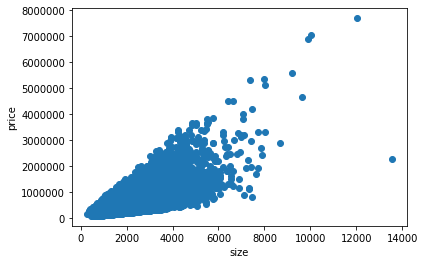

In [20]:
plt.scatter(size, price)
plt.xlabel('size')
plt.ylabel('price')
plt.show()

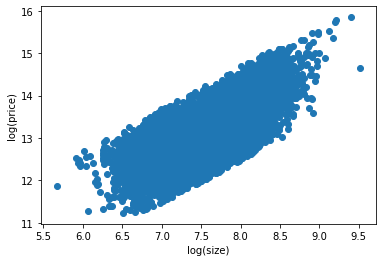

In [21]:
plt.scatter(np.log(size), np.log(price))
plt.xlabel('log(size)')
plt.ylabel('log(price)')
plt.show()

In [22]:
# 2 trainable parameters 
intercept = tf.Variable(1000.0, tf.float32)
slope = tf.Variable(1000.0, dtype=tf.float32)


In [23]:
def linear_regression(intercept, slope, features=size):
    return slope*features + intercept

def loss_function(intercept, slope, features=size, targets=price):
    predictions = linear_regression(intercept, slope, features)
    return tf.keras.losses.mse(targets, predictions)

In [24]:
# Optimizer to update the Variable/Trainable parameters
opt = tf.keras.optimizers.Adam(0.5)

In [27]:
for i in range(10000):
    opt.minimize(lambda: loss_function(intercept, slope, size, price), var_list=[intercept, slope])
    print('slope {} & intercept {}'.format(slope.numpy(), intercept.numpy()))
    print('Loss: {}'.format(loss_function(intercept, slope, size, price)))

slope 999.5 & intercept 999.5
Loss: 2875150827520.0
slope 999.0 & intercept 999.0
Loss: 2871341350912.0
slope 998.5 & intercept 998.5
Loss: 2867535020032.0
slope 998.0000610351562 & intercept 998.0000610351562
Loss: 2863731048448.0
slope 997.5001220703125 & intercept 997.5001220703125
Loss: 2859929960448.0
slope 997.000244140625 & intercept 997.000244140625
Loss: 2856132280320.0
slope 996.5003662109375 & intercept 996.5003662109375
Loss: 2852336697344.0
slope 996.0005493164062 & intercept 996.0005493164062
Loss: 2848544784384.0
slope 995.5007934570312 & intercept 995.5007934570312
Loss: 2844755492864.0
slope 995.0010986328125 & intercept 995.0010986328125
Loss: 2840969609216.0
slope 994.50146484375 & intercept 994.50146484375
Loss: 2837186084864.0
slope 994.0018920898438 & intercept 994.0018920898438
Loss: 2833406230528.0
slope 993.5023803710938 & intercept 993.5023803710938
Loss: 2829628997632.0
slope 993.0029296875 & intercept 993.0029296875
Loss: 2825854910464.0
slope 992.5035400390

Loss: 2356206108672.0
slope 927.4500732421875 & intercept 927.4429321289062
Loss: 2352918822912.0
slope 926.9722900390625 & intercept 926.9650268554688
Loss: 2349634682880.0
slope 926.4946899414062 & intercept 926.4873046875
Loss: 2346354999296.0
slope 926.0172119140625 & intercept 926.009765625
Loss: 2343077675008.0
slope 925.5399169921875 & intercept 925.5323486328125
Loss: 2339804020736.0
slope 925.0628051757812 & intercept 925.0551147460938
Loss: 2336534298624.0
slope 924.5858764648438 & intercept 924.5780639648438
Loss: 2333268246528.0
slope 924.109130859375 & intercept 924.1011962890625
Loss: 2330005864448.0
slope 923.6325073242188 & intercept 923.62451171875
Loss: 2326746365952.0
slope 923.1560668945312 & intercept 923.14794921875
Loss: 2323490537472.0
slope 922.6798095703125 & intercept 922.6715698242188
Loss: 2320238641152.0
slope 922.2037353515625 & intercept 922.1953735351562
Loss: 2316990414848.0
slope 921.7278442382812 & intercept 921.7193603515625
Loss: 2313745072128.0
sl

Loss: 1912466046976.0
slope 859.508056640625 & intercept 859.4750366210938
Loss: 1909669494784.0
slope 859.0553588867188 & intercept 859.0220947265625
Loss: 1906876481536.0
slope 858.6028442382812 & intercept 858.5692749023438
Loss: 1904086351872.0
slope 858.1504516601562 & intercept 858.1166381835938
Loss: 1901299499008.0
slope 857.6982421875 & intercept 857.6641845703125
Loss: 1898515660800.0
slope 857.2462158203125 & intercept 857.2119140625
Loss: 1895735361536.0
slope 856.7943725585938 & intercept 856.7598266601562
Loss: 1892957552640.0
slope 856.3427124023438 & intercept 856.307861328125
Loss: 1890183413760.0
slope 855.8911743164062 & intercept 855.8560791015625
Loss: 1887412289536.0
slope 855.4398193359375 & intercept 855.4044799804688
Loss: 1884644442112.0
slope 854.9886474609375 & intercept 854.9530639648438
Loss: 1881879740416.0
slope 854.5376586914062 & intercept 854.5018310546875
Loss: 1879118053376.0
slope 854.0868530273438 & intercept 854.05078125
Loss: 1876359643136.0
slo

Loss: 1608728838144.0
slope 808.1454467773438 & intercept 808.0767211914062
Loss: 1606286704640.0
slope 807.7128295898438 & intercept 807.6436767578125
Loss: 1603847192576.0
slope 807.2803344726562 & intercept 807.2108154296875
Loss: 1601410564096.0
slope 806.8480224609375 & intercept 806.7781372070312
Loss: 1598976557056.0
slope 806.4158935546875 & intercept 806.3456420898438
Loss: 1596545826816.0
slope 805.9839477539062 & intercept 805.913330078125
Loss: 1594117718016.0
slope 805.5521850585938 & intercept 805.481201171875
Loss: 1591693017088.0
slope 805.12060546875 & intercept 805.0491943359375
Loss: 1589270806528.0
slope 804.6891479492188 & intercept 804.6173706054688
Loss: 1586851610624.0
slope 804.2578735351562 & intercept 804.1857299804688
Loss: 1584435167232.0
slope 803.8267822265625 & intercept 803.7542724609375
Loss: 1582021476352.0
slope 803.3958740234375 & intercept 803.322998046875
Loss: 1579611193344.0
slope 802.9651489257812 & intercept 802.8919067382812
Loss: 15772036628

slope 746.0106811523438 & intercept 745.8741455078125
Loss: 1275760869376.0
slope 745.6038818359375 & intercept 745.466796875
Loss: 1273728598016.0
slope 745.197265625 & intercept 745.0596313476562
Loss: 1271698685952.0
slope 744.7908325195312 & intercept 744.6526489257812
Loss: 1269671919616.0
slope 744.3845825195312 & intercept 744.245849609375
Loss: 1267647250432.0
slope 743.978515625 & intercept 743.8392333984375
Loss: 1265625464832.0
slope 743.5726318359375 & intercept 743.4327392578125
Loss: 1263606038528.0
slope 743.1668701171875 & intercept 743.0264282226562
Loss: 1261589102592.0
slope 742.7612915039062 & intercept 742.6203002929688
Loss: 1259575181312.0
slope 742.3558959960938 & intercept 742.21435546875
Loss: 1257563226112.0
slope 741.95068359375 & intercept 741.80859375
Loss: 1255553892352.0
slope 741.545654296875 & intercept 741.4030151367188
Loss: 1253547704320.0
slope 741.1408081054688 & intercept 740.9976196289062
Loss: 1251543875584.0
slope 740.7361450195312 & intercept

slope 692.3078002929688 & intercept 692.0842895507812
Loss: 1022272929792.0
slope 691.925048828125 & intercept 691.7008056640625
Loss: 1020573515776.0
slope 691.54248046875 & intercept 691.3175048828125
Loss: 1018876133376.0
slope 691.1600952148438 & intercept 690.9343872070312
Loss: 1017181110272.0
slope 690.7778930664062 & intercept 690.5514526367188
Loss: 1015488577536.0
slope 690.3958740234375 & intercept 690.168701171875
Loss: 1013798273024.0
slope 690.0140380859375 & intercept 689.7861328125
Loss: 1012110458880.0
slope 689.6323852539062 & intercept 689.4037475585938
Loss: 1010424872960.0
slope 689.2509155273438 & intercept 689.021484375
Loss: 1008741449728.0
slope 688.86962890625 & intercept 688.639404296875
Loss: 1007060451328.0
slope 688.488525390625 & intercept 688.2575073242188
Loss: 1005381746688.0
slope 688.1075439453125 & intercept 687.8757934570312
Loss: 1003705139200.0
slope 687.7267456054688 & intercept 687.4942626953125
Loss: 1002031022080.0
slope 687.3461303710938 & i

slope 642.255859375 & intercept 641.9190673828125
Loss: 812885344256.0
slope 641.8973388671875 & intercept 641.5595703125
Loss: 811478810624.0
slope 641.5390014648438 & intercept 641.2002563476562
Loss: 810074832896.0
slope 641.1807861328125 & intercept 640.8411254882812
Loss: 808672362496.0
slope 640.82275390625 & intercept 640.482177734375
Loss: 807271858176.0
slope 640.4649047851562 & intercept 640.1234130859375
Loss: 805873451008.0
slope 640.1072387695312 & intercept 639.7648315429688
Loss: 804477075456.0
slope 639.749755859375 & intercept 639.4064331054688
Loss: 803082797056.0
slope 639.3924560546875 & intercept 639.0482177734375
Loss: 801690484736.0
slope 639.0353393554688 & intercept 638.6901245117188
Loss: 800300400640.0
slope 638.6784057617188 & intercept 638.3322143554688
Loss: 798912086016.0
slope 638.3216552734375 & intercept 637.9744873046875
Loss: 797525934080.0
slope 637.965087890625 & intercept 637.616943359375
Loss: 796141551616.0
slope 637.6087036132812 & intercept 63

Loss: 638373199872.0
slope 594.4881591796875 & intercept 594.0045776367188
Loss: 637228089344.0
slope 594.1546630859375 & intercept 593.6698608398438
Loss: 636084813824.0
slope 593.8213500976562 & intercept 593.3353271484375
Loss: 634943176704.0
slope 593.4882202148438 & intercept 593.0009765625
Loss: 633803374592.0
slope 593.1552734375 & intercept 592.6668090820312
Loss: 632665210880.0
slope 592.822509765625 & intercept 592.3328247070312
Loss: 631529078784.0
slope 592.4899291992188 & intercept 591.9990234375
Loss: 630394519552.0
slope 592.1575317382812 & intercept 591.6654052734375
Loss: 629261795328.0
slope 591.8253173828125 & intercept 591.3319702148438
Loss: 628130840576.0
slope 591.4932861328125 & intercept 590.9987182617188
Loss: 627001655296.0
slope 591.1614379882812 & intercept 590.6656494140625
Loss: 625873977344.0
slope 590.8297729492188 & intercept 590.332763671875
Loss: 624748462080.0
slope 590.498291015625 & intercept 590.0000610351562
Loss: 623624650752.0
slope 590.166992

slope 545.9014892578125 & intercept 545.2133178710938
Loss: 482779922432.0
slope 545.595947265625 & intercept 544.90625
Loss: 481885913088.0
slope 545.2905883789062 & intercept 544.599365234375
Loss: 480993476608.0
slope 544.9854125976562 & intercept 544.2926635742188
Loss: 480102481920.0
slope 544.680419921875 & intercept 543.9861450195312
Loss: 479213060096.0
slope 544.3756103515625 & intercept 543.6798095703125
Loss: 478324981760.0
slope 544.0709838867188 & intercept 543.3736572265625
Loss: 477438476288.0
slope 543.7665405273438 & intercept 543.0676879882812
Loss: 476553641984.0
slope 543.4622802734375 & intercept 542.7619018554688
Loss: 475670052864.0
slope 543.158203125 & intercept 542.456298828125
Loss: 474788036608.0
slope 542.8543090820312 & intercept 542.15087890625
Loss: 473907462144.0
slope 542.5505981445312 & intercept 541.8456420898438
Loss: 473028558848.0
slope 542.2470703125 & intercept 541.5405883789062
Loss: 472150900736.0
slope 541.9437255859375 & intercept 541.235717

slope 509.990966796875 & intercept 509.1028747558594
Loss: 384325484544.0
slope 509.7080383300781 & intercept 508.81817626953125
Loss: 383602753536.0
slope 509.42529296875 & intercept 508.5336608886719
Loss: 382881300480.0
slope 509.1427307128906 & intercept 508.24932861328125
Loss: 382161092608.0
slope 508.8603515625 & intercept 507.9651794433594
Loss: 381442359296.0
slope 508.5781555175781 & intercept 507.68121337890625
Loss: 380724707328.0
slope 508.2961730957031 & intercept 507.3974304199219
Loss: 380008628224.0
slope 508.0143737792969 & intercept 507.11383056640625
Loss: 379293761536.0
slope 507.7327575683594 & intercept 506.8304138183594
Loss: 378580172800.0
slope 507.4513244628906 & intercept 506.54718017578125
Loss: 377867829248.0
slope 507.1700744628906 & intercept 506.2641296386719
Loss: 377156730880.0
slope 506.8890075683594 & intercept 505.98126220703125
Loss: 376447008768.0
slope 506.6081237792969 & intercept 505.6985778808594
Loss: 375738597376.0
slope 506.3274230957031 &

slope 475.550537109375 & intercept 474.4160461425781
Loss: 302436745216.0
slope 475.2912902832031 & intercept 474.1546936035156
Loss: 301866876928.0
slope 475.0322265625 & intercept 473.8935241699219
Loss: 301298089984.0
slope 474.7733459472656 & intercept 473.6325378417969
Loss: 300730417152.0
slope 474.5146484375 & intercept 473.3717346191406
Loss: 300163891200.0
slope 474.25616455078125 & intercept 473.1111145019531
Loss: 299598446592.0
slope 473.99786376953125 & intercept 472.8506774902344
Loss: 299034083328.0
slope 473.73974609375 & intercept 472.5904235839844
Loss: 298470866944.0
slope 473.4818115234375 & intercept 472.3303527832031
Loss: 297908699136.0
slope 473.22406005859375 & intercept 472.0704650878906
Loss: 297347678208.0
slope 472.96649169921875 & intercept 471.8107604980469
Loss: 296787640320.0
slope 472.7091064453125 & intercept 471.5512390136719
Loss: 296228782080.0
slope 472.451904296875 & intercept 471.2919006347656
Loss: 295670972416.0
slope 472.19488525390625 & inte

slope 445.773193359375 & intercept 444.36578369140625
Loss: 241528668160.0
slope 445.53631591796875 & intercept 444.12646484375
Loss: 241080926208.0
slope 445.29962158203125 & intercept 443.8873291015625
Loss: 240634118144.0
slope 445.0631408691406 & intercept 443.64837646484375
Loss: 240188260352.0
slope 444.82684326171875 & intercept 443.40960693359375
Loss: 239743352832.0
slope 444.5907287597656 & intercept 443.1710205078125
Loss: 239299362816.0
slope 444.35479736328125 & intercept 442.9326171875
Loss: 238856306688.0
slope 444.1190490722656 & intercept 442.69439697265625
Loss: 238414200832.0
slope 443.88348388671875 & intercept 442.45635986328125
Loss: 237972946944.0
slope 443.6481018066406 & intercept 442.218505859375
Loss: 237532626944.0
slope 443.41290283203125 & intercept 441.9808349609375
Loss: 237093273600.0
slope 443.1778869628906 & intercept 441.74334716796875
Loss: 236654772224.0
slope 442.94305419921875 & intercept 441.50604248046875
Loss: 236217221120.0
slope 442.70843505

Loss: 184364105728.0
slope 412.3167724609375 & intercept 410.50726318359375
Loss: 184040439808.0
slope 412.1076965332031 & intercept 410.2952575683594
Loss: 183717609472.0
slope 411.8988037109375 & intercept 410.08343505859375
Loss: 183395516416.0
slope 411.6900939941406 & intercept 409.87176513671875
Loss: 183074127872.0
slope 411.4815673828125 & intercept 409.6602783203125
Loss: 182753492992.0
slope 411.2732238769531 & intercept 409.448974609375
Loss: 182433579008.0
slope 411.0650634765625 & intercept 409.23785400390625
Loss: 182114402304.0
slope 410.8570861816406 & intercept 409.02691650390625
Loss: 181795946496.0
slope 410.6492919921875 & intercept 408.816162109375
Loss: 181478244352.0
slope 410.4416809082031 & intercept 408.6055908203125
Loss: 181161263104.0
slope 410.2342529296875 & intercept 408.39520263671875
Loss: 180844969984.0
slope 410.0270080566406 & intercept 408.18499755859375
Loss: 180529397760.0
slope 409.8199462890625 & intercept 407.9749755859375
Loss: 180214579200.0

slope 382.6293029785156 & intercept 380.3348693847656
Loss: 142726856704.0
slope 382.44781494140625 & intercept 380.1499328613281
Loss: 142502330368.0
slope 382.2665100097656 & intercept 379.9651794433594
Loss: 142278393856.0
slope 382.08538818359375 & intercept 379.78057861328125
Loss: 142054998016.0
slope 381.9044494628906 & intercept 379.5961608886719
Loss: 141832208384.0
slope 381.72369384765625 & intercept 379.41192626953125
Loss: 141609975808.0
slope 381.5431213378906 & intercept 379.2278747558594
Loss: 141388267520.0
slope 381.36273193359375 & intercept 379.0439758300781
Loss: 141167116288.0
slope 381.1824951171875 & intercept 378.8602600097656
Loss: 140946505728.0
slope 381.00244140625 & intercept 378.6767272949219
Loss: 140726452224.0
slope 380.82257080078125 & intercept 378.4933776855469
Loss: 140506988544.0
slope 380.64288330078125 & intercept 378.3101806640625
Loss: 140288049152.0
slope 380.46337890625 & intercept 378.1271667480469
Loss: 140069683200.0
slope 380.28405761718

slope 360.68170166015625 & intercept 357.9090270996094
Loss: 118047367168.0
slope 360.52294921875 & intercept 357.7463073730469
Loss: 117886984192.0
slope 360.3643798828125 & intercept 357.5837707519531
Loss: 117727076352.0
slope 360.2059631347656 & intercept 357.42138671875
Loss: 117567578112.0
slope 360.0477294921875 & intercept 357.2591857910156
Loss: 117408522240.0
slope 359.8896789550781 & intercept 357.0971374511719
Loss: 117249933312.0
slope 359.7317810058594 & intercept 356.9352722167969
Loss: 117091713024.0
slope 359.5740661621094 & intercept 356.7735595703125
Loss: 116933943296.0
slope 359.4165344238281 & intercept 356.6120300292969
Loss: 116776665088.0
slope 359.2591552734375 & intercept 356.4506530761719
Loss: 116619739136.0
slope 359.1019592285156 & intercept 356.2894592285156
Loss: 116463271936.0
slope 358.9449462890625 & intercept 356.12841796875
Loss: 116307222528.0
slope 358.7880859375 & intercept 355.9675598144531
Loss: 116151574528.0
slope 358.63140869140625 & interc

Loss: 99012214784.0
slope 339.4371337890625 & intercept 336.04669189453125
Loss: 98905726976.0
slope 339.30279541015625 & intercept 335.90777587890625
Loss: 98799558656.0
slope 339.1686096191406 & intercept 335.76904296875
Loss: 98693677056.0
slope 339.03460693359375 & intercept 335.6304626464844
Loss: 98588131328.0
slope 338.9007568359375 & intercept 335.4920349121094
Loss: 98482896896.0
slope 338.76708984375 & intercept 335.353759765625
Loss: 98377981952.0
slope 338.6335754394531 & intercept 335.21563720703125
Loss: 98273370112.0
slope 338.5002136230469 & intercept 335.07769775390625
Loss: 98169077760.0
slope 338.3670349121094 & intercept 334.9399108886719
Loss: 98065113088.0
slope 338.2340087890625 & intercept 334.8022766113281
Loss: 97961443328.0
slope 338.10113525390625 & intercept 334.664794921875
Loss: 97858060288.0
slope 337.96844482421875 & intercept 334.5274658203125
Loss: 97755013120.0
slope 337.8359069824219 & intercept 334.39031982421875
Loss: 97652252672.0
slope 337.70352

Loss: 86321209344.0
slope 321.29119873046875 & intercept 317.1761779785156
Loss: 86254067712.0
slope 321.18017578125 & intercept 317.0599060058594
Loss: 86187139072.0
slope 321.0693054199219 & intercept 316.94378662109375
Loss: 86120439808.0
slope 320.9585876464844 & intercept 316.82781982421875
Loss: 86053953536.0
slope 320.8480224609375 & intercept 316.7120056152344
Loss: 85987688448.0
slope 320.73760986328125 & intercept 316.5963439941406
Loss: 85921636352.0
slope 320.6273498535156 & intercept 316.4808044433594
Loss: 85855797248.0
slope 320.5172424316406 & intercept 316.36541748046875
Loss: 85790212096.0
slope 320.40728759765625 & intercept 316.25018310546875
Loss: 85724807168.0
slope 320.2974548339844 & intercept 316.1351013183594
Loss: 85659598848.0
slope 320.1877746582031 & intercept 316.0201416015625
Loss: 85594619904.0
slope 320.0782470703125 & intercept 315.90533447265625
Loss: 85529862144.0
slope 319.9688720703125 & intercept 315.7906799316406
Loss: 85465300992.0
slope 319.85

Loss: 78400110592.0
slope 306.2729187011719 & intercept 301.319580078125
Loss: 78359912448.0
slope 306.1834716796875 & intercept 301.22418212890625
Loss: 78319886336.0
slope 306.0941467285156 & intercept 301.12890625
Loss: 78280007680.0
slope 306.0049743652344 & intercept 301.03375244140625
Loss: 78240251904.0
slope 305.9159240722656 & intercept 300.9387512207031
Loss: 78200668160.0
slope 305.8270263671875 & intercept 300.8438720703125
Loss: 78161215488.0
slope 305.7382507324219 & intercept 300.7491149902344
Loss: 78121893888.0
slope 305.6496276855469 & intercept 300.6545104980469
Loss: 78082736128.0
slope 305.5611267089844 & intercept 300.5600280761719
Loss: 78043693056.0
slope 305.4727783203125 & intercept 300.4656677246094
Loss: 78004805632.0
slope 305.3845520019531 & intercept 300.3714294433594
Loss: 77966065664.0
slope 305.29644775390625 & intercept 300.27734375
Loss: 77927448576.0
slope 305.20849609375 & intercept 300.1833801269531
Loss: 77888978944.0
slope 305.12066650390625 & i

slope 293.7578125 & intercept 287.8019714355469
Loss: 73564307456.0
slope 293.6885070800781 & intercept 287.7259216308594
Loss: 73542262784.0
slope 293.61932373046875 & intercept 287.6499938964844
Loss: 73520300032.0
slope 293.5502624511719 & intercept 287.57415771484375
Loss: 73498427392.0
slope 293.4812927246094 & intercept 287.4984436035156
Loss: 73476644864.0
slope 293.4124450683594 & intercept 287.4228515625
Loss: 73454944256.0
slope 293.3437194824219 & intercept 287.34735107421875
Loss: 73433341952.0
slope 293.2751159667969 & intercept 287.27197265625
Loss: 73411813376.0
slope 293.2066345214844 & intercept 287.19671630859375
Loss: 73390374912.0
slope 293.1382751464844 & intercept 287.1215515136719
Loss: 73369001984.0
slope 293.0700378417969 & intercept 287.0465087890625
Loss: 73347751936.0
slope 293.00189208984375 & intercept 286.9715881347656
Loss: 73326559232.0
slope 292.9338684082031 & intercept 286.8967590332031
Loss: 73305448448.0
slope 292.865966796875 & intercept 286.82205

slope 284.40850830078125 & intercept 277.35247802734375
Loss: 71039410176.0
slope 284.3560485839844 & intercept 277.2924499511719
Loss: 71027785728.0
slope 284.3036804199219 & intercept 277.2325134277344
Loss: 71016218624.0
slope 284.25140380859375 & intercept 277.17266845703125
Loss: 71004708864.0
slope 284.19921875 & intercept 277.1129150390625
Loss: 70993231872.0
slope 284.14715576171875 & intercept 277.0532531738281
Loss: 70981820416.0
slope 284.0951843261719 & intercept 276.99371337890625
Loss: 70970458112.0
slope 284.0433044433594 & intercept 276.93426513671875
Loss: 70959128576.0
slope 283.99151611328125 & intercept 276.8749084472656
Loss: 70947856384.0
slope 283.9398498535156 & intercept 276.8156433105469
Loss: 70936633344.0
slope 283.8882751464844 & intercept 276.7564697265625
Loss: 70925467648.0
slope 283.8367919921875 & intercept 276.6973876953125
Loss: 70914342912.0
slope 283.785400390625 & intercept 276.6383972167969
Loss: 70903275520.0
slope 283.734130859375 & intercept 2

slope 277.39642333984375 & intercept 269.1048278808594
Loss: 69739282432.0
slope 277.3580322265625 & intercept 269.05804443359375
Loss: 69733564416.0
slope 277.3197326660156 & intercept 269.0113220214844
Loss: 69727862784.0
slope 277.281494140625 & intercept 268.9646911621094
Loss: 69722210304.0
slope 277.24334716796875 & intercept 268.9181213378906
Loss: 69716574208.0
slope 277.2052917480469 & intercept 268.87164306640625
Loss: 69710962688.0
slope 277.16729736328125 & intercept 268.8252258300781
Loss: 69705375744.0
slope 277.12939453125 & intercept 268.7789001464844
Loss: 69699821568.0
slope 277.0915832519531 & intercept 268.7326354980469
Loss: 69694300160.0
slope 277.0538330078125 & intercept 268.68646240234375
Loss: 69688786944.0
slope 277.01617431640625 & intercept 268.6403503417969
Loss: 69683322880.0
slope 276.97857666015625 & intercept 268.5943298339844
Loss: 69677867008.0
slope 276.9410705566406 & intercept 268.5483703613281
Loss: 69672443904.0
slope 276.9036560058594 & interce

slope 272.294189453125 & intercept 262.6157531738281
Loss: 69113069568.0
slope 272.2671813964844 & intercept 262.5794677734375
Loss: 69110464512.0
slope 272.240234375 & intercept 262.5432434082031
Loss: 69107884032.0
slope 272.21337890625 & intercept 262.507080078125
Loss: 69105319936.0
slope 272.18658447265625 & intercept 262.4709777832031
Loss: 69102764032.0
slope 272.15985107421875 & intercept 262.4349365234375
Loss: 69100224512.0
slope 272.1331787109375 & intercept 262.3989562988281
Loss: 69097684992.0
slope 272.1065673828125 & intercept 262.363037109375
Loss: 69095170048.0
slope 272.08001708984375 & intercept 262.3271789550781
Loss: 69092679680.0
slope 272.05352783203125 & intercept 262.2913513183594
Loss: 69090189312.0
slope 272.027099609375 & intercept 262.2555847167969
Loss: 69087707136.0
slope 272.000732421875 & intercept 262.2198791503906
Loss: 69085249536.0
slope 271.97442626953125 & intercept 262.1842346191406
Loss: 69082800128.0
slope 271.94818115234375 & intercept 262.148

slope 268.9744873046875 & intercept 257.8795471191406
Loss: 68850294784.0
slope 268.9556884765625 & intercept 257.8506164550781
Loss: 68849123328.0
slope 268.93695068359375 & intercept 257.8217468261719
Loss: 68847976448.0
slope 268.91827392578125 & intercept 257.79290771484375
Loss: 68846829568.0
slope 268.8996276855469 & intercept 257.7641296386719
Loss: 68845674496.0
slope 268.88104248046875 & intercept 257.7353820800781
Loss: 68844544000.0
slope 268.86248779296875 & intercept 257.7066650390625
Loss: 68843413504.0
slope 268.843994140625 & intercept 257.6780090332031
Loss: 68842291200.0
slope 268.8255615234375 & intercept 257.6493835449219
Loss: 68841185280.0
slope 268.8071594238281 & intercept 257.62078857421875
Loss: 68840062976.0
slope 268.788818359375 & intercept 257.5922546386719
Loss: 68838957056.0
slope 268.7705078125 & intercept 257.5637512207031
Loss: 68837851136.0
slope 268.75225830078125 & intercept 257.5353088378906
Loss: 68836769792.0
slope 268.7340393066406 & intercept 

Loss: 68733796352.0
slope 266.6275329589844 & intercept 253.92271423339844
Loss: 68733321216.0
slope 266.6151428222656 & intercept 253.89926147460938
Loss: 68732854272.0
slope 266.602783203125 & intercept 253.87583923339844
Loss: 68732395520.0
slope 266.5904541015625 & intercept 253.85244750976562
Loss: 68731920384.0
slope 266.5781555175781 & intercept 253.82908630371094
Loss: 68731469824.0
slope 266.56591796875 & intercept 253.80575561523438
Loss: 68731027456.0
slope 266.5537109375 & intercept 253.78245544433594
Loss: 68730560512.0
slope 266.5415344238281 & intercept 253.75918579101562
Loss: 68730118144.0
slope 266.5293884277344 & intercept 253.73593139648438
Loss: 68729675776.0
slope 266.51727294921875 & intercept 253.71270751953125
Loss: 68729225216.0
slope 266.50518798828125 & intercept 253.68951416015625
Loss: 68728782848.0
slope 266.4931640625 & intercept 253.66635131835938
Loss: 68728348672.0
slope 266.4811706542969 & intercept 253.64321899414062
Loss: 68727906304.0
slope 266.46

Loss: 68689805312.0
slope 265.1806945800781 & intercept 250.83029174804688
Loss: 68689616896.0
slope 265.1726379394531 & intercept 250.8102569580078
Loss: 68689440768.0
slope 265.16461181640625 & intercept 250.79025268554688
Loss: 68689252352.0
slope 265.1566162109375 & intercept 250.770263671875
Loss: 68689072128.0
slope 265.14862060546875 & intercept 250.7502899169922
Loss: 68688887808.0
slope 265.1406555175781 & intercept 250.73033142089844
Loss: 68688711680.0
slope 265.1327209472656 & intercept 250.7104034423828
Loss: 68688531456.0
slope 265.12481689453125 & intercept 250.69049072265625
Loss: 68688363520.0
slope 265.116943359375 & intercept 250.67059326171875
Loss: 68688179200.0
slope 265.1091003417969 & intercept 250.6507110595703
Loss: 68688011264.0
slope 265.10125732421875 & intercept 250.63084411621094
Loss: 68687843328.0
slope 265.09344482421875 & intercept 250.6110076904297
Loss: 68687667200.0
slope 265.0856628417969 & intercept 250.5911865234375
Loss: 68687499264.0
slope 265

slope 264.3507385253906 & intercept 248.45263671875
Loss: 68674306048.0
slope 264.34539794921875 & intercept 248.43447875976562
Loss: 68674236416.0
slope 264.3400573730469 & intercept 248.4163360595703
Loss: 68674166784.0
slope 264.3347473144531 & intercept 248.39820861816406
Loss: 68674093056.0
slope 264.3294677734375 & intercept 248.3800811767578
Loss: 68674019328.0
slope 264.3241882324219 & intercept 248.36196899414062
Loss: 68673949696.0
slope 264.3189392089844 & intercept 248.3438720703125
Loss: 68673871872.0
slope 264.3136901855469 & intercept 248.32579040527344
Loss: 68673794048.0
slope 264.3084716796875 & intercept 248.30770874023438
Loss: 68673732608.0
slope 264.3032531738281 & intercept 248.28964233398438
Loss: 68673667072.0
slope 264.2980651855469 & intercept 248.27159118652344
Loss: 68673585152.0
slope 264.29290771484375 & intercept 248.2535400390625
Loss: 68673499136.0
slope 264.2877502441406 & intercept 248.23550415039062
Loss: 68673441792.0
slope 264.2826232910156 & inte

Loss: 68667736064.0
slope 263.7545471191406 & intercept 245.98202514648438
Loss: 68667723776.0
slope 263.7513122558594 & intercept 245.96499633789062
Loss: 68667686912.0
slope 263.7480773925781 & intercept 245.94796752929688
Loss: 68667670528.0
slope 263.744873046875 & intercept 245.93093872070312
Loss: 68667629568.0
slope 263.7416687011719 & intercept 245.91392517089844
Loss: 68667621376.0
slope 263.73846435546875 & intercept 245.89691162109375
Loss: 68667584512.0
slope 263.73529052734375 & intercept 245.87989807128906
Loss: 68667559936.0
slope 263.73211669921875 & intercept 245.86288452148438
Loss: 68667535360.0
slope 263.7289733886719 & intercept 245.84588623046875
Loss: 68667510784.0
slope 263.725830078125 & intercept 245.82888793945312
Loss: 68667486208.0
slope 263.7226867675781 & intercept 245.8118896484375
Loss: 68667473920.0
slope 263.7195739746094 & intercept 245.79490661621094
Loss: 68667441152.0
slope 263.7164611816406 & intercept 245.77792358398438
Loss: 68667424768.0
slope

slope 263.4161682128906 & intercept 243.74400329589844
Loss: 68665597952.0
slope 263.41424560546875 & intercept 243.72727966308594
Loss: 68665585664.0
slope 263.4123229980469 & intercept 243.71055603027344
Loss: 68665573376.0
slope 263.410400390625 & intercept 243.69383239746094
Loss: 68665573376.0
slope 263.4084777832031 & intercept 243.67710876464844
Loss: 68665561088.0
slope 263.4065856933594 & intercept 243.66038513183594
Loss: 68665561088.0
slope 263.4046936035156 & intercept 243.64366149902344
Loss: 68665536512.0
slope 263.4028015136719 & intercept 243.62693786621094
Loss: 68665536512.0
slope 263.4009094238281 & intercept 243.61021423339844
Loss: 68665524224.0
slope 263.3990478515625 & intercept 243.59349060058594
Loss: 68665524224.0
slope 263.3971862792969 & intercept 243.57676696777344
Loss: 68665516032.0
slope 263.39532470703125 & intercept 243.56004333496094
Loss: 68665503744.0
slope 263.3934631347656 & intercept 243.54331970214844
Loss: 68665491456.0
slope 263.3916320800781 

slope 263.19598388671875 & intercept 241.1542205810547
Loss: 68664840192.0
slope 263.1949768066406 & intercept 241.13720703125
Loss: 68664840192.0
slope 263.1939697265625 & intercept 241.1201934814453
Loss: 68664840192.0
slope 263.1929626464844 & intercept 241.10316467285156
Loss: 68664827904.0
slope 263.19195556640625 & intercept 241.0861358642578
Loss: 68664827904.0
slope 263.19097900390625 & intercept 241.06910705566406
Loss: 68664815616.0
slope 263.19000244140625 & intercept 241.0520782470703
Loss: 68664836096.0
slope 263.18902587890625 & intercept 241.0350341796875
Loss: 68664827904.0
slope 263.18804931640625 & intercept 241.0179901123047
Loss: 68664823808.0
slope 263.18707275390625 & intercept 241.00094604492188
Loss: 68664815616.0
slope 263.18609619140625 & intercept 240.98390197753906
Loss: 68664815616.0
slope 263.18511962890625 & intercept 240.9668426513672
Loss: 68664811520.0
slope 263.1841735839844 & intercept 240.9497833251953
Loss: 68664811520.0
slope 263.1832275390625 & i

slope 263.0850830078125 & intercept 238.49644470214844
Loss: 68664631296.0
slope 263.0845947265625 & intercept 238.4786376953125
Loss: 68664631296.0
slope 263.0841064453125 & intercept 238.46083068847656
Loss: 68664631296.0
slope 263.0836181640625 & intercept 238.44302368164062
Loss: 68664631296.0
slope 263.0831298828125 & intercept 238.42520141601562
Loss: 68664623104.0
slope 263.0826416015625 & intercept 238.40737915039062
Loss: 68664619008.0
slope 263.0821533203125 & intercept 238.38954162597656
Loss: 68664610816.0
slope 263.0816650390625 & intercept 238.3717041015625
Loss: 68664623104.0
slope 263.0811767578125 & intercept 238.35385131835938
Loss: 68664619008.0
slope 263.0806884765625 & intercept 238.33599853515625
Loss: 68664619008.0
slope 263.0802307128906 & intercept 238.31814575195312
Loss: 68664623104.0
slope 263.07977294921875 & intercept 238.30027770996094
Loss: 68664631296.0
slope 263.0793151855469 & intercept 238.28240966796875
Loss: 68664631296.0
slope 263.078857421875 & i

slope 263.03277587890625 & intercept 235.70968627929688
Loss: 68664549376.0
slope 263.0325622558594 & intercept 235.69076538085938
Loss: 68664553472.0
slope 263.0323486328125 & intercept 235.6718292236328
Loss: 68664553472.0
slope 263.0321350097656 & intercept 235.65289306640625
Loss: 68664553472.0
slope 263.03192138671875 & intercept 235.63394165039062
Loss: 68664553472.0
slope 263.0317077636719 & intercept 235.614990234375
Loss: 68664553472.0
slope 263.031494140625 & intercept 235.5960235595703
Loss: 68664553472.0
slope 263.0312805175781 & intercept 235.57705688476562
Loss: 68664549376.0
slope 263.03106689453125 & intercept 235.55807495117188
Loss: 68664553472.0
slope 263.0308532714844 & intercept 235.53909301757812
Loss: 68664553472.0
slope 263.0306396484375 & intercept 235.5200958251953
Loss: 68664553472.0
slope 263.0304260253906 & intercept 235.50108337402344
Loss: 68664553472.0
slope 263.03021240234375 & intercept 235.48207092285156
Loss: 68664553472.0
slope 263.0299987792969 & i

Loss: 68664504320.0
slope 263.0094299316406 & intercept 232.59104919433594
Loss: 68664504320.0
slope 263.00933837890625 & intercept 232.57069396972656
Loss: 68664504320.0
slope 263.0092468261719 & intercept 232.5503387451172
Loss: 68664512512.0
slope 263.0091552734375 & intercept 232.52996826171875
Loss: 68664504320.0
slope 263.0090637207031 & intercept 232.50958251953125
Loss: 68664504320.0
slope 263.00897216796875 & intercept 232.48919677734375
Loss: 68664504320.0
slope 263.0088806152344 & intercept 232.4687957763672
Loss: 68664504320.0
slope 263.0087890625 & intercept 232.44837951660156
Loss: 68664504320.0
slope 263.0086975097656 & intercept 232.42796325683594
Loss: 68664512512.0
slope 263.00860595703125 & intercept 232.40753173828125
Loss: 68664500224.0
slope 263.0085144042969 & intercept 232.3870849609375
Loss: 68664504320.0
slope 263.0084228515625 & intercept 232.36663818359375
Loss: 68664504320.0
slope 263.0083312988281 & intercept 232.34617614746094
Loss: 68664504320.0
slope 26

slope 263.00128173828125 & intercept 229.38204956054688
Loss: 68664463360.0
slope 263.0012512207031 & intercept 229.36013793945312
Loss: 68664463360.0
slope 263.001220703125 & intercept 229.3382110595703
Loss: 68664455168.0
slope 263.0011901855469 & intercept 229.3162841796875
Loss: 68664455168.0
slope 263.00115966796875 & intercept 229.29434204101562
Loss: 68664463360.0
slope 263.0011291503906 & intercept 229.2723846435547
Loss: 68664455168.0
slope 263.0010986328125 & intercept 229.25042724609375
Loss: 68664467456.0
slope 263.0010681152344 & intercept 229.22845458984375
Loss: 68664467456.0
slope 263.00103759765625 & intercept 229.2064666748047
Loss: 68664463360.0
slope 263.0010070800781 & intercept 229.18446350097656
Loss: 68664463360.0
slope 263.0009765625 & intercept 229.16246032714844
Loss: 68664467456.0
slope 263.0009460449219 & intercept 229.14044189453125
Loss: 68664455168.0
slope 263.00091552734375 & intercept 229.118408203125
Loss: 68664455168.0
slope 263.0008850097656 & inter

slope 262.9993896484375 & intercept 226.04208374023438
Loss: 68664418304.0
slope 262.9993896484375 & intercept 226.0185089111328
Loss: 68664414208.0
slope 262.9993896484375 & intercept 225.99493408203125
Loss: 68664414208.0
slope 262.9993896484375 & intercept 225.97134399414062
Loss: 68664414208.0
slope 262.9993896484375 & intercept 225.94773864746094
Loss: 68664414208.0
slope 262.9993896484375 & intercept 225.9241180419922
Loss: 68664414208.0
slope 262.9993896484375 & intercept 225.90048217773438
Loss: 68664414208.0
slope 262.9993896484375 & intercept 225.87684631347656
Loss: 68664414208.0
slope 262.9993896484375 & intercept 225.8531951904297
Loss: 68664414208.0
slope 262.9993896484375 & intercept 225.82952880859375
Loss: 68664406016.0
slope 262.9993896484375 & intercept 225.80584716796875
Loss: 68664414208.0
slope 262.9993896484375 & intercept 225.78216552734375
Loss: 68664414208.0
slope 262.9993896484375 & intercept 225.7584686279297
Loss: 68664406016.0
slope 262.9993896484375 & int

slope 262.9993896484375 & intercept 222.1935577392578
Loss: 68664348672.0
slope 262.9993896484375 & intercept 222.16806030273438
Loss: 68664348672.0
slope 262.9993896484375 & intercept 222.14254760742188
Loss: 68664348672.0
slope 262.9993896484375 & intercept 222.11703491210938
Loss: 68664348672.0
slope 262.9993896484375 & intercept 222.0915069580078
Loss: 68664344576.0
slope 262.9993896484375 & intercept 222.0659637451172
Loss: 68664344576.0
slope 262.9993896484375 & intercept 222.0404052734375
Loss: 68664348672.0
slope 262.9993896484375 & intercept 222.01483154296875
Loss: 68664344576.0
slope 262.9993896484375 & intercept 221.98924255371094
Loss: 68664344576.0
slope 262.9993896484375 & intercept 221.96365356445312
Loss: 68664344576.0
slope 262.9993896484375 & intercept 221.93804931640625
Loss: 68664344576.0
slope 262.9993896484375 & intercept 221.9124298095703
Loss: 68664348672.0
slope 262.9993896484375 & intercept 221.8867950439453
Loss: 68664336384.0
slope 262.9993896484375 & inter

slope 262.9993896484375 & intercept 218.25137329101562
Loss: 68664307712.0
slope 262.9994201660156 & intercept 218.22390747070312
Loss: 68664307712.0
slope 262.99945068359375 & intercept 218.19644165039062
Loss: 68664307712.0
slope 262.9994812011719 & intercept 218.16896057128906
Loss: 68664307712.0
slope 262.99951171875 & intercept 218.14146423339844
Loss: 68664307712.0
slope 262.9995422363281 & intercept 218.11395263671875
Loss: 68664307712.0
slope 262.99957275390625 & intercept 218.08642578125
Loss: 68664299520.0
slope 262.9996032714844 & intercept 218.0588836669922
Loss: 68664299520.0
slope 262.9996337890625 & intercept 218.0313262939453
Loss: 68664299520.0
slope 262.9996643066406 & intercept 218.00375366210938
Loss: 68664295424.0
slope 262.99969482421875 & intercept 217.97616577148438
Loss: 68664295424.0
slope 262.99969482421875 & intercept 217.9485626220703
Loss: 68664299520.0
slope 262.99969482421875 & intercept 217.9209442138672
Loss: 68664299520.0
slope 262.99969482421875 & in

slope 263.00140380859375 & intercept 213.82659912109375
Loss: 68664246272.0
slope 263.0014343261719 & intercept 213.7969207763672
Loss: 68664246272.0
slope 263.00146484375 & intercept 213.76722717285156
Loss: 68664246272.0
slope 263.0014953613281 & intercept 213.73751831054688
Loss: 68664246272.0
slope 263.0014953613281 & intercept 213.70779418945312
Loss: 68664238080.0
slope 263.0014953613281 & intercept 213.6780548095703
Loss: 68664250368.0
slope 263.0014953613281 & intercept 213.64830017089844
Loss: 68664246272.0
slope 263.0014953613281 & intercept 213.6185302734375
Loss: 68664246272.0
slope 263.0014953613281 & intercept 213.5887451171875
Loss: 68664246272.0
slope 263.00152587890625 & intercept 213.55894470214844
Loss: 68664246272.0
slope 263.0015563964844 & intercept 213.5291290283203
Loss: 68664246272.0
slope 263.0015869140625 & intercept 213.49929809570312
Loss: 68664246272.0
slope 263.0016174316406 & intercept 213.46945190429688
Loss: 68664238080.0
slope 263.0016174316406 & inte

slope 263.0034484863281 & intercept 209.2049560546875
Loss: 68664168448.0
slope 263.0034484863281 & intercept 209.17295837402344
Loss: 68664168448.0
slope 263.0034484863281 & intercept 209.1409454345703
Loss: 68664156160.0
slope 263.0034484863281 & intercept 209.10891723632812
Loss: 68664168448.0
slope 263.0034484863281 & intercept 209.07687377929688
Loss: 68664156160.0
slope 263.0034484863281 & intercept 209.04481506347656
Loss: 68664156160.0
slope 263.00347900390625 & intercept 209.0127410888672
Loss: 68664156160.0
slope 263.0035095214844 & intercept 208.98065185546875
Loss: 68664164352.0
slope 263.0035400390625 & intercept 208.94854736328125
Loss: 68664156160.0
slope 263.0035400390625 & intercept 208.9164276123047
Loss: 68664164352.0
slope 263.0035400390625 & intercept 208.88429260253906
Loss: 68664156160.0
slope 263.0035400390625 & intercept 208.85214233398438
Loss: 68664156160.0
slope 263.0035705566406 & intercept 208.81997680664062
Loss: 68664156160.0
slope 263.00360107421875 & i

Loss: 68664107008.0
slope 263.0055236816406 & intercept 204.257568359375
Loss: 68664094720.0
slope 263.0055236816406 & intercept 204.2230987548828
Loss: 68664094720.0
slope 263.0055236816406 & intercept 204.18861389160156
Loss: 68664094720.0
slope 263.0055236816406 & intercept 204.15411376953125
Loss: 68664102912.0
slope 263.00555419921875 & intercept 204.11959838867188
Loss: 68664094720.0
slope 263.0055847167969 & intercept 204.08506774902344
Loss: 68664094720.0
slope 263.005615234375 & intercept 204.05052185058594
Loss: 68664102912.0
slope 263.0056457519531 & intercept 204.01596069335938
Loss: 68664094720.0
slope 263.0056457519531 & intercept 203.9813690185547
Loss: 68664094720.0
slope 263.0056457519531 & intercept 203.94676208496094
Loss: 68664094720.0
slope 263.0056457519531 & intercept 203.91213989257812
Loss: 68664094720.0
slope 263.00567626953125 & intercept 203.87750244140625
Loss: 68664094720.0
slope 263.0057067871094 & intercept 203.8428497314453
Loss: 68664094720.0
slope 263

slope 263.0077819824219 & intercept 198.92808532714844
Loss: 68664020992.0
slope 263.0077819824219 & intercept 198.89096069335938
Loss: 68664020992.0
slope 263.0077819824219 & intercept 198.85382080078125
Loss: 68664020992.0
slope 263.0078125 & intercept 198.81666564941406
Loss: 68664020992.0
slope 263.0078430175781 & intercept 198.77947998046875
Loss: 68664020992.0
slope 263.00787353515625 & intercept 198.74227905273438
Loss: 68664020992.0
slope 263.00787353515625 & intercept 198.70506286621094
Loss: 68664008704.0
slope 263.00787353515625 & intercept 198.66783142089844
Loss: 68664020992.0
slope 263.00787353515625 & intercept 198.63058471679688
Loss: 68664012800.0
slope 263.00787353515625 & intercept 198.5933074951172
Loss: 68664008704.0
slope 263.0079040527344 & intercept 198.55601501464844
Loss: 68664020992.0
slope 263.0079345703125 & intercept 198.51870727539062
Loss: 68664008704.0
slope 263.0079650878906 & intercept 198.48138427734375
Loss: 68664020992.0
slope 263.00799560546875 & 

Loss: 68663934976.0
slope 263.0101623535156 & intercept 193.1875457763672
Loss: 68663934976.0
slope 263.0101623535156 & intercept 193.14756774902344
Loss: 68663934976.0
slope 263.01019287109375 & intercept 193.10755920410156
Loss: 68663934976.0
slope 263.0102233886719 & intercept 193.06753540039062
Loss: 68663934976.0
slope 263.01025390625 & intercept 193.02749633789062
Loss: 68663934976.0
slope 263.0102844238281 & intercept 192.9874267578125
Loss: 68663934976.0
slope 263.01031494140625 & intercept 192.9473419189453
Loss: 68663926784.0
slope 263.01031494140625 & intercept 192.90724182128906
Loss: 68663934976.0
slope 263.01031494140625 & intercept 192.8671112060547
Loss: 68663934976.0
slope 263.01031494140625 & intercept 192.82696533203125
Loss: 68663934976.0
slope 263.01031494140625 & intercept 192.78680419921875
Loss: 68663934976.0
slope 263.01031494140625 & intercept 192.7466278076172
Loss: 68663934976.0
slope 263.0103454589844 & intercept 192.7064208984375
Loss: 68663922688.0
slope 

Loss: 68663848960.0
slope 263.0127868652344 & intercept 186.91893005371094
Loss: 68663848960.0
slope 263.0128173828125 & intercept 186.87582397460938
Loss: 68663848960.0
slope 263.0128479003906 & intercept 186.83270263671875
Loss: 68663848960.0
slope 263.0128479003906 & intercept 186.78955078125
Loss: 68663848960.0
slope 263.0128479003906 & intercept 186.7463836669922
Loss: 68663848960.0
slope 263.01287841796875 & intercept 186.7032012939453
Loss: 68663840768.0
slope 263.0129089355469 & intercept 186.6599884033203
Loss: 68663848960.0
slope 263.0129089355469 & intercept 186.61676025390625
Loss: 68663848960.0
slope 263.012939453125 & intercept 186.57350158691406
Loss: 68663840768.0
slope 263.0129699707031 & intercept 186.5302276611328
Loss: 68663840768.0
slope 263.01300048828125 & intercept 186.4869384765625
Loss: 68663848960.0
slope 263.01300048828125 & intercept 186.44361877441406
Loss: 68663848960.0
slope 263.01300048828125 & intercept 186.40028381347656
Loss: 68663840768.0
slope 263.

slope 263.01513671875 & intercept 181.1780242919922
Loss: 68663771136.0
slope 263.0151672363281 & intercept 181.13206481933594
Loss: 68663767040.0
slope 263.01519775390625 & intercept 181.08609008789062
Loss: 68663767040.0
slope 263.0152282714844 & intercept 181.0400848388672
Loss: 68663771136.0
slope 263.0152587890625 & intercept 180.9940643310547
Loss: 68663767040.0
slope 263.0152893066406 & intercept 180.94801330566406
Loss: 68663767040.0
slope 263.01531982421875 & intercept 180.90194702148438
Loss: 68663767040.0
slope 263.0153503417969 & intercept 180.85585021972656
Loss: 68663767040.0
slope 263.0153503417969 & intercept 180.8097381591797
Loss: 68663767040.0
slope 263.0153503417969 & intercept 180.7635955810547
Loss: 68663767040.0
slope 263.0153503417969 & intercept 180.71743774414062
Loss: 68663758848.0
slope 263.0153503417969 & intercept 180.67124938964844
Loss: 68663758848.0
slope 263.015380859375 & intercept 180.6250457763672
Loss: 68663758848.0
slope 263.0154113769531 & interc

Loss: 68663672832.0
slope 263.01806640625 & intercept 174.17202758789062
Loss: 68663672832.0
slope 263.0180969238281 & intercept 174.1226043701172
Loss: 68663672832.0
slope 263.01812744140625 & intercept 174.07315063476562
Loss: 68663668736.0
slope 263.01812744140625 & intercept 174.02366638183594
Loss: 68663668736.0
slope 263.0181579589844 & intercept 173.9741668701172
Loss: 68663660544.0
slope 263.0181884765625 & intercept 173.9246368408203
Loss: 68663668736.0
slope 263.0181884765625 & intercept 173.87509155273438
Loss: 68663668736.0
slope 263.0182189941406 & intercept 173.8255157470703
Loss: 68663660544.0
slope 263.01824951171875 & intercept 173.77590942382812
Loss: 68663660544.0
slope 263.01824951171875 & intercept 173.72628784179688
Loss: 68663660544.0
slope 263.0182800292969 & intercept 173.6766357421875
Loss: 68663660544.0
slope 263.018310546875 & intercept 173.62696838378906
Loss: 68663660544.0
slope 263.018310546875 & intercept 173.5772705078125
Loss: 68663656448.0
slope 263.0

slope 263.0207824707031 & intercept 167.5365753173828
Loss: 68663578624.0
slope 263.02081298828125 & intercept 167.48385620117188
Loss: 68663574528.0
slope 263.0208435058594 & intercept 167.43112182617188
Loss: 68663574528.0
slope 263.0208740234375 & intercept 167.37835693359375
Loss: 68663574528.0
slope 263.0209045410156 & intercept 167.3255615234375
Loss: 68663566336.0
slope 263.02093505859375 & intercept 167.27273559570312
Loss: 68663566336.0
slope 263.0209655761719 & intercept 167.2198944091797
Loss: 68663574528.0
slope 263.02099609375 & intercept 167.16702270507812
Loss: 68663574528.0
slope 263.02099609375 & intercept 167.11412048339844
Loss: 68663566336.0
slope 263.02099609375 & intercept 167.0612030029297
Loss: 68663566336.0
slope 263.02099609375 & intercept 167.0082550048828
Loss: 68663562240.0
slope 263.0210266113281 & intercept 166.9552764892578
Loss: 68663562240.0
slope 263.02105712890625 & intercept 166.9022674560547
Loss: 68663562240.0
slope 263.0210876464844 & intercept 1

slope 263.02337646484375 & intercept 161.24459838867188
Loss: 68663488512.0
slope 263.0234069824219 & intercept 161.18878173828125
Loss: 68663488512.0
slope 263.0234375 & intercept 161.1329345703125
Loss: 68663488512.0
slope 263.0234680175781 & intercept 161.07705688476562
Loss: 68663488512.0
slope 263.02349853515625 & intercept 161.02114868164062
Loss: 68663488512.0
slope 263.0235290527344 & intercept 160.9652099609375
Loss: 68663488512.0
slope 263.0235595703125 & intercept 160.9092559814453
Loss: 68663488512.0
slope 263.0235595703125 & intercept 160.853271484375
Loss: 68663480320.0
slope 263.0235595703125 & intercept 160.79725646972656
Loss: 68663488512.0
slope 263.0235595703125 & intercept 160.7412109375
Loss: 68663476224.0
slope 263.0235900878906 & intercept 160.6851348876953
Loss: 68663480320.0
slope 263.02362060546875 & intercept 160.6290283203125
Loss: 68663476224.0
slope 263.0236511230469 & intercept 160.57290649414062
Loss: 68663476224.0
slope 263.023681640625 & intercept 160.

Loss: 68663369728.0
slope 263.02685546875 & intercept 152.73577880859375
Loss: 68663361536.0
slope 263.0268859863281 & intercept 152.67576599121094
Loss: 68663361536.0
slope 263.02691650390625 & intercept 152.61572265625
Loss: 68663361536.0
slope 263.0269470214844 & intercept 152.55564880371094
Loss: 68663361536.0
slope 263.0269775390625 & intercept 152.49554443359375
Loss: 68663361536.0
slope 263.0270080566406 & intercept 152.43540954589844
Loss: 68663361536.0
slope 263.02703857421875 & intercept 152.375244140625
Loss: 68663361536.0
slope 263.0270690917969 & intercept 152.31504821777344
Loss: 68663361536.0
slope 263.027099609375 & intercept 152.25482177734375
Loss: 68663361536.0
slope 263.0271301269531 & intercept 152.19456481933594
Loss: 68663361536.0
slope 263.0271301269531 & intercept 152.13427734375
Loss: 68663361536.0
slope 263.0271301269531 & intercept 152.07395935058594
Loss: 68663349248.0
slope 263.02716064453125 & intercept 152.01361083984375
Loss: 68663349248.0
slope 263.027

slope 263.0302429199219 & intercept 144.48828125
Loss: 68663242752.0
slope 263.0302734375 & intercept 144.42420959472656
Loss: 68663250944.0
slope 263.0303039550781 & intercept 144.360107421875
Loss: 68663238656.0
slope 263.03033447265625 & intercept 144.29595947265625
Loss: 68663238656.0
slope 263.0303649902344 & intercept 144.23178100585938
Loss: 68663238656.0
slope 263.0303955078125 & intercept 144.16757202148438
Loss: 68663238656.0
slope 263.0304260253906 & intercept 144.10333251953125
Loss: 68663238656.0
slope 263.0304260253906 & intercept 144.0390625
Loss: 68663238656.0
slope 263.03045654296875 & intercept 143.97476196289062
Loss: 68663238656.0
slope 263.0304870605469 & intercept 143.91043090820312
Loss: 68663238656.0
slope 263.030517578125 & intercept 143.8460693359375
Loss: 68663238656.0
slope 263.0305480957031 & intercept 143.78167724609375
Loss: 68663238656.0
slope 263.03057861328125 & intercept 143.71725463867188
Loss: 68663230464.0
slope 263.0306091308594 & intercept 143.65

Loss: 68663144448.0
slope 263.03350830078125 & intercept 136.50196838378906
Loss: 68663152640.0
slope 263.0335388183594 & intercept 136.43397521972656
Loss: 68663140352.0
slope 263.0335693359375 & intercept 136.36595153808594
Loss: 68663144448.0
slope 263.0335998535156 & intercept 136.29788208007812
Loss: 68663140352.0
slope 263.03363037109375 & intercept 136.2297821044922
Loss: 68663140352.0
slope 263.0336608886719 & intercept 136.16165161132812
Loss: 68663140352.0
slope 263.03369140625 & intercept 136.09349060058594
Loss: 68663132160.0
slope 263.0337219238281 & intercept 136.02529907226562
Loss: 68663140352.0
slope 263.03375244140625 & intercept 135.95706176757812
Loss: 68663132160.0
slope 263.0337829589844 & intercept 135.8887939453125
Loss: 68663128064.0
slope 263.0337829589844 & intercept 135.82049560546875
Loss: 68663128064.0
slope 263.0338134765625 & intercept 135.75216674804688
Loss: 68663128064.0
slope 263.0338439941406 & intercept 135.68380737304688
Loss: 68663128064.0
slope 

slope 263.037109375 & intercept 127.66670989990234
Loss: 68663001088.0
slope 263.0371398925781 & intercept 127.59439086914062
Loss: 68663001088.0
slope 263.03717041015625 & intercept 127.52203369140625
Loss: 68663001088.0
slope 263.0372009277344 & intercept 127.44963836669922
Loss: 68663001088.0
slope 263.0372314453125 & intercept 127.37721252441406
Loss: 68663001088.0
slope 263.0372619628906 & intercept 127.30474853515625
Loss: 68663001088.0
slope 263.03729248046875 & intercept 127.23224639892578
Loss: 68662996992.0
slope 263.0373229980469 & intercept 127.15971374511719
Loss: 68663001088.0
slope 263.037353515625 & intercept 127.08714294433594
Loss: 68662996992.0
slope 263.0373840332031 & intercept 127.01454162597656
Loss: 68662996992.0
slope 263.03741455078125 & intercept 126.94190216064453
Loss: 68662996992.0
slope 263.0374450683594 & intercept 126.86922454833984
Loss: 68662988800.0
slope 263.0374755859375 & intercept 126.79651641845703
Loss: 68662996992.0
slope 263.0375061035156 & i

slope 263.0417175292969 & intercept 116.25856018066406
Loss: 68662845440.0
slope 263.041748046875 & intercept 116.18067169189453
Loss: 68662845440.0
slope 263.0417785644531 & intercept 116.10274505615234
Loss: 68662845440.0
slope 263.04180908203125 & intercept 116.0247802734375
Loss: 68662841344.0
slope 263.0418395996094 & intercept 115.94677734375
Loss: 68662841344.0
slope 263.0418701171875 & intercept 115.86873626708984
Loss: 68662841344.0
slope 263.0419006347656 & intercept 115.79065704345703
Loss: 68662841344.0
slope 263.04193115234375 & intercept 115.71253967285156
Loss: 68662833152.0
slope 263.0419616699219 & intercept 115.63438415527344
Loss: 68662841344.0
slope 263.0419921875 & intercept 115.55619049072266
Loss: 68662841344.0
slope 263.0420227050781 & intercept 115.47795867919922
Loss: 68662833152.0
slope 263.04205322265625 & intercept 115.39968872070312
Loss: 68662833152.0
slope 263.0420837402344 & intercept 115.32138061523438
Loss: 68662829056.0
slope 263.0421142578125 & inte

Loss: 68662681600.0
slope 263.0463562011719 & intercept 103.97479248046875
Loss: 68662681600.0
slope 263.04638671875 & intercept 103.89094543457031
Loss: 68662673408.0
slope 263.0464172363281 & intercept 103.80706024169922
Loss: 68662673408.0
slope 263.04644775390625 & intercept 103.72312927246094
Loss: 68662665216.0
slope 263.0464782714844 & intercept 103.63916015625
Loss: 68662665216.0
slope 263.0465087890625 & intercept 103.5551528930664
Loss: 68662665216.0
slope 263.0465393066406 & intercept 103.47109985351562
Loss: 68662661120.0
slope 263.04656982421875 & intercept 103.38700866699219
Loss: 68662661120.0
slope 263.0466003417969 & intercept 103.3028793334961
Loss: 68662665216.0
slope 263.046630859375 & intercept 103.21870422363281
Loss: 68662661120.0
slope 263.0466613769531 & intercept 103.13449096679688
Loss: 68662665216.0
slope 263.04669189453125 & intercept 103.05023956298828
Loss: 68662652928.0
slope 263.0467224121094 & intercept 102.9659423828125
Loss: 68662652928.0
slope 263.0

slope 263.05096435546875 & intercept 90.8442153930664
Loss: 68662480896.0
slope 263.0509948730469 & intercept 90.75403594970703
Loss: 68662480896.0
slope 263.051025390625 & intercept 90.66381072998047
Loss: 68662480896.0
slope 263.0510559082031 & intercept 90.57354736328125
Loss: 68662480896.0
slope 263.05108642578125 & intercept 90.48323822021484
Loss: 68662480896.0
slope 263.0511169433594 & intercept 90.39288330078125
Loss: 68662468608.0
slope 263.0511474609375 & intercept 90.302490234375
Loss: 68662472704.0
slope 263.0511779785156 & intercept 90.21205139160156
Loss: 68662468608.0
slope 263.05120849609375 & intercept 90.12156677246094
Loss: 68662468608.0
slope 263.0512390136719 & intercept 90.03103637695312
Loss: 68662468608.0
slope 263.05126953125 & intercept 89.94046783447266
Loss: 68662468608.0
slope 263.05133056640625 & intercept 89.849853515625
Loss: 68662468608.0
slope 263.0513916015625 & intercept 89.75919342041016
Loss: 68662468608.0
slope 263.05145263671875 & intercept 89.66

slope 263.05670166015625 & intercept 76.91720581054688
Loss: 68662280192.0
slope 263.0567321777344 & intercept 76.82032775878906
Loss: 68662267904.0
slope 263.0567626953125 & intercept 76.72340393066406
Loss: 68662267904.0
slope 263.0567932128906 & intercept 76.62643432617188
Loss: 68662267904.0
slope 263.05682373046875 & intercept 76.52941131591797
Loss: 68662267904.0
slope 263.0568542480469 & intercept 76.43234252929688
Loss: 68662267904.0
slope 263.056884765625 & intercept 76.3352279663086
Loss: 68662263808.0
slope 263.05694580078125 & intercept 76.23806762695312
Loss: 68662263808.0
slope 263.0570068359375 & intercept 76.14086151123047
Loss: 68662263808.0
slope 263.05706787109375 & intercept 76.04360961914062
Loss: 68662267904.0
slope 263.05712890625 & intercept 75.9463119506836
Loss: 68662255616.0
slope 263.0571594238281 & intercept 75.84896850585938
Loss: 68662267904.0
slope 263.05718994140625 & intercept 75.75157928466797
Loss: 68662263808.0
slope 263.0572204589844 & intercept 75

slope 263.0631103515625 & intercept 61.22914505004883
Loss: 68662046720.0
slope 263.06317138671875 & intercept 61.12476348876953
Loss: 68662050816.0
slope 263.063232421875 & intercept 61.02033233642578
Loss: 68662046720.0
slope 263.0632629394531 & intercept 60.91585159301758
Loss: 68662046720.0
slope 263.06329345703125 & intercept 60.81132125854492
Loss: 68662046720.0
slope 263.0633239746094 & intercept 60.70674133300781
Loss: 68662038528.0
slope 263.0633544921875 & intercept 60.60211181640625
Loss: 68662046720.0
slope 263.0633850097656 & intercept 60.49742889404297
Loss: 68662034432.0
slope 263.0634460449219 & intercept 60.392696380615234
Loss: 68662038528.0
slope 263.0635070800781 & intercept 60.28791427612305
Loss: 68662046720.0
slope 263.06353759765625 & intercept 60.183082580566406
Loss: 68662038528.0
slope 263.0635681152344 & intercept 60.07820129394531
Loss: 68662034432.0
slope 263.0636291503906 & intercept 59.973270416259766
Loss: 68662034432.0
slope 263.06365966796875 & interc

slope 263.0697021484375 & intercept 45.11604309082031
Loss: 68661833728.0
slope 263.0697326660156 & intercept 45.00400924682617
Loss: 68661833728.0
slope 263.06976318359375 & intercept 44.89192199707031
Loss: 68661821440.0
slope 263.06982421875 & intercept 44.779781341552734
Loss: 68661821440.0
slope 263.06988525390625 & intercept 44.66758728027344
Loss: 68661829632.0
slope 263.0699462890625 & intercept 44.55534362792969
Loss: 68661821440.0
slope 263.07000732421875 & intercept 44.44304656982422
Loss: 68661821440.0
slope 263.0700378417969 & intercept 44.33069610595703
Loss: 68661817344.0
slope 263.070068359375 & intercept 44.218292236328125
Loss: 68661817344.0
slope 263.0700988769531 & intercept 44.1058349609375
Loss: 68661817344.0
slope 263.07012939453125 & intercept 43.993324279785156
Loss: 68661809152.0
slope 263.0701599121094 & intercept 43.880760192871094
Loss: 68661809152.0
slope 263.0702209472656 & intercept 43.76814270019531
Loss: 68661809152.0
slope 263.0702819824219 & intercep

Loss: 68661579776.0
slope 263.07696533203125 & intercept 27.345577239990234
Loss: 68661579776.0
slope 263.0769958496094 & intercept 27.225173950195312
Loss: 68661579776.0
slope 263.0770263671875 & intercept 27.104713439941406
Loss: 68661579776.0
slope 263.0770568847656 & intercept 26.98419761657715
Loss: 68661575680.0
slope 263.0771179199219 & intercept 26.863624572753906
Loss: 68661575680.0
slope 263.0771789550781 & intercept 26.742996215820312
Loss: 68661575680.0
slope 263.0772399902344 & intercept 26.622310638427734
Loss: 68661567488.0
slope 263.0773010253906 & intercept 26.501567840576172
Loss: 68661567488.0
slope 263.0773620605469 & intercept 26.380769729614258
Loss: 68661563392.0
slope 263.077392578125 & intercept 26.25991439819336
Loss: 68661563392.0
slope 263.0774230957031 & intercept 26.139001846313477
Loss: 68661563392.0
slope 263.0774841308594 & intercept 26.01803207397461
Loss: 68661563392.0
slope 263.0775451660156 & intercept 25.89700698852539
Loss: 68661563392.0
slope 263

slope 263.08447265625 & intercept 8.899470329284668
Loss: 68661313536.0
slope 263.08453369140625 & intercept 8.770458221435547
Loss: 68661313536.0
slope 263.0845642089844 & intercept 8.641386032104492
Loss: 68661313536.0
slope 263.0845947265625 & intercept 8.51225471496582
Loss: 68661313536.0
slope 263.08465576171875 & intercept 8.383063316345215
Loss: 68661305344.0
slope 263.084716796875 & intercept 8.253811836242676
Loss: 68661305344.0
slope 263.08477783203125 & intercept 8.124500274658203
Loss: 68661305344.0
slope 263.0848388671875 & intercept 7.995128631591797
Loss: 68661301248.0
slope 263.08489990234375 & intercept 7.865696907043457
Loss: 68661301248.0
slope 263.0849304199219 & intercept 7.736205101013184
Loss: 68661301248.0
slope 263.0849609375 & intercept 7.606653213500977
Loss: 68661293056.0
slope 263.0849914550781 & intercept 7.477041244506836
Loss: 68661293056.0
slope 263.0850524902344 & intercept 7.347369194030762
Loss: 68661288960.0
slope 263.0851135253906 & intercept 7.217

Loss: 68661026816.0
slope 263.09283447265625 & intercept -11.688314437866211
Loss: 68661026816.0
slope 263.0928955078125 & intercept -11.82683277130127
Loss: 68661026816.0
slope 263.0929260253906 & intercept -11.965415000915527
Loss: 68661026816.0
slope 263.09295654296875 & intercept -12.104060173034668
Loss: 68661022720.0
slope 263.093017578125 & intercept -12.242769241333008
Loss: 68661014528.0
slope 263.09307861328125 & intercept -12.381542205810547
Loss: 68661014528.0
slope 263.0931396484375 & intercept -12.520378112792969
Loss: 68661014528.0
slope 263.09320068359375 & intercept -12.65927791595459
Loss: 68661014528.0
slope 263.09326171875 & intercept -12.79824161529541
Loss: 68661010432.0
slope 263.09332275390625 & intercept -12.93726921081543
Loss: 68661002240.0
slope 263.0933837890625 & intercept -13.076359748840332
Loss: 68661010432.0
slope 263.09344482421875 & intercept -13.215514183044434
Loss: 68661002240.0
slope 263.093505859375 & intercept -13.354732513427734
Loss: 68661002

slope 263.1015319824219 & intercept -33.18988800048828
Loss: 68660711424.0
slope 263.1015930175781 & intercept -33.33821487426758
Loss: 68660711424.0
slope 263.1016540527344 & intercept -33.48660659790039
Loss: 68660703232.0
slope 263.1017150878906 & intercept -33.635066986083984
Loss: 68660703232.0
slope 263.1017761230469 & intercept -33.78359603881836
Loss: 68660699136.0
slope 263.1018371582031 & intercept -33.93218994140625
Loss: 68660699136.0
slope 263.1018981933594 & intercept -34.08085250854492
Loss: 68660703232.0
slope 263.1019592285156 & intercept -34.22957992553711
Loss: 68660703232.0
slope 263.1020202636719 & intercept -34.37837600708008
Loss: 68660690944.0
slope 263.1020812988281 & intercept -34.52724075317383
Loss: 68660699136.0
slope 263.1021423339844 & intercept -34.676170349121094
Loss: 68660690944.0
slope 263.1022033691406 & intercept -34.82516860961914
Loss: 68660690944.0
slope 263.1022644042969 & intercept -34.97423553466797
Loss: 68660686848.0
slope 263.1023254394531

slope 263.1104431152344 & intercept -55.56898498535156
Loss: 68660408320.0
slope 263.1105041503906 & intercept -55.72737503051758
Loss: 68660400128.0
slope 263.1105651855469 & intercept -55.885833740234375
Loss: 68660400128.0
slope 263.1106262207031 & intercept -56.04436492919922
Loss: 68660396032.0
slope 263.1106872558594 & intercept -56.202964782714844
Loss: 68660400128.0
slope 263.1107482910156 & intercept -56.361637115478516
Loss: 68660396032.0
slope 263.1108093261719 & intercept -56.52037811279297
Loss: 68660396032.0
slope 263.1108703613281 & intercept -56.67919158935547
Loss: 68660387840.0
slope 263.1109313964844 & intercept -56.83807373046875
Loss: 68660387840.0
slope 263.1109924316406 & intercept -56.99702835083008
Loss: 68660383744.0
slope 263.1110534667969 & intercept -57.15605545043945
Loss: 68660383744.0
slope 263.1111145019531 & intercept -57.31515121459961
Loss: 68660375552.0
slope 263.1111755371094 & intercept -57.47431945800781
Loss: 68660375552.0
slope 263.111236572265

slope 263.1187744140625 & intercept -77.0955581665039
Loss: 68660097024.0
slope 263.11883544921875 & intercept -77.26347351074219
Loss: 68660097024.0
slope 263.118896484375 & intercept -77.43146514892578
Loss: 68660084736.0
slope 263.11895751953125 & intercept -77.59953308105469
Loss: 68660084736.0
slope 263.1190490722656 & intercept -77.76766967773438
Loss: 68660084736.0
slope 263.119140625 & intercept -77.93588256835938
Loss: 68660084736.0
slope 263.11920166015625 & intercept -78.10417175292969
Loss: 68660084736.0
slope 263.1192626953125 & intercept -78.27252960205078
Loss: 68660084736.0
slope 263.11932373046875 & intercept -78.44096374511719
Loss: 68660072448.0
slope 263.119384765625 & intercept -78.6094741821289
Loss: 68660072448.0
slope 263.11944580078125 & intercept -78.77806091308594
Loss: 68660064256.0
slope 263.1195068359375 & intercept -78.94671630859375
Loss: 68660060160.0
slope 263.11956787109375 & intercept -79.11544799804688
Loss: 68660060160.0
slope 263.1196594238281 & i

slope 263.1293640136719 & intercept -103.12245178222656
Loss: 68659716096.0
slope 263.1294250488281 & intercept -103.30172729492188
Loss: 68659716096.0
slope 263.1294860839844 & intercept -103.4810791015625
Loss: 68659712000.0
slope 263.1295471191406 & intercept -103.66050720214844
Loss: 68659712000.0
slope 263.1296081542969 & intercept -103.84001159667969
Loss: 68659712000.0
slope 263.12969970703125 & intercept -104.01959228515625
Loss: 68659703808.0
slope 263.1297912597656 & intercept -104.19924926757812
Loss: 68659712000.0
slope 263.1298828125 & intercept -104.37899017333984
Loss: 68659699712.0
slope 263.12994384765625 & intercept -104.55880737304688
Loss: 68659699712.0
slope 263.1300048828125 & intercept -104.73870086669922
Loss: 68659699712.0
slope 263.13006591796875 & intercept -104.91867065429688
Loss: 68659691520.0
slope 263.130126953125 & intercept -105.09871673583984
Loss: 68659699712.0
slope 263.1302185058594 & intercept -105.27883911132812
Loss: 68659687424.0
slope 263.1303

slope 263.14080810546875 & intercept -131.27406311035156
Loss: 68659339264.0
slope 263.140869140625 & intercept -131.4653778076172
Loss: 68659331072.0
slope 263.14093017578125 & intercept -131.65676879882812
Loss: 68659326976.0
slope 263.1409912109375 & intercept -131.84823608398438
Loss: 68659326976.0
slope 263.14105224609375 & intercept -132.039794921875
Loss: 68659326976.0
slope 263.1411437988281 & intercept -132.23143005371094
Loss: 68659326976.0
slope 263.1412353515625 & intercept -132.4231414794922
Loss: 68659314688.0
slope 263.1413269042969 & intercept -132.61492919921875
Loss: 68659314688.0
slope 263.14141845703125 & intercept -132.8068084716797
Loss: 68659306496.0
slope 263.1415100097656 & intercept -132.99876403808594
Loss: 68659302400.0
slope 263.1415710449219 & intercept -133.1907958984375
Loss: 68659302400.0
slope 263.1416320800781 & intercept -133.38291931152344
Loss: 68659302400.0
slope 263.1416931152344 & intercept -133.5751190185547
Loss: 68659302400.0
slope 263.141754

Loss: 68658909184.0
slope 263.1527099609375 & intercept -160.68292236328125
Loss: 68658909184.0
slope 263.15277099609375 & intercept -160.8865203857422
Loss: 68658905088.0
slope 263.15283203125 & intercept -161.0902099609375
Loss: 68658905088.0
slope 263.1529235839844 & intercept -161.29397583007812
Loss: 68658896896.0
slope 263.15301513671875 & intercept -161.49783325195312
Loss: 68658892800.0
slope 263.1531066894531 & intercept -161.70176696777344
Loss: 68658892800.0
slope 263.1531982421875 & intercept -161.90579223632812
Loss: 68658892800.0
slope 263.1532897949219 & intercept -162.10989379882812
Loss: 68658892800.0
slope 263.1533508300781 & intercept -162.3140869140625
Loss: 68658884608.0
slope 263.1534118652344 & intercept -162.5183563232422
Loss: 68658880512.0
slope 263.15350341796875 & intercept -162.72271728515625
Loss: 68658872320.0
slope 263.1535949707031 & intercept -162.92715454101562
Loss: 68658868224.0
slope 263.1536865234375 & intercept -163.13168334960938
Loss: 686588682

slope 263.16473388671875 & intercept -190.44517517089844
Loss: 68658487296.0
slope 263.1648254394531 & intercept -190.66090393066406
Loss: 68658487296.0
slope 263.1649169921875 & intercept -190.87672424316406
Loss: 68658483200.0
slope 263.1650085449219 & intercept -191.09263610839844
Loss: 68658483200.0
slope 263.16510009765625 & intercept -191.3086395263672
Loss: 68658483200.0
slope 263.1651916503906 & intercept -191.52471923828125
Loss: 68658483200.0
slope 263.1652526855469 & intercept -191.7408905029297
Loss: 68658470912.0
slope 263.16534423828125 & intercept -191.9571533203125
Loss: 68658470912.0
slope 263.1654357910156 & intercept -192.17349243164062
Loss: 68658470912.0
slope 263.16552734375 & intercept -192.38992309570312
Loss: 68658470912.0
slope 263.1656188964844 & intercept -192.6064453125
Loss: 68658458624.0
slope 263.16571044921875 & intercept -192.8230438232422
Loss: 68658458624.0
slope 263.1658020019531 & intercept -193.03973388671875
Loss: 68658458624.0
slope 263.16589355

slope 263.1775817871094 & intercept -222.1852264404297
Loss: 68658028544.0
slope 263.17767333984375 & intercept -222.41355895996094
Loss: 68658020352.0
slope 263.1777648925781 & intercept -222.64198303222656
Loss: 68658020352.0
slope 263.1778564453125 & intercept -222.8704833984375
Loss: 68658020352.0
slope 263.1779479980469 & intercept -223.0990753173828
Loss: 68658020352.0
slope 263.17803955078125 & intercept -223.3277587890625
Loss: 68658008064.0
slope 263.1781311035156 & intercept -223.55653381347656
Loss: 68658008064.0
slope 263.17822265625 & intercept -223.785400390625
Loss: 68658008064.0
slope 263.1783142089844 & intercept -224.0143585205078
Loss: 68658008064.0
slope 263.17840576171875 & intercept -224.24339294433594
Loss: 68657995776.0
slope 263.1784973144531 & intercept -224.47251892089844
Loss: 68657995776.0
slope 263.1785888671875 & intercept -224.7017364501953
Loss: 68657995776.0
slope 263.1786804199219 & intercept -224.93104553222656
Loss: 68657995776.0
slope 263.178771972

slope 263.19097900390625 & intercept -256.2303771972656
Loss: 68657557504.0
slope 263.1910705566406 & intercept -256.4717712402344
Loss: 68657549312.0
slope 263.191162109375 & intercept -256.7132568359375
Loss: 68657549312.0
slope 263.1912536621094 & intercept -256.954833984375
Loss: 68657549312.0
slope 263.1913757324219 & intercept -257.1965026855469
Loss: 68657549312.0
slope 263.1914978027344 & intercept -257.4382629394531
Loss: 68657537024.0
slope 263.1916198730469 & intercept -257.68011474609375
Loss: 68657537024.0
slope 263.19171142578125 & intercept -257.92205810546875
Loss: 68657532928.0
slope 263.1918029785156 & intercept -258.1640930175781
Loss: 68657524736.0
slope 263.19189453125 & intercept -258.4062194824219
Loss: 68657532928.0
slope 263.1919860839844 & intercept -258.6484375
Loss: 68657524736.0
slope 263.19207763671875 & intercept -258.8907470703125
Loss: 68657512448.0
slope 263.1921691894531 & intercept -259.1331481933594
Loss: 68657512448.0
slope 263.1922607421875 & inte

slope 263.20635986328125 & intercept -294.2329406738281
Loss: 68657016832.0
slope 263.20648193359375 & intercept -294.4884338378906
Loss: 68657016832.0
slope 263.20660400390625 & intercept -294.7440185546875
Loss: 68657016832.0
slope 263.2066955566406 & intercept -294.99969482421875
Loss: 68657008640.0
slope 263.206787109375 & intercept -295.2554931640625
Loss: 68657008640.0
slope 263.2068786621094 & intercept -295.5113830566406
Loss: 68657004544.0
slope 263.20697021484375 & intercept -295.7673645019531
Loss: 68657004544.0
slope 263.20709228515625 & intercept -296.0234375
Loss: 68656996352.0
slope 263.20721435546875 & intercept -296.27960205078125
Loss: 68656996352.0
slope 263.2073059082031 & intercept -296.5358581542969
Loss: 68656984064.0
slope 263.2073974609375 & intercept -296.7922058105469
Loss: 68656979968.0
slope 263.20751953125 & intercept -297.04864501953125
Loss: 68656979968.0
slope 263.2076416015625 & intercept -297.30517578125
Loss: 68656971776.0
slope 263.2077331542969 & i

slope 263.2226257324219 & intercept -334.4111328125
Loss: 68656451584.0
slope 263.22271728515625 & intercept -334.68096923828125
Loss: 68656455680.0
slope 263.2228088378906 & intercept -334.9508972167969
Loss: 68656451584.0
slope 263.2229309082031 & intercept -335.2209167480469
Loss: 68656443392.0
slope 263.2230529785156 & intercept -335.49102783203125
Loss: 68656439296.0
slope 263.2231750488281 & intercept -335.76123046875
Loss: 68656431104.0
slope 263.2232971191406 & intercept -336.0315246582031
Loss: 68656431104.0
slope 263.2234191894531 & intercept -336.3019104003906
Loss: 68656431104.0
slope 263.2235412597656 & intercept -336.5723876953125
Loss: 68656431104.0
slope 263.2236328125 & intercept -336.84295654296875
Loss: 68656418816.0
slope 263.2237243652344 & intercept -337.1136169433594
Loss: 68656414720.0
slope 263.22381591796875 & intercept -337.3843688964844
Loss: 68656414720.0
slope 263.2239074707031 & intercept -337.65521240234375
Loss: 68656406528.0
slope 263.2239990234375 & i

In [28]:
def create_plot(x_data, y_data, m, c):
    plt.scatter(x_data, y_data)
    plt.plot([np.min(x_data), np.max(x_data)], [m*np.min(x_data)+c, m*np.max(x_data)+c], 'r--')
    plt.show()

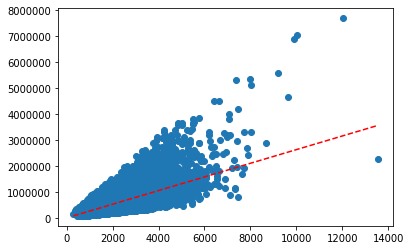

In [29]:
create_plot(size, price, slope, intercept)

In [30]:
# WHY DO WE NEED TO TAKE NATURAL LOG OF FEATURES AND PRICE ? 
price_log = np.log(price)
size_log = np.log(size)

opt2 = tf.keras.optimizers.Adam()
# Initial Value of Parameters is important, a bad value may require more no. of iterations
intercept_log = tf.Variable(-3.0, tf.float32)
slope_log = tf.Variable(-3.0, dtype=tf.float32)

In [118]:
from tqdm import tqdm

In [119]:
for i in tqdm(range(7000)):
    opt.minimize(lambda: loss_function(intercept_log, slope_log, features=size_log, targets=price_log),\
                 var_list=[intercept_log, slope_log])
    print('slope {} & intercept {}'.format(slope_log.numpy(), intercept_log.numpy()))
    print('Loss: {}'.format(loss_function(intercept_log, slope_log, size_log, price_log)))

  0%|          | 35/7000 [00:00<00:50, 137.03it/s]

slope -2.996837615966797 & intercept -2.996837615966797
Loss: 1498.3099365234375
slope -2.9925880432128906 & intercept -2.9925880432128906
Loss: 1495.494873046875
slope -2.987637996673584 & intercept -2.987637996673584
Loss: 1492.2193603515625
slope -2.9821970462799072 & intercept -2.9821970462799072
Loss: 1488.623291015625
slope -2.9764010906219482 & intercept -2.9764010906219482
Loss: 1484.7967529296875
slope -2.970346450805664 & intercept -2.970346450805664
Loss: 1480.8055419921875
slope -2.964104413986206 & intercept -2.964104413986206
Loss: 1476.6961669921875
slope -2.9577298164367676 & intercept -2.9577298164367676
Loss: 1472.5052490234375
slope -2.9512650966644287 & intercept -2.9512650966644287
Loss: 1468.26123046875
slope -2.944744110107422 & intercept -2.944744110107422
Loss: 1463.9866943359375
slope -2.9381937980651855 & intercept -2.9381937980651855
Loss: 1459.6988525390625
slope -2.931635618209839 & intercept -2.931635618209839
Loss: 1455.412109375
slope -2.925086975097656

  1%|          | 73/7000 [00:00<00:43, 159.40it/s]

slope -2.7903740406036377 & intercept -2.7903730869293213
Loss: 1364.611083984375
slope -2.7853026390075684 & intercept -2.785301685333252
Loss: 1361.4053955078125
slope -2.7802894115448 & intercept -2.7802884578704834
Loss: 1358.24072265625
slope -2.7753331661224365 & intercept -2.77533221244812
Loss: 1355.115234375
slope -2.770432472229004 & intercept -2.7704315185546875
Loss: 1352.0284423828125
slope -2.7655858993530273 & intercept -2.765584945678711
Loss: 1348.979248046875
slope -2.7607924938201904 & intercept -2.760791301727295
Loss: 1345.966796875
slope -2.7560505867004395 & intercept -2.756049394607544
Loss: 1342.9901123046875
slope -2.751358985900879 & intercept -2.7513577938079834
Loss: 1340.048095703125
slope -2.7467167377471924 & intercept -2.7467153072357178
Loss: 1337.1402587890625
slope -2.7421224117279053 & intercept -2.7421207427978516
Loss: 1334.265625
slope -2.737574815750122 & intercept -2.7375731468200684
Loss: 1331.4232177734375
slope -2.7330727577209473 & intercep

  2%|▏         | 114/7000 [00:00<00:38, 178.73it/s]

slope -2.6253299713134766 & intercept -2.6253275871276855
Loss: 1262.2279052734375
slope -2.6217503547668457 & intercept -2.6217479705810547
Loss: 1260.0513916015625
slope -2.618194580078125 & intercept -2.618191957473755
Loss: 1257.8916015625
slope -2.614661931991577 & intercept -2.614659309387207
Loss: 1255.747314453125
slope -2.611152172088623 & intercept -2.611149549484253
Loss: 1253.6190185546875
slope -2.6076648235321045 & intercept -2.6076622009277344
Loss: 1251.505859375
slope -2.6041994094848633 & intercept -2.604196786880493
Loss: 1249.407958984375
slope -2.600755453109741 & intercept -2.600752830505371
Loss: 1247.32470703125
slope -2.597332715988159 & intercept -2.597330093383789
Loss: 1245.2562255859375
slope -2.593930721282959 & intercept -2.593928098678589
Loss: 1243.2015380859375
slope -2.5905492305755615 & intercept -2.5905466079711914
Loss: 1241.1612548828125
slope -2.5871877670288086 & intercept -2.5871851444244385
Loss: 1239.1346435546875
slope -2.583846092224121 & i

  2%|▏         | 155/7000 [00:00<00:35, 190.59it/s]

Loss: 1182.05029296875
slope -2.48848557472229 & intercept -2.488480567932129
Loss: 1180.365478515625
slope -2.4856348037719727 & intercept -2.4856295585632324
Loss: 1178.689453125
slope -2.4827959537506104 & intercept -2.48279070854187
Loss: 1177.021240234375
slope -2.479969024658203 & intercept -2.479963779449463
Loss: 1175.3614501953125
slope -2.477153778076172 & intercept -2.4771485328674316
Loss: 1173.709716796875
slope -2.4743502140045166 & intercept -2.4743447303771973
Loss: 1172.065673828125
slope -2.471558094024658 & intercept -2.4715523719787598
Loss: 1170.4298095703125
slope -2.4687771797180176 & intercept -2.468771457672119
Loss: 1168.801513671875
slope -2.4660074710845947 & intercept -2.4660017490386963
Loss: 1167.1810302734375
slope -2.4632487297058105 & intercept -2.463243007659912
Loss: 1165.568359375
slope -2.460500955581665 & intercept -2.4604952335357666
Loss: 1163.9627685546875
slope -2.457763910293579 & intercept -2.4577581882476807
Loss: 1162.3646240234375
slope -

  3%|▎         | 196/7000 [00:01<00:35, 191.27it/s]

Loss: 1118.88720703125
slope -2.3801016807556152 & intercept -2.380093574523926
Loss: 1117.4764404296875
slope -2.377645254135132 & intercept -2.3776371479034424
Loss: 1116.0711669921875
slope -2.3751964569091797 & intercept -2.3751883506774902
Loss: 1114.671142578125
slope -2.372755289077759 & intercept -2.3727471828460693
Loss: 1113.276123046875
slope -2.37032151222229 & intercept -2.3703134059906006
Loss: 1111.8863525390625
slope -2.3678951263427734 & intercept -2.367887020111084
Loss: 1110.501708984375
slope -2.365476131439209 & intercept -2.3654680252075195
Loss: 1109.1221923828125
slope -2.3630645275115967 & intercept -2.3630564212799072
Loss: 1107.747314453125
slope -2.3606600761413574 & intercept -2.360651969909668
Loss: 1106.3778076171875
slope -2.358262777328491 & intercept -2.3582546710968018
Loss: 1105.0133056640625
slope -2.355872631072998 & intercept -2.3558645248413086
Loss: 1103.6533203125
slope -2.353489637374878 & intercept -2.3534812927246094
Loss: 1102.29833984375
s

  3%|▎         | 216/7000 [00:01<00:36, 184.70it/s]

slope -2.2871785163879395 & intercept -2.287168502807617
Loss: 1064.9295654296875
slope -2.284980535507202 & intercept -2.284970283508301
Loss: 1063.7020263671875
slope -2.282788038253784 & intercept -2.2827775478363037
Loss: 1062.4781494140625
slope -2.2806007862091064 & intercept -2.280590295791626
Loss: 1061.2578125
slope -2.278419017791748 & intercept -2.2784082889556885
Loss: 1060.0413818359375
slope -2.27624249458313 & intercept -2.276231527328491
Loss: 1058.82861328125
slope -2.274071216583252 & intercept -2.2740602493286133
Loss: 1057.6192626953125
slope -2.2719051837921143 & intercept -2.2718939781188965
Loss: 1056.4136962890625
slope -2.269744396209717 & intercept -2.26973295211792
Loss: 1055.2115478515625
slope -2.2675886154174805 & intercept -2.2675771713256836
Loss: 1054.01318359375
slope -2.2654380798339844 & intercept -2.2654263973236084
Loss: 1052.8182373046875
slope -2.2632925510406494 & intercept -2.2632806301116943
Loss: 1051.626708984375
slope -2.2611520290374756 & 

  4%|▎         | 254/7000 [00:01<00:36, 185.39it/s]

slope -2.2111990451812744 & intercept -2.2111856937408447
Loss: 1022.904296875
slope -2.2091734409332275 & intercept -2.209160089492798
Loss: 1021.7955932617188
slope -2.2071521282196045 & intercept -2.2071385383605957
Loss: 1020.6897583007812
slope -2.205134868621826 & intercept -2.2051212787628174
Loss: 1019.5867309570312
slope -2.2031216621398926 & intercept -2.203108072280884
Loss: 1018.4864501953125
slope -2.201112747192383 & intercept -2.201098918914795
Loss: 1017.38916015625
slope -2.1991078853607178 & intercept -2.19909405708313
Loss: 1016.2947998046875
slope -2.1971070766448975 & intercept -2.1970932483673096
Loss: 1015.2030639648438
slope -2.195110321044922 & intercept -2.195096492767334
Loss: 1014.1141967773438
slope -2.193117618560791 & intercept -2.193103551864624
Loss: 1013.028076171875
slope -2.191128969192505 & intercept -2.191114664077759
Loss: 1011.94482421875
slope -2.1891441345214844 & intercept -2.1891298294067383
Loss: 1010.8641967773438
slope -2.1871633529663086 

  4%|▍         | 292/7000 [00:01<00:36, 185.30it/s]

slope -2.1369693279266357 & intercept -2.1369528770446777
Loss: 982.664306640625
slope -2.1350862979888916 & intercept -2.1350698471069336
Loss: 981.6539306640625
slope -2.133206605911255 & intercept -2.133190155029297
Loss: 980.6461181640625
slope -2.1313302516937256 & intercept -2.1313138008117676
Loss: 979.6401977539062
slope -2.1294572353363037 & intercept -2.1294407844543457
Loss: 978.6371459960938
slope -2.1275875568389893 & intercept -2.127570867538452
Loss: 977.635986328125
slope -2.125720977783203 & intercept -2.125704288482666
Loss: 976.63720703125
slope -2.1238577365875244 & intercept -2.1238410472869873
Loss: 975.640380859375
slope -2.121997833251953 & intercept -2.121980905532837
Loss: 974.6461791992188
slope -2.12014102935791 & intercept -2.120124101638794
Loss: 973.6541137695312
slope -2.1182873249053955 & intercept -2.1182703971862793
Loss: 972.6641235351562
slope -2.1164369583129883 & intercept -2.116419792175293
Loss: 971.6763916015625
slope -2.1145896911621094 & inte

  5%|▍         | 333/7000 [00:01<00:34, 192.05it/s]

slope -2.0640816688537598 & intercept -2.0640623569488525
Loss: 943.9375610351562
slope -2.062319040298462 & intercept -2.0622997283935547
Loss: 943.010986328125
slope -2.060559034347534 & intercept -2.060539722442627
Loss: 942.0857543945312
slope -2.0588018894195557 & intercept -2.0587823390960693
Loss: 941.162841796875
slope -2.0570473670959473 & intercept -2.057027578353882
Loss: 940.2415161132812
slope -2.055295467376709 & intercept -2.0552756786346436
Loss: 939.3220825195312
slope -2.053546190261841 & intercept -2.0535264015197754
Loss: 938.404541015625
slope -2.0517995357513428 & intercept -2.0517797470092773
Loss: 937.4887084960938
slope -2.050055503845215 & intercept -2.0500357151031494
Loss: 936.5748291015625
slope -2.048314094543457 & intercept -2.0482943058013916
Loss: 935.6624145507812
slope -2.0465753078460693 & intercept -2.046555519104004
Loss: 934.7523193359375
slope -2.0448391437530518 & intercept -2.0448191165924072
Loss: 933.8436889648438
slope -2.0431056022644043 & 

  5%|▌         | 377/7000 [00:02<00:36, 179.96it/s]

slope -1.9922339916229248 & intercept -1.9922114610671997
Loss: 906.5256958007812
slope -1.9905743598937988 & intercept -1.9905518293380737
Loss: 905.6704711914062
slope -1.9889169931411743 & intercept -1.9888943433761597
Loss: 904.81689453125
slope -1.9872618913650513 & intercept -1.987239122390747
Loss: 903.9646606445312
slope -1.9856089353561401 & intercept -1.9855860471725464
Loss: 903.1140747070312
slope -1.983958125114441 & intercept -1.9839352369308472
Loss: 902.2648315429688
slope -1.9823095798492432 & intercept -1.9822865724563599
Loss: 901.41748046875
slope -1.9806631803512573 & intercept -1.9806400537490845
Loss: 900.5714111328125
slope -1.9790189266204834 & intercept -1.978995680809021
Loss: 899.726806640625
slope -1.9773768186569214 & intercept -1.977353572845459
Loss: 898.8837280273438
slope -1.9757368564605713 & intercept -1.9757136106491089
Loss: 898.0421142578125
slope -1.974099040031433 & intercept -1.9740756750106812
Loss: 897.2022094726562
slope -1.9724633693695068 

  6%|▌         | 396/7000 [00:02<00:45, 143.81it/s]

slope -1.948177456855774 & intercept -1.9481528997421265
Loss: 883.9591064453125
slope -1.9465746879577637 & intercept -1.9465500116348267
Loss: 883.143310546875
slope -1.9449738264083862 & intercept -1.9449490308761597
Loss: 882.3292236328125
slope -1.9433749914169312 & intercept -1.943350076675415
Loss: 881.5164794921875
slope -1.9417780637741089 & intercept -1.9417531490325928
Loss: 880.7049560546875
slope -1.940183162689209 & intercept -1.9401581287384033
Loss: 879.8947143554688
slope -1.938590168952942 & intercept -1.9385650157928467
Loss: 879.0859985351562
slope -1.9369990825653076 & intercept -1.9369739294052124
Loss: 878.2786254882812
slope -1.9354100227355957 & intercept -1.935384750366211
Loss: 877.4725341796875
slope -1.9338228702545166 & intercept -1.9337974786758423
Loss: 876.6678466796875
slope -1.9322376251220703 & intercept -1.9322121143341064
Loss: 875.864501953125
slope -1.9306542873382568 & intercept -1.9306286573410034
Loss: 875.0624389648438
slope -1.92907285690307

  6%|▋         | 438/7000 [00:02<00:38, 171.02it/s]

slope -1.9055745601654053 & intercept -1.9055474996566772
Loss: 862.4076538085938
slope -1.9040225744247437 & intercept -1.903995394706726
Loss: 861.6277465820312
slope -1.9024723768234253 & intercept -1.9024450778961182
Loss: 860.8488159179688
slope -1.9009239673614502 & intercept -1.9008965492248535
Loss: 860.0711669921875
slope -1.8993773460388184 & intercept -1.8993498086929321
Loss: 859.2948608398438
slope -1.8978323936462402 & intercept -1.897804856300354
Loss: 858.5197143554688
slope -1.8962892293930054 & intercept -1.8962615728378296
Loss: 857.7457885742188
slope -1.8947478532791138 & intercept -1.8947200775146484
Loss: 856.97314453125
slope -1.8932081460952759 & intercept -1.8931803703308105
Loss: 856.20166015625
slope -1.8916702270507812 & intercept -1.8916423320770264
Loss: 855.431640625
slope -1.8901339769363403 & intercept -1.8901060819625854
Loss: 854.6625366210938
slope -1.8885995149612427 & intercept -1.8885715007781982
Loss: 853.8947143554688
slope -1.8870667219161987 

  7%|▋         | 480/7000 [00:02<00:34, 186.86it/s]

slope -1.840368390083313 & intercept -1.840338110923767
Loss: 829.937255859375
slope -1.838887333869934 & intercept -1.8388569355010986
Loss: 829.20703125
slope -1.8374078273773193 & intercept -1.8373773097991943
Loss: 828.477783203125
slope -1.8359298706054688 & intercept -1.8358992338180542
Loss: 827.7495727539062
slope -1.8344533443450928 & intercept -1.8344227075576782
Loss: 827.0225219726562
slope -1.832978367805481 & intercept -1.8329476118087769
Loss: 826.2966918945312
slope -1.8315049409866333 & intercept -1.8314740657806396
Loss: 825.5716552734375
slope -1.8300329446792603 & intercept -1.830001950263977
Loss: 824.8478393554688
slope -1.8285624980926514 & intercept -1.8285313844680786
Loss: 824.1249389648438
slope -1.827093482017517 & intercept -1.8270622491836548
Loss: 823.4031372070312
slope -1.825626015663147 & intercept -1.8255946636199951
Loss: 822.6824340820312
slope -1.8241599798202515 & intercept -1.82412850856781
Loss: 821.9627075195312
slope -1.8226953744888306 & inte

  7%|▋         | 520/7000 [00:02<00:34, 186.40it/s]

slope -1.78226637840271 & intercept -1.7822320461273193
Loss: 801.5294799804688
slope -1.7808424234390259 & intercept -1.7808080911636353
Loss: 800.8394165039062
slope -1.7794198989868164 & intercept -1.7793854475021362
Loss: 800.1504516601562
slope -1.777998685836792 & intercept -1.7779641151428223
Loss: 799.462158203125
slope -1.7765787839889526 & intercept -1.7765440940856934
Loss: 798.7750854492188
slope -1.7751601934432983 & intercept -1.7751253843307495
Loss: 798.0890502929688
slope -1.773742914199829 & intercept -1.7737079858779907
Loss: 797.4036254882812
slope -1.772326946258545 & intercept -1.772291898727417
Loss: 796.7191772460938
slope -1.7709122896194458 & intercept -1.7708771228790283
Loss: 796.0358276367188
slope -1.7694989442825317 & intercept -1.7694636583328247
Loss: 795.3534545898438
slope -1.7680869102478027 & intercept -1.7680515050888062
Loss: 794.6717529296875
slope -1.7666761875152588 & intercept -1.7666406631469727
Loss: 793.9912109375
slope -1.7652667760849 & i

  8%|▊         | 563/7000 [00:03<00:32, 199.62it/s]

Loss: 775.9501953125
slope -1.727685809135437 & intercept -1.7276471853256226
Loss: 775.294189453125
slope -1.7263109683990479 & intercept -1.7262722253799438
Loss: 774.6389770507812
slope -1.7249373197555542 & intercept -1.7248984575271606
Loss: 773.9844360351562
slope -1.723564863204956 & intercept -1.723525881767273
Loss: 773.3308715820312
slope -1.7221935987472534 & intercept -1.7221544981002808
Loss: 772.6783447265625
slope -1.7208235263824463 & intercept -1.720784306526184
Loss: 772.0264892578125
slope -1.7194545269012451 & intercept -1.719415307044983
Loss: 771.37548828125
slope -1.7180867195129395 & intercept -1.7180473804473877
Loss: 770.72509765625
slope -1.7167201042175293 & intercept -1.716680645942688
Loss: 770.0758056640625
slope -1.7153546810150146 & intercept -1.7153151035308838
Loss: 769.4273071289062
slope -1.713990330696106 & intercept -1.713950753211975
Loss: 768.7796020507812
slope -1.7126271724700928 & intercept -1.7125874757766724
Loss: 768.1326904296875
slope -1

  9%|▊         | 605/7000 [00:03<00:32, 194.82it/s]

slope -1.6735831499099731 & intercept -1.673540472984314
Loss: 749.7194213867188
slope -1.672253131866455 & intercept -1.6722103357315063
Loss: 749.09619140625
slope -1.670924186706543 & intercept -1.6708812713623047
Loss: 748.4735107421875
slope -1.6695963144302368 & intercept -1.669553279876709
Loss: 747.8516845703125
slope -1.668269395828247 & intercept -1.6682263612747192
Loss: 747.2307739257812
slope -1.6669435501098633 & intercept -1.666900396347046
Loss: 746.6104736328125
slope -1.6656187772750854 & intercept -1.6655755043029785
Loss: 745.9908447265625
slope -1.6642950773239136 & intercept -1.664251685142517
Loss: 745.3720092773438
slope -1.662972331047058 & intercept -1.6629289388656616
Loss: 744.7539672851562
slope -1.6616506576538086 & intercept -1.6616071462631226
Loss: 744.1366577148438
slope -1.660330057144165 & intercept -1.6602864265441895
Loss: 743.5200805664062
slope -1.659010410308838 & intercept -1.6589667797088623
Loss: 742.9042358398438
slope -1.6576918363571167 & 

  9%|▉         | 646/7000 [00:03<00:32, 193.07it/s]

slope -1.621178150177002 & intercept -1.6211310625076294
Loss: 725.356201171875
slope -1.619888186454773 & intercept -1.6198409795761108
Loss: 724.7615966796875
slope -1.6185991764068604 & intercept -1.6185518503189087
Loss: 724.1676635742188
slope -1.6173111200332642 & intercept -1.617263674736023
Loss: 723.574462890625
slope -1.6160240173339844 & intercept -1.6159764528274536
Loss: 722.98193359375
slope -1.614737868309021 & intercept -1.6146901845932007
Loss: 722.3898315429688
slope -1.613452672958374 & intercept -1.6134048700332642
Loss: 721.7987060546875
slope -1.6121684312820435 & intercept -1.612120509147644
Loss: 721.2083129882812
slope -1.6108851432800293 & intercept -1.6108371019363403
Loss: 720.618408203125
slope -1.609602689743042 & intercept -1.609554648399353
Loss: 720.0291137695312
slope -1.608321189880371 & intercept -1.6082730293273926
Loss: 719.4405517578125
slope -1.6070406436920166 & intercept -1.6069923639297485
Loss: 718.8526611328125
slope -1.6057610511779785 & in

 10%|▉         | 689/7000 [00:03<00:31, 198.85it/s]

slope -1.570298671722412 & intercept -1.5702471733093262
Loss: 702.0874633789062
slope -1.5690449476242065 & intercept -1.568993330001831
Loss: 701.5189208984375
slope -1.5677920579910278 & intercept -1.5677403211593628
Loss: 700.950927734375
slope -1.566540002822876 & intercept -1.5664881467819214
Loss: 700.383544921875
slope -1.565288782119751 & intercept -1.5652369260787964
Loss: 699.8169555664062
slope -1.5640385150909424 & intercept -1.5639865398406982
Loss: 699.2507934570312
slope -1.5627890825271606 & intercept -1.562736988067627
Loss: 698.685302734375
slope -1.5615404844284058 & intercept -1.5614882707595825
Loss: 698.1204833984375
slope -1.5602927207946777 & intercept -1.560240387916565
Loss: 697.55615234375
slope -1.5590457916259766 & intercept -1.5589933395385742
Loss: 696.9925537109375
slope -1.5577996969223022 & intercept -1.5577471256256104
Loss: 696.429443359375
slope -1.5565544366836548 & intercept -1.5565017461776733
Loss: 695.8668823242188
slope -1.5553100109100342 & 

 10%|█         | 731/7000 [00:03<00:31, 199.55it/s]

slope -1.5207996368408203 & intercept -1.520743489265442
Loss: 679.8140869140625
slope -1.5195786952972412 & intercept -1.5195224285125732
Loss: 679.269287109375
slope -1.518358588218689 & intercept -1.5183022022247314
Loss: 678.7250366210938
slope -1.517139196395874 & intercept -1.5170828104019165
Loss: 678.181396484375
slope -1.515920639038086 & intercept -1.5158641338348389
Loss: 677.6382446289062
slope -1.5147027969360352 & intercept -1.514646291732788
Loss: 677.0955810546875
slope -1.5134857892990112 & intercept -1.5134291648864746
Loss: 676.5535278320312
slope -1.5122694969177246 & intercept -1.512212872505188
Loss: 676.0120849609375
slope -1.5110540390014648 & intercept -1.5109972953796387
Loss: 675.4713134765625
slope -1.5098392963409424 & intercept -1.5097825527191162
Loss: 674.930908203125
slope -1.5086253881454468 & intercept -1.508568525314331
Loss: 674.3910522460938
slope -1.5074121952056885 & intercept -1.5073552131652832
Loss: 673.8518676757812
slope -1.506199836730957 &

 11%|█         | 752/7000 [00:04<00:33, 188.82it/s]

slope -1.471366047859192 & intercept -1.4713056087493896
Loss: 657.9287109375
slope -1.470175862312317 & intercept -1.470115303993225
Loss: 657.4061889648438
slope -1.4689863920211792 & intercept -1.4689257144927979
Loss: 656.88427734375
slope -1.4677976369857788 & intercept -1.467736840248108
Loss: 656.3628540039062
slope -1.4666095972061157 & intercept -1.4665486812591553
Loss: 655.8419189453125
slope -1.46542227268219 & intercept -1.46536123752594
Loss: 655.3213500976562
slope -1.4642356634140015 & intercept -1.464174509048462
Loss: 654.8015747070312
slope -1.4630497694015503 & intercept -1.4629884958267212
Loss: 654.2821655273438
slope -1.4618645906448364 & intercept -1.4618031978607178
Loss: 653.76318359375
slope -1.4606800079345703 & intercept -1.4606186151504517
Loss: 653.244873046875
slope -1.4594961404800415 & intercept -1.4594346284866333
Loss: 652.7269897460938
slope -1.45831298828125 & intercept -1.4582513570785522
Loss: 652.2095947265625
slope -1.4571305513381958 & interce

 11%|█▏        | 795/7000 [00:04<00:31, 199.15it/s]

slope -1.4266284704208374 & intercept -1.4265637397766113
Loss: 638.4310913085938
slope -1.425464391708374 & intercept -1.4253995418548584
Loss: 637.9276123046875
slope -1.424301028251648 & intercept -1.4242360591888428
Loss: 637.4248046875
slope -1.4231382608413696 & intercept -1.423073172569275
Loss: 636.9223022460938
slope -1.4219762086868286 & intercept -1.4219110012054443
Loss: 636.42041015625
slope -1.4208147525787354 & intercept -1.4207494258880615
Loss: 635.9189453125
slope -1.4196540117263794 & intercept -1.419588565826416
Loss: 635.41796875
slope -1.4184938669204712 & intercept -1.4184283018112183
Loss: 634.9173583984375
slope -1.4173344373703003 & intercept -1.4172687530517578
Loss: 634.4173583984375
slope -1.4161756038665771 & intercept -1.4161098003387451
Loss: 633.9178466796875
slope -1.4150174856185913 & intercept -1.4149515628814697
Loss: 633.418701171875
slope -1.4138599634170532 & intercept -1.413793921470642
Loss: 632.9201049804688
slope -1.412703037261963 & intercep

 12%|█▏        | 837/7000 [00:04<00:30, 199.29it/s]

slope -1.3771536350250244 & intercept -1.3770837783813477
Loss: 617.2105712890625
slope -1.3760168552398682 & intercept -1.3759468793869019
Loss: 616.7271728515625
slope -1.3748806715011597 & intercept -1.3748105764389038
Loss: 616.244140625
slope -1.373745083808899 & intercept -1.3736748695373535
Loss: 615.7616577148438
slope -1.372610092163086 & intercept -1.372539758682251
Loss: 615.2796020507812
slope -1.3714756965637207 & intercept -1.3714052438735962
Loss: 614.7980346679688
slope -1.3703418970108032 & intercept -1.3702713251113892
Loss: 614.3169555664062
slope -1.3692086935043335 & intercept -1.3691380023956299
Loss: 613.836181640625
slope -1.3680760860443115 & intercept -1.3680052757263184
Loss: 613.3558349609375
slope -1.3669440746307373 & intercept -1.3668731451034546
Loss: 612.8760375976562
slope -1.3658126592636108 & intercept -1.3657416105270386
Loss: 612.3966064453125
slope -1.3646818399429321 & intercept -1.3646106719970703
Loss: 611.9178466796875
slope -1.363551616668701

 13%|█▎        | 878/7000 [00:04<00:33, 180.77it/s]

slope -1.3332563638687134 & intercept -1.3331818580627441
Loss: 598.6825561523438
slope -1.3321423530578613 & intercept -1.3320677280426025
Loss: 598.2160034179688
slope -1.331028938293457 & intercept -1.3309541940689087
Loss: 597.7499389648438
slope -1.329916000366211 & intercept -1.329841136932373
Loss: 597.2842407226562
slope -1.3288036584854126 & intercept -1.3287286758422852
Loss: 596.8190307617188
slope -1.327691912651062 & intercept -1.327616810798645
Loss: 596.3540649414062
slope -1.3265806436538696 & intercept -1.326505422592163
Loss: 595.8895874023438
slope -1.325469970703125 & intercept -1.325394630432129
Loss: 595.4255981445312
slope -1.3243598937988281 & intercept -1.3242844343185425
Loss: 594.9620361328125
slope -1.323250412940979 & intercept -1.3231748342514038
Loss: 594.4988403320312
slope -1.322141408920288 & intercept -1.3220657110214233
Loss: 594.0360107421875
slope -1.321033000946045 & intercept -1.3209571838378906
Loss: 593.5736083984375
slope -1.31992506980896 & i

 13%|█▎        | 918/7000 [00:04<00:32, 187.38it/s]

slope -1.2978824377059937 & intercept -1.2978041172027588
Loss: 583.9576416015625
slope -1.2967859506607056 & intercept -1.2967075109481812
Loss: 583.5040893554688
slope -1.2956900596618652 & intercept -1.2956115007400513
Loss: 583.0510864257812
slope -1.294594645500183 & intercept -1.2945159673690796
Loss: 582.5983276367188
slope -1.2934997081756592 & intercept -1.2934209108352661
Loss: 582.1459350585938
slope -1.292405366897583 & intercept -1.2923264503479004
Loss: 581.694091796875
slope -1.291311502456665 & intercept -1.2912324666976929
Loss: 581.2426147460938
slope -1.2902182340621948 & intercept -1.290139079093933
Loss: 580.7914428710938
slope -1.2891254425048828 & intercept -1.2890461683273315
Loss: 580.3406982421875
slope -1.2880332469940186 & intercept -1.2879538536071777
Loss: 579.8902587890625
slope -1.2869415283203125 & intercept -1.2868620157241821
Loss: 579.4404296875
slope -1.2858502864837646 & intercept -1.2857706546783447
Loss: 578.9908447265625
slope -1.284759640693664

 14%|█▎        | 958/7000 [00:05<00:31, 190.51it/s]

slope -1.254429578781128 & intercept -1.254346251487732
Loss: 566.1207275390625
slope -1.2533537149429321 & intercept -1.2532702684402466
Loss: 565.6825561523438
slope -1.2522783279418945 & intercept -1.2521947622299194
Loss: 565.2448120117188
slope -1.2512034177780151 & intercept -1.2511197328567505
Loss: 564.807373046875
slope -1.250128984451294 & intercept -1.2500451803207397
Loss: 564.3705444335938
slope -1.249055027961731 & intercept -1.2489711046218872
Loss: 563.9337158203125
slope -1.2479816675186157 & intercept -1.2478975057601929
Loss: 563.4974975585938
slope -1.2469087839126587 & intercept -1.2468245029449463
Loss: 563.0615844726562
slope -1.2458363771438599 & intercept -1.245751976966858
Loss: 562.6260986328125
slope -1.2447644472122192 & intercept -1.2446799278259277
Loss: 562.19091796875
slope -1.2436929941177368 & intercept -1.2436083555221558
Loss: 561.7560424804688
slope -1.2426220178604126 & intercept -1.242537260055542
Loss: 561.32177734375
slope -1.2415515184402466 &

 14%|█▍        | 998/7000 [00:05<00:31, 190.86it/s]

slope -1.212830901145935 & intercept -1.2127424478530884
Loss: 549.3043212890625
slope -1.2117737531661987 & intercept -1.2116851806640625
Loss: 548.8801879882812
slope -1.2107170820236206 & intercept -1.2106283903121948
Loss: 548.4564819335938
slope -1.2096608877182007 & intercept -1.2095720767974854
Loss: 548.0331420898438
slope -1.208605170249939 & intercept -1.208516240119934
Loss: 547.6101684570312
slope -1.2075499296188354 & intercept -1.207460880279541
Loss: 547.1875
slope -1.2064951658248901 & intercept -1.2064059972763062
Loss: 546.7652587890625
slope -1.205440878868103 & intercept -1.2053515911102295
Loss: 546.3433837890625
slope -1.2043870687484741 & intercept -1.2042975425720215
Loss: 545.9218139648438
slope -1.2033336162567139 & intercept -1.2032439708709717
Loss: 545.50048828125
slope -1.2022806406021118 & intercept -1.20219087600708
Loss: 545.0796508789062
slope -1.201228141784668 & intercept -1.2011382579803467
Loss: 544.6590576171875
slope -1.2001761198043823 & interce

 15%|█▍        | 1038/7000 [00:05<00:31, 189.03it/s]

slope -1.1729819774627686 & intercept -1.1728887557983398
Loss: 533.4330444335938
slope -1.171942114830017 & intercept -1.1718486547470093
Loss: 533.02197265625
slope -1.1709026098251343 & intercept -1.170809030532837
Loss: 532.6112060546875
slope -1.1698635816574097 & intercept -1.1697698831558228
Loss: 532.2008666992188
slope -1.1688250303268433 & intercept -1.1687312126159668
Loss: 531.790771484375
slope -1.1677868366241455 & intercept -1.1676928997039795
Loss: 531.3809814453125
slope -1.166749119758606 & intercept -1.1666550636291504
Loss: 530.9716186523438
slope -1.1657118797302246 & intercept -1.16561758518219
Loss: 530.5626220703125
slope -1.164674997329712 & intercept -1.1645805835723877
Loss: 530.1537475585938
slope -1.1636385917663574 & intercept -1.1635440587997437
Loss: 529.745361328125
slope -1.1626026630401611 & intercept -1.1625078916549683
Loss: 529.3372802734375
slope -1.1615670919418335 & intercept -1.161472201347351
Loss: 528.9295654296875
slope -1.160531997680664 & 

 15%|█▌        | 1078/7000 [00:05<00:30, 192.08it/s]

slope -1.1327449083328247 & intercept -1.1326464414596558
Loss: 517.6433715820312
slope -1.1317216157913208 & intercept -1.1316230297088623
Loss: 517.2449340820312
slope -1.130698800086975 & intercept -1.130600094795227
Loss: 516.8466796875
slope -1.129676342010498 & intercept -1.1295775175094604
Loss: 516.4489135742188
slope -1.1286543607711792 & intercept -1.1285552978515625
Loss: 516.0513305664062
slope -1.127632737159729 & intercept -1.1275335550308228
Loss: 515.6542358398438
slope -1.126611590385437 & intercept -1.1265121698379517
Loss: 515.2573852539062
slope -1.1255908012390137 & intercept -1.1254912614822388
Loss: 514.8607788085938
slope -1.124570369720459 & intercept -1.1244707107543945
Loss: 514.4645385742188
slope -1.1235504150390625 & intercept -1.1234506368637085
Loss: 514.0685424804688
slope -1.1225308179855347 & intercept -1.1224309206008911
Loss: 513.6729125976562
slope -1.121511697769165 & intercept -1.121411681175232
Loss: 513.277587890625
slope -1.120492935180664 & i

 16%|█▌        | 1119/7000 [00:05<00:30, 193.57it/s]

slope -1.092131495475769 & intercept -1.0920273065567017
Loss: 501.9466552734375
slope -1.0911242961883545 & intercept -1.0910199880599976
Loss: 501.56036376953125
slope -1.0901175737380981 & intercept -1.090013027191162
Loss: 501.1745300292969
slope -1.0891112089157104 & intercept -1.0890065431594849
Loss: 500.7889709472656
slope -1.0881052017211914 & intercept -1.0880004167556763
Loss: 500.4036560058594
slope -1.087099552154541 & intercept -1.0869946479797363
Loss: 500.0186462402344
slope -1.0860943794250488 & intercept -1.0859893560409546
Loss: 499.6340026855469
slope -1.0850895643234253 & intercept -1.0849844217300415
Loss: 499.24951171875
slope -1.0840851068496704 & intercept -1.083979845046997
Loss: 498.86541748046875
slope -1.0830810070037842 & intercept -1.0829756259918213
Loss: 498.4815979003906
slope -1.0820773839950562 & intercept -1.0819718837738037
Loss: 498.09808349609375
slope -1.0810741186141968 & intercept -1.0809684991836548
Loss: 497.71484375
slope -1.080071210861206

 16%|█▋        | 1139/7000 [00:06<00:30, 191.20it/s]

slope -1.0521446466445923 & intercept -1.0520349740982056
Loss: 486.72821044921875
slope -1.0511527061462402 & intercept -1.051042914390564
Loss: 486.3537292480469
slope -1.0501611232757568 & intercept -1.050051212310791
Loss: 485.9794616699219
slope -1.049169898033142 & intercept -1.0490598678588867
Loss: 485.60552978515625
slope -1.048179030418396 & intercept -1.048068881034851
Loss: 485.23175048828125
slope -1.0471885204315186 & intercept -1.047078251838684
Loss: 484.8583679199219
slope -1.0461984872817993 & intercept -1.0460879802703857
Loss: 484.4853210449219
slope -1.0452088117599487 & intercept -1.045098066329956
Loss: 484.1125183105469
slope -1.0442194938659668 & intercept -1.0441086292266846
Loss: 483.7398681640625
slope -1.0432305335998535 & intercept -1.0431195497512817
Loss: 483.3677062988281
slope -1.0422419309616089 & intercept -1.0421308279037476
Loss: 482.99554443359375
slope -1.041253685951233 & intercept -1.041142463684082
Loss: 482.62396240234375
slope -1.04026579856

 17%|█▋        | 1180/7000 [00:06<00:30, 191.66it/s]

slope -1.0156848430633545 & intercept -1.0155705213546753
Loss: 473.0564880371094
slope -1.0147062540054321 & intercept -1.0145918130874634
Loss: 472.6922607421875
slope -1.0137280225753784 & intercept -1.0136134624481201
Loss: 472.32830810546875
slope -1.0127501487731934 & intercept -1.0126354694366455
Loss: 471.9645690917969
slope -1.011772632598877 & intercept -1.0116578340530396
Loss: 471.60107421875
slope -1.0107954740524292 & intercept -1.0106805562973022
Loss: 471.2379150390625
slope -1.00981867313385 & intercept -1.0097036361694336
Loss: 470.8750305175781
slope -1.0088422298431396 & intercept -1.0087270736694336
Loss: 470.5124206542969
slope -1.0078661441802979 & intercept -1.0077508687973022
Loss: 470.1499938964844
slope -1.0068904161453247 & intercept -1.0067750215530396
Loss: 469.7879638671875
slope -1.0059150457382202 & intercept -1.0057995319366455
Loss: 469.4261779785156
slope -1.0049400329589844 & intercept -1.0048242807388306
Loss: 469.064697265625
slope -1.003965377807

 17%|█▋        | 1223/7000 [00:06<00:28, 201.49it/s]

slope -0.9748839139938354 & intercept -0.9747635126113892
Loss: 457.9880065917969
slope -0.9739198088645935 & intercept -0.9737992286682129
Loss: 457.6348876953125
slope -0.9729560017585754 & intercept -0.9728353023529053
Loss: 457.2820129394531
slope -0.971992552280426 & intercept -0.9718716740608215
Loss: 456.9293518066406
slope -0.9710294008255005 & intercept -0.9709084033966064
Loss: 456.5770263671875
slope -0.9700666069984436 & intercept -0.96994549036026
Loss: 456.2250061035156
slope -0.9691041707992554 & intercept -0.9689828753471375
Loss: 455.8731384277344
slope -0.968142032623291 & intercept -0.9680206179618835
Loss: 455.5215759277344
slope -0.9671802520751953 & intercept -0.9670586585998535
Loss: 455.1703186035156
slope -0.9662187695503235 & intercept -0.9660970568656921
Loss: 454.8191833496094
slope -0.9652576446533203 & intercept -0.9651357531547546
Loss: 454.4683837890625
slope -0.964296817779541 & intercept -0.9641748070716858
Loss: 454.1177978515625
slope -0.963336348533

 18%|█▊        | 1266/7000 [00:06<00:28, 203.51it/s]

slope -0.9327735304832458 & intercept -0.9326464533805847
Loss: 442.6916809082031
slope -0.93182373046875 & intercept -0.9316965341567993
Loss: 442.3497009277344
slope -0.9308742880821228 & intercept -0.9307469129562378
Loss: 442.00799560546875
slope -0.9299251437187195 & intercept -0.9297975897789001
Loss: 441.66644287109375
slope -0.92897629737854 & intercept -0.9288486242294312
Loss: 441.3251647949219
slope -0.9280277490615845 & intercept -0.927899956703186
Loss: 440.98406982421875
slope -0.9270795583724976 & intercept -0.9269515872001648
Loss: 440.643310546875
slope -0.9261316657066345 & intercept -0.9260035157203674
Loss: 440.3028869628906
slope -0.9251840710639954 & intercept -0.9250558018684387
Loss: 439.9625549316406
slope -0.9242368340492249 & intercept -0.9241083860397339
Loss: 439.62249755859375
slope -0.9232898950576782 & intercept -0.9231612682342529
Loss: 439.2825927734375
slope -0.9223432540893555 & intercept -0.9222145080566406
Loss: 438.9431457519531
slope -0.921396911

 19%|█▊        | 1309/7000 [00:06<00:27, 205.13it/s]

slope -0.8940885066986084 & intercept -0.8939550518989563
Loss: 428.8687438964844
slope -0.8931514024734497 & intercept -0.8930178284645081
Loss: 428.5365295410156
slope -0.8922146558761597 & intercept -0.8920809030532837
Loss: 428.2046813964844
slope -0.8912782073020935 & intercept -0.8911442756652832
Loss: 427.873046875
slope -0.8903420567512512 & intercept -0.8902079463005066
Loss: 427.5416564941406
slope -0.8894062042236328 & intercept -0.8892719149589539
Loss: 427.2104797363281
slope -0.8884706497192383 & intercept -0.888336181640625
Loss: 426.87957763671875
slope -0.8875353932380676 & intercept -0.88740074634552
Loss: 426.548828125
slope -0.8866004347801208 & intercept -0.8864656090736389
Loss: 426.21844482421875
slope -0.885665774345398 & intercept -0.8855307698249817
Loss: 425.88812255859375
slope -0.8847314119338989 & intercept -0.8845962285995483
Loss: 425.5582275390625
slope -0.8837973475456238 & intercept -0.8836619853973389
Loss: 425.2284240722656
slope -0.8828635811805725

 19%|█▉        | 1352/7000 [00:07<00:27, 204.53it/s]

slope -0.8531392216682434 & intercept -0.8529983162879944
Loss: 414.47564697265625
slope -0.8522151708602905 & intercept -0.8520740866661072
Loss: 414.1537170410156
slope -0.8512914180755615 & intercept -0.8511501550674438
Loss: 413.8319396972656
slope -0.8503679037094116 & intercept -0.8502265214920044
Loss: 413.5103759765625
slope -0.8494446873664856 & intercept -0.849303126335144
Loss: 413.1891784667969
slope -0.8485217690467834 & intercept -0.8483800292015076
Loss: 412.8680419921875
slope -0.8475991487503052 & intercept -0.847457230091095
Loss: 412.5472717285156
slope -0.8466768264770508 & intercept -0.8465347290039062
Loss: 412.22662353515625
slope -0.8457547426223755 & intercept -0.8456125259399414
Loss: 411.90625
slope -0.8448329567909241 & intercept -0.8446906208992004
Loss: 411.58612060546875
slope -0.8439114689826965 & intercept -0.8437689542770386
Loss: 411.26617431640625
slope -0.8429902791976929 & intercept -0.8428475856781006
Loss: 410.94647216796875
slope -0.842069387435

 20%|█▉        | 1373/7000 [00:07<00:34, 161.73it/s]

slope -0.8237106204032898 & intercept -0.8235644698143005
Loss: 404.28363037109375
slope -0.8227956295013428 & intercept -0.8226493000984192
Loss: 403.96881103515625
slope -0.8218809366226196 & intercept -0.8217344284057617
Loss: 403.65423583984375
slope -0.8209664821624756 & intercept -0.8208198547363281
Loss: 403.3397521972656
slope -0.8200523257255554 & intercept -0.8199055194854736
Loss: 403.02557373046875
slope -0.8191384673118591 & intercept -0.818991482257843
Loss: 402.71160888671875
slope -0.8182248473167419 & intercept -0.8180777430534363
Loss: 402.3979187011719
slope -0.8173115253448486 & intercept -0.8171642422676086
Loss: 402.0843505859375
slope -0.8163985013961792 & intercept -0.8162510395050049
Loss: 401.7709655761719
slope -0.8154857158660889 & intercept -0.815338134765625
Loss: 401.4579162597656
slope -0.8145732283592224 & intercept -0.8144254684448242
Loss: 401.14495849609375
slope -0.8136610388755798 & intercept -0.8135131001472473
Loss: 400.832275390625
slope -0.8127

 20%|██        | 1414/7000 [00:07<00:31, 177.16it/s]

slope -0.7981954216957092 & intercept -0.7980446219444275
Loss: 395.5498046875
slope -0.7972881197929382 & intercept -0.7971371412277222
Loss: 395.2409973144531
slope -0.7963811159133911 & intercept -0.7962299585342407
Loss: 394.9324035644531
slope -0.7954743504524231 & intercept -0.7953230738639832
Loss: 394.62396240234375
slope -0.794567883014679 & intercept -0.7944164276123047
Loss: 394.3158264160156
slope -0.7936616539955139 & intercept -0.7935100793838501
Loss: 394.0079040527344
slope -0.7927557229995728 & intercept -0.7926039695739746
Loss: 393.7001953125
slope -0.7918500304222107 & intercept -0.791698157787323
Loss: 393.392578125
slope -0.7909446358680725 & intercept -0.7907925844192505
Loss: 393.08526611328125
slope -0.7900395393371582 & intercept -0.7898873090744019
Loss: 392.7782287597656
slope -0.789134681224823 & intercept -0.7889822721481323
Loss: 392.47137451171875
slope -0.7882301211357117 & intercept -0.7880775332450867
Loss: 392.16461181640625
slope -0.7873257994651794

 21%|██        | 1457/7000 [00:07<00:28, 193.39it/s]

slope -0.7585276961326599 & intercept -0.7583695650100708
Loss: 382.16107177734375
slope -0.7576320767402649 & intercept -0.7574737668037415
Loss: 381.8614196777344
slope -0.7567367553710938 & intercept -0.756578266620636
Loss: 381.56201171875
slope -0.7558416724205017 & intercept -0.7556830048561096
Loss: 381.2627868652344
slope -0.7549468278884888 & intercept -0.7547879815101624
Loss: 380.9637756347656
slope -0.7540522813796997 & intercept -0.753893256187439
Loss: 380.66497802734375
slope -0.7531579732894897 & intercept -0.7529987692832947
Loss: 380.36639404296875
slope -0.7522639036178589 & intercept -0.7521045207977295
Loss: 380.0679626464844
slope -0.7513701319694519 & intercept -0.7512105703353882
Loss: 379.7698059082031
slope -0.750476598739624 & intercept -0.750316858291626
Loss: 379.47174072265625
slope -0.7495833039283752 & intercept -0.7494233846664429
Loss: 379.1739501953125
slope -0.7486903071403503 & intercept -0.7485302090644836
Loss: 378.87640380859375
slope -0.74779754

 21%|██▏       | 1501/7000 [00:07<00:27, 202.47it/s]

slope -0.7184791564941406 & intercept -0.7183130383491516
Loss: 368.87774658203125
slope -0.7175949811935425 & intercept -0.7174286842346191
Loss: 368.5870666503906
slope -0.7167110443115234 & intercept -0.7165445685386658
Loss: 368.2966613769531
slope -0.7158274054527283 & intercept -0.7156607508659363
Loss: 368.0065002441406
slope -0.7149440050125122 & intercept -0.7147771716117859
Loss: 367.7165222167969
slope -0.7140608429908752 & intercept -0.7138938307762146
Loss: 367.4266052246094
slope -0.7131779193878174 & intercept -0.7130107283592224
Loss: 367.13702392578125
slope -0.7122952342033386 & intercept -0.7121278643608093
Loss: 366.84759521484375
slope -0.711412787437439 & intercept -0.7112452387809753
Loss: 366.55828857421875
slope -0.7105306386947632 & intercept -0.7103629112243652
Loss: 366.269287109375
slope -0.7096487283706665 & intercept -0.7094808220863342
Loss: 365.98046875
slope -0.7087670564651489 & intercept -0.7085989713668823
Loss: 365.6918029785156
slope -0.7078856229

 22%|██▏       | 1545/7000 [00:08<00:26, 207.93it/s]

slope -0.6806824803352356 & intercept -0.6805086135864258
Loss: 356.556884765625
slope -0.6798088550567627 & intercept -0.6796348094940186
Loss: 356.2745666503906
slope -0.6789354681968689 & intercept -0.6787612438201904
Loss: 355.992431640625
slope -0.6780623197555542 & intercept -0.6778879165649414
Loss: 355.7105407714844
slope -0.6771894097328186 & intercept -0.6770148277282715
Loss: 355.42877197265625
slope -0.6763167381286621 & intercept -0.6761419773101807
Loss: 355.14727783203125
slope -0.6754443049430847 & intercept -0.675269365310669
Loss: 354.8658142089844
slope -0.6745721101760864 & intercept -0.6743969917297363
Loss: 354.58477783203125
slope -0.6737001538276672 & intercept -0.6735248565673828
Loss: 354.3037414550781
slope -0.6728284358978271 & intercept -0.6726529598236084
Loss: 354.02288818359375
slope -0.6719569563865662 & intercept -0.6717813014984131
Loss: 353.7423095703125
slope -0.6710857152938843 & intercept -0.6709098815917969
Loss: 353.4618835449219
slope -0.670214

 23%|██▎       | 1589/7000 [00:08<00:26, 207.78it/s]

slope -0.6441937685012817 & intercept -0.6440121531486511
Loss: 344.8611145019531
slope -0.6433300375938416 & intercept -0.6431482434272766
Loss: 344.5865783691406
slope -0.6424665451049805 & intercept -0.6422845125198364
Loss: 344.3123474121094
slope -0.6416032314300537 & intercept -0.6414210200309753
Loss: 344.0381164550781
slope -0.640740156173706 & intercept -0.6405577659606934
Loss: 343.7642517089844
slope -0.6398773193359375 & intercept -0.6396947503089905
Loss: 343.4903869628906
slope -0.639014720916748 & intercept -0.6388319730758667
Loss: 343.2169189453125
slope -0.6381523609161377 & intercept -0.637969434261322
Loss: 342.9434509277344
slope -0.6372902393341064 & intercept -0.6371071338653564
Loss: 342.6702575683594
slope -0.6364283561706543 & intercept -0.63624507188797
Loss: 342.3972473144531
slope -0.6355667114257812 & intercept -0.6353831887245178
Loss: 342.1243591308594
slope -0.6347052454948425 & intercept -0.6345215439796448
Loss: 341.8516845703125
slope -0.633844017982

 23%|██▎       | 1632/7000 [00:08<00:25, 210.83it/s]

slope -0.6081134676933289 & intercept -0.6079239249229431
Loss: 333.48809814453125
slope -0.6072592735290527 & intercept -0.6070695519447327
Loss: 333.22113037109375
slope -0.6064053177833557 & intercept -0.6062154173851013
Loss: 332.9544372558594
slope -0.6055516004562378 & intercept -0.6053614616394043
Loss: 332.6878662109375
slope -0.6046980619430542 & intercept -0.6045077443122864
Loss: 332.42138671875
slope -0.6038447618484497 & intercept -0.6036542654037476
Loss: 332.1551818847656
slope -0.6029917001724243 & intercept -0.6028010249137878
Loss: 331.88916015625
slope -0.602138876914978 & intercept -0.6019479632377625
Loss: 331.62322998046875
slope -0.6012862324714661 & intercept -0.6010951399803162
Loss: 331.3575744628906
slope -0.6004338264465332 & intercept -0.600242555141449
Loss: 331.092041015625
slope -0.5995816588401794 & intercept -0.5993902087211609
Loss: 330.82666015625
slope -0.5987297296524048 & intercept -0.5985380411148071
Loss: 330.56146240234375
slope -0.597877979278

 24%|██▍       | 1677/7000 [00:08<00:25, 212.73it/s]

slope -0.57158362865448 & intercept -0.5713857412338257
Loss: 322.1678161621094
slope -0.5707389116287231 & intercept -0.5705408453941345
Loss: 321.9083557128906
slope -0.5698944330215454 & intercept -0.5696961283683777
Loss: 321.64910888671875
slope -0.569050133228302 & intercept -0.5688516497612
Loss: 321.38995361328125
slope -0.5682060718536377 & intercept -0.5680074095726013
Loss: 321.13104248046875
slope -0.5673622488975525 & intercept -0.567163348197937
Loss: 320.8722839355469
slope -0.5665186047554016 & intercept -0.5663195252418518
Loss: 320.6136169433594
slope -0.5656751990318298 & intercept -0.5654759407043457
Loss: 320.3551940917969
slope -0.5648319721221924 & intercept -0.5646325349807739
Loss: 320.096923828125
slope -0.563988983631134 & intercept -0.5637893676757812
Loss: 319.8388671875
slope -0.5631462335586548 & intercept -0.5629463791847229
Loss: 319.5809326171875
slope -0.5623036623001099 & intercept -0.5621036291122437
Loss: 319.3231506347656
slope -0.561461329460144 

 25%|██▍       | 1722/7000 [00:08<00:24, 213.18it/s]

slope -0.5346192121505737 & intercept -0.5344126224517822
Loss: 310.9119567871094
slope -0.5337839126586914 & intercept -0.5335770845413208
Loss: 310.6598815917969
slope -0.5329487919807434 & intercept -0.5327417850494385
Loss: 310.4080505371094
slope -0.5321139097213745 & intercept -0.5319066643714905
Loss: 310.1562805175781
slope -0.5312792062759399 & intercept -0.5310717821121216
Loss: 309.90478515625
slope -0.5304447412490845 & intercept -0.530237078666687
Loss: 309.6533508300781
slope -0.5296104550361633 & intercept -0.5294026136398315
Loss: 309.4021301269531
slope -0.5287764072418213 & intercept -0.5285683274269104
Loss: 309.151123046875
slope -0.5279425382614136 & intercept -0.5277342796325684
Loss: 308.90020751953125
slope -0.527108907699585 & intercept -0.5269004106521606
Loss: 308.6494140625
slope -0.5262754559516907 & intercept -0.526066780090332
Loss: 308.3988952636719
slope -0.5254422426223755 & intercept -0.5252333283424377
Loss: 308.1485290527344
slope -0.524609208106994

 25%|██▌       | 1766/7000 [00:09<00:24, 212.35it/s]

Loss: 300.22198486328125
slope -0.49806174635887146 & intercept -0.4978460669517517
Loss: 299.97698974609375
slope -0.4972355365753174 & intercept -0.4970196485519409
Loss: 299.73211669921875
slope -0.49640950560569763 & intercept -0.49619340896606445
Loss: 299.4873962402344
slope -0.4955836832523346 & intercept -0.4953673779964447
Loss: 299.2428283691406
slope -0.49475806951522827 & intercept -0.49454155564308167
Loss: 298.9984130859375
slope -0.49393266439437866 & intercept -0.49371594190597534
Loss: 298.75421142578125
slope -0.49310746788978577 & intercept -0.49289053678512573
Loss: 298.5101623535156
slope -0.4922824501991272 & intercept -0.49206534028053284
Loss: 298.2662353515625
slope -0.49145764112472534 & intercept -0.49124032258987427
Loss: 298.0224914550781
slope -0.4906330406665802 & intercept -0.4904155135154724
Loss: 297.77886962890625
slope -0.4898086488246918 & intercept -0.48959091305732727
Loss: 297.5354309082031
slope -0.48898446559906006 & intercept -0.48876652121543

 26%|██▌       | 1810/7000 [00:09<00:25, 207.11it/s]

slope -0.46435222029685974 & intercept -0.46412795782089233
Loss: 290.0674743652344
slope -0.46353423595428467 & intercept -0.46330976486206055
Loss: 289.8291015625
slope -0.4627164602279663 & intercept -0.4624917805194855
Loss: 289.5908508300781
slope -0.46189889311790466 & intercept -0.4616739749908447
Loss: 289.352783203125
slope -0.46108150482177734 & intercept -0.4608563780784607
Loss: 289.1148986816406
slope -0.46026432514190674 & intercept -0.4600389897823334
Loss: 288.87713623046875
slope -0.45944732427597046 & intercept -0.4592217803001404
Loss: 288.63946533203125
slope -0.4586305320262909 & intercept -0.4584047794342041
Loss: 288.40203857421875
slope -0.45781394839286804 & intercept -0.45758798718452454
Loss: 288.1647033691406
slope -0.4569975435733795 & intercept -0.4567713737487793
Loss: 287.9275817871094
slope -0.4561813473701477 & intercept -0.45595496892929077
Loss: 287.6905517578125
slope -0.4553653597831726 & intercept -0.4551387429237366
Loss: 287.4537658691406
slope 

 26%|██▋       | 1852/7000 [00:09<00:25, 200.88it/s]

slope -0.4317866563796997 & intercept -0.43155384063720703
Loss: 280.6524353027344
slope -0.4309765100479126 & intercept -0.4307434856891632
Loss: 280.4201965332031
slope -0.4301665723323822 & intercept -0.4299333393573761
Loss: 280.1881408691406
slope -0.42935681343078613 & intercept -0.4291233718395233
Loss: 279.9561767578125
slope -0.4285472631454468 & intercept -0.42831361293792725
Loss: 279.724365234375
slope -0.42773789167404175 & intercept -0.4275040328502655
Loss: 279.4927673339844
slope -0.42692872881889343 & intercept -0.4266946613788605
Loss: 279.26129150390625
slope -0.42611974477767944 & intercept -0.42588546872138977
Loss: 279.02996826171875
slope -0.42531096935272217 & intercept -0.4250764548778534
Loss: 278.79876708984375
slope -0.4245023727416992 & intercept -0.42426764965057373
Loss: 278.5677490234375
slope -0.423693984746933 & intercept -0.4234590232372284
Loss: 278.3368835449219
slope -0.4228857755661011 & intercept -0.42265060544013977
Loss: 278.106201171875
slope 

 27%|██▋       | 1893/7000 [00:09<00:25, 197.22it/s]

slope -0.40033385157585144 & intercept -0.4000925123691559
Loss: 271.7066955566406
slope -0.39953118562698364 & intercept -0.39928963780403137
Loss: 271.4802551269531
slope -0.39872869849205017 & intercept -0.3984869420528412
Loss: 271.2540283203125
slope -0.3979264199733734 & intercept -0.3976844251155853
Loss: 271.0279541015625
slope -0.397124320268631 & intercept -0.3968821167945862
Loss: 270.802001953125
slope -0.3963223993778229 & intercept -0.39607998728752136
Loss: 270.576171875
slope -0.3955206871032715 & intercept -0.39527803659439087
Loss: 270.3504943847656
slope -0.3947191536426544 & intercept -0.3944762945175171
Loss: 270.1249694824219
slope -0.3939177989959717 & intercept -0.39367473125457764
Loss: 269.899658203125
slope -0.39311665296554565 & intercept -0.3928733468055725
Loss: 269.6744079589844
slope -0.39231568574905396 & intercept -0.3920721709728241
Loss: 269.4493713378906
slope -0.3915148973464966 & intercept -0.39127117395401
Loss: 269.2244567871094
slope -0.3907143

 28%|██▊       | 1935/7000 [00:10<00:24, 203.20it/s]

slope -0.36757874488830566 & intercept -0.3673282563686371
Loss: 262.5446472167969
slope -0.3667837679386139 & intercept -0.3665330410003662
Loss: 262.32427978515625
slope -0.36598896980285645 & intercept -0.36573800444602966
Loss: 262.10400390625
slope -0.3651943504810333 & intercept -0.36494314670562744
Loss: 261.8838806152344
slope -0.36439990997314453 & intercept -0.36414849758148193
Loss: 261.6638488769531
slope -0.36360567808151245 & intercept -0.36335402727127075
Loss: 261.4440612792969
slope -0.3628116250038147 & intercept -0.3625597357749939
Loss: 261.224365234375
slope -0.36201775074005127 & intercept -0.36176562309265137
Loss: 261.00482177734375
slope -0.36122405529022217 & intercept -0.36097168922424316
Loss: 260.7853698730469
slope -0.3604305386543274 & intercept -0.3601779639720917
Loss: 260.5661315917969
slope -0.35963723063468933 & intercept -0.3593844175338745
Loss: 260.3470153808594
slope -0.3588441014289856 & intercept -0.3585910499095917
Loss: 260.1280822753906
slop

 28%|██▊       | 1977/7000 [00:10<00:25, 199.27it/s]

slope -0.3335604965686798 & intercept -0.33330002427101135
Loss: 253.19580078125
slope -0.3327733874320984 & intercept -0.33251267671585083
Loss: 252.98147583007812
slope -0.3319864571094513 & intercept -0.33172550797462463
Loss: 252.76731872558594
slope -0.3311997056007385 & intercept -0.33093851804733276
Loss: 252.5532989501953
slope -0.3304131329059601 & intercept -0.3301517069339752
Loss: 252.33944702148438
slope -0.32962673902511597 & intercept -0.329365074634552
Loss: 252.12564086914062
slope -0.3288405239582062 & intercept -0.3285786509513855
Loss: 251.91209411621094
slope -0.3280544877052307 & intercept -0.3277924060821533
Loss: 251.69857788085938
slope -0.32726866006851196 & intercept -0.32700634002685547
Loss: 251.48524475097656
slope -0.32648301124572754 & intercept -0.32622045278549194
Loss: 251.27207946777344
slope -0.32569754123687744 & intercept -0.32543474435806274
Loss: 251.05908203125
slope -0.32491225004196167 & intercept -0.32464921474456787
Loss: 250.84616088867188

 29%|██▊       | 1997/7000 [00:10<00:25, 196.60it/s]

slope -0.3022165894508362 & intercept -0.30194664001464844
Loss: 244.7321014404297
slope -0.3014366626739502 & intercept -0.30116647481918335
Loss: 244.52330017089844
slope -0.30065691471099854 & intercept -0.3003864884376526
Loss: 244.3146209716797
slope -0.2998773455619812 & intercept -0.29960668087005615
Loss: 244.1061553955078
slope -0.2990979552268982 & intercept -0.29882705211639404
Loss: 243.89779663085938
slope -0.2983187437057495 & intercept -0.29804760217666626
Loss: 243.68959045410156
slope -0.29753971099853516 & intercept -0.2972683310508728
Loss: 243.4815216064453
slope -0.2967608571052551 & intercept -0.29648923873901367
Loss: 243.27359008789062
slope -0.2959821820259094 & intercept -0.29571032524108887
Loss: 243.0657501220703
slope -0.29520368576049805 & intercept -0.2949315905570984
Loss: 242.85809326171875
slope -0.294425368309021 & intercept -0.29415300488471985
Loss: 242.65052795410156
slope -0.2936471998691559 & intercept -0.29337459802627563
Loss: 242.443115234375


 29%|██▉       | 2017/7000 [00:10<00:31, 156.74it/s]

slope -0.27812114357948303 & intercept -0.277843713760376
Loss: 238.32350158691406
slope -0.2773467004299164 & intercept -0.27706900238990784
Loss: 238.11892700195312
slope -0.27657240629196167 & intercept -0.276294469833374
Loss: 237.91448974609375
slope -0.2757982909679413 & intercept -0.27552011609077454
Loss: 237.71017456054688
slope -0.2750243544578552 & intercept -0.2747459411621094
Loss: 237.50604248046875
slope -0.2742505967617035 & intercept -0.27397194504737854
Loss: 237.30198669433594
slope -0.2734770178794861 & intercept -0.27319812774658203
Loss: 237.09808349609375
slope -0.272703617811203 & intercept -0.27242448925971985
Loss: 236.89431762695312
slope -0.27193039655685425 & intercept -0.2716509997844696
Loss: 236.69068908691406
slope -0.2711573541164398 & intercept -0.2708776891231537
Loss: 236.48716735839844
slope -0.27038446068763733 & intercept -0.2701045572757721
Loss: 236.2838592529297
slope -0.26961174607276917 & intercept -0.26933160424232483
Loss: 236.080642700195

 29%|██▉       | 2052/7000 [00:10<00:32, 152.23it/s]

slope -0.26035287976264954 & intercept -0.26006975769996643
Loss: 233.6522674560547
slope -0.25958243012428284 & intercept -0.25929906964302063
Loss: 233.45077514648438
slope -0.25881215929985046 & intercept -0.25852856040000916
Loss: 233.2493896484375
slope -0.2580420672893524 & intercept -0.257758229970932
Loss: 233.0481414794922
slope -0.2572721540927887 & intercept -0.2569880485534668
Loss: 232.84707641601562
slope -0.2565023899078369 & intercept -0.2562180459499359
Loss: 232.6461181640625
slope -0.25573280453681946 & intercept -0.25544822216033936
Loss: 232.44522094726562
slope -0.25496339797973633 & intercept -0.2546785771846771
Loss: 232.24452209472656
slope -0.2541941702365875 & intercept -0.2539091110229492
Loss: 232.04397583007812
slope -0.25342512130737305 & intercept -0.25313979387283325
Loss: 231.84352111816406
slope -0.2526562511920929 & intercept -0.2523706555366516
Loss: 231.64320373535156
slope -0.2518875300884247 & intercept -0.2516016960144043
Loss: 231.4430236816406

 30%|██▉       | 2091/7000 [00:10<00:29, 165.04it/s]

slope -0.23119743168354034 & intercept -0.23090481758117676
Loss: 226.08763122558594
slope -0.23043353855609894 & intercept -0.23014067113399506
Loss: 225.89111328125
slope -0.22966980934143066 & intercept -0.2293766885995865
Loss: 225.6947479248047
slope -0.22890625894069672 & intercept -0.22861286997795105
Loss: 225.49844360351562
slope -0.2281428724527359 & intercept -0.22784923017024994
Loss: 225.3022918701172
slope -0.22737964987754822 & intercept -0.22708575427532196
Loss: 225.10630798339844
slope -0.22661660611629486 & intercept -0.2263224571943283
Loss: 224.9104461669922
slope -0.22585372626781464 & intercept -0.2255593240261078
Loss: 224.71466064453125
slope -0.22509102523326874 & intercept -0.2247963696718216
Loss: 224.51904296875
slope -0.22432848811149597 & intercept -0.22403357923030853
Loss: 224.3235626220703
slope -0.22356612980365753 & intercept -0.2232709527015686
Loss: 224.12820434570312
slope -0.22280393540859222 & intercept -0.222508504986763
Loss: 223.9329833984375

 30%|███       | 2132/7000 [00:11<00:28, 173.58it/s]

slope -0.20153139531612396 & intercept -0.20122873783111572
Loss: 218.5184326171875
slope -0.20077411830425262 & intercept -0.2004711925983429
Loss: 218.326904296875
slope -0.20001700520515442 & intercept -0.1997138112783432
Loss: 218.13546752929688
slope -0.19926005601882935 & intercept -0.19895660877227783
Loss: 217.94422912597656
slope -0.1985032707452774 & intercept -0.1981995701789856
Loss: 217.75306701660156
slope -0.1977466642856598 & intercept -0.1974426954984665
Loss: 217.56202697753906
slope -0.1969902217388153 & intercept -0.19668598473072052
Loss: 217.3711395263672
slope -0.19623394310474396 & intercept -0.19592945277690887
Loss: 217.1803741455078
slope -0.19547784328460693 & intercept -0.19517308473587036
Loss: 216.98974609375
slope -0.19472190737724304 & intercept -0.19441688060760498
Loss: 216.7991943359375
slope -0.19396613538265228 & intercept -0.19366084039211273
Loss: 216.6088409423828
slope -0.19321052730083466 & intercept -0.1929049789905548
Loss: 216.4185638427734

 31%|███       | 2170/7000 [00:11<00:27, 177.40it/s]

slope -0.1743747889995575 & intercept -0.17406263947486877
Loss: 211.7025909423828
slope -0.17362353205680847 & intercept -0.17331111431121826
Loss: 211.51556396484375
slope -0.17287243902683258 & intercept -0.17255975306034088
Loss: 211.3286895751953
slope -0.17212150990962982 & intercept -0.17180855572223663
Loss: 211.14190673828125
slope -0.1713707447052002 & intercept -0.17105752229690552
Loss: 210.95526123046875
slope -0.1706201434135437 & intercept -0.17030665278434753
Loss: 210.7687225341797
slope -0.16986970603466034 & intercept -0.16955594718456268
Loss: 210.58233642578125
slope -0.1691194474697113 & intercept -0.16880542039871216
Loss: 210.39605712890625
slope -0.1683693528175354 & intercept -0.16805505752563477
Loss: 210.20986938476562
slope -0.16761942207813263 & intercept -0.1673048585653305
Loss: 210.02389526367188
slope -0.166869655251503 & intercept -0.16655482351779938
Loss: 209.83795166015625
slope -0.16612005233764648 & intercept -0.16580495238304138
Loss: 209.652206

 32%|███▏      | 2209/7000 [00:11<00:26, 181.68it/s]

Loss: 204.86500549316406
slope -0.14594322443008423 & intercept -0.14562079310417175
Loss: 204.6825714111328
slope -0.14519824087619781 & intercept -0.14487554132938385
Loss: 204.50022888183594
slope -0.14445342123508453 & intercept -0.14413045346736908
Loss: 204.31800842285156
slope -0.14370876550674438 & intercept -0.14338552951812744
Loss: 204.1358642578125
slope -0.14296427369117737 & intercept -0.14264076948165894
Loss: 203.95388793945312
slope -0.14221994578838348 & intercept -0.14189617335796356
Loss: 203.7720184326172
slope -0.14147578179836273 & intercept -0.14115174114704132
Loss: 203.59027099609375
slope -0.1407317817211151 & intercept -0.1404074728488922
Loss: 203.40869140625
slope -0.13998794555664062 & intercept -0.13966335356235504
Loss: 203.2271728515625
slope -0.13924427330493927 & intercept -0.138919398188591
Loss: 203.04576110839844
slope -0.13850076496601105 & intercept -0.1381756067276001
Loss: 202.86453247070312
slope -0.13775742053985596 & intercept -0.1374319791

 32%|███▏      | 2247/7000 [00:11<00:26, 181.45it/s]

slope -0.11848767101764679 & intercept -0.11815502494573593
Loss: 198.0159912109375
slope -0.11774872243404388 & intercept -0.11741580069065094
Loss: 197.8380889892578
slope -0.11700993776321411 & intercept -0.11667673289775848
Loss: 197.6603240966797
slope -0.11627131700515747 & intercept -0.11593782901763916
Loss: 197.482666015625
slope -0.11553285270929337 & intercept -0.11519908905029297
Loss: 197.30511474609375
slope -0.11479455232620239 & intercept -0.11446051299571991
Loss: 197.12770080566406
slope -0.11405641585588455 & intercept -0.11372209340333939
Loss: 196.95037841796875
slope -0.11331844329833984 & intercept -0.112983837723732
Loss: 196.773193359375
slope -0.11258062720298767 & intercept -0.11224574595689774
Loss: 196.5961151123047
slope -0.11184297502040863 & intercept -0.11150781810283661
Loss: 196.4191436767578
slope -0.11110548675060272 & intercept -0.11077004671096802
Loss: 196.2423553466797
slope -0.11036816239356995 & intercept -0.11003243923187256
Loss: 196.0656127

 33%|███▎      | 2286/7000 [00:12<00:25, 182.78it/s]

slope -0.09198742359876633 & intercept -0.09164464473724365
Loss: 191.68618774414062
slope -0.09125428646802902 & intercept -0.09091122448444366
Loss: 191.51251220703125
slope -0.09052131325006485 & intercept -0.09017796069383621
Loss: 191.33900451660156
slope -0.08978849649429321 & intercept -0.08944486081600189
Loss: 191.1655731201172
slope -0.08905584365129471 & intercept -0.08871191740036011
Loss: 190.99227905273438
slope -0.08832334727048874 & intercept -0.08797913789749146
Loss: 190.81906127929688
slope -0.0875910148024559 & intercept -0.08724652230739594
Loss: 190.64599609375
slope -0.0868588387966156 & intercept -0.08651406317949295
Loss: 190.4730682373047
slope -0.08612682670354843 & intercept -0.0857817679643631
Loss: 190.30023193359375
slope -0.0853949710726738 & intercept -0.08504962921142578
Loss: 190.12750244140625
slope -0.0846632793545723 & intercept -0.084317646920681
Loss: 189.95489501953125
slope -0.08393174409866333 & intercept -0.08358582854270935
Loss: 189.7823944

 33%|███▎      | 2326/7000 [00:12<00:25, 186.83it/s]

Loss: 185.5078125
slope -0.06496801972389221 & intercept -0.06461457908153534
Loss: 185.33836364746094
slope -0.06424079835414886 & intercept -0.06388706713914871
Loss: 185.16897583007812
slope -0.06351373344659805 & intercept -0.06315971165895462
Loss: 184.99969482421875
slope -0.06278683245182037 & intercept -0.06243251636624336
Loss: 184.83053588867188
slope -0.06206008791923523 & intercept -0.06170548126101494
Loss: 184.6614990234375
slope -0.06133350357413292 & intercept -0.06097860261797905
Loss: 184.49261474609375
slope -0.060607075691223145 & intercept -0.060251884162425995
Loss: 184.3238067626953
slope -0.059880807995796204 & intercept -0.059525322169065475
Loss: 184.15513610839844
slope -0.0591547004878521 & intercept -0.05879892036318779
Loss: 183.986572265625
slope -0.058428749442100525 & intercept -0.05807267874479294
Loss: 183.81809997558594
slope -0.05770295858383179 & intercept -0.05734659358859062
Loss: 183.64974975585938
slope -0.056977324187755585 & intercept -0.0566

 34%|███▍      | 2365/7000 [00:12<00:24, 186.05it/s]

slope -0.038166455924510956 & intercept -0.037802111357450485
Loss: 179.14739990234375
slope -0.03744509443640709 & intercept -0.03708045184612274
Loss: 178.98223876953125
slope -0.03672388941049576 & intercept -0.036358948796987534
Loss: 178.81715393066406
slope -0.03600284457206726 & intercept -0.03563760221004486
Loss: 178.65220642089844
slope -0.0352819561958313 & intercept -0.03491641581058502
Loss: 178.48736572265625
slope -0.03456122428178787 & intercept -0.03419538587331772
Loss: 178.32266235351562
slope -0.03384065255522728 & intercept -0.03347451239824295
Loss: 178.1580352783203
slope -0.03312023729085922 & intercept -0.03275379538536072
Loss: 177.99351501464844
slope -0.0323999784886837 & intercept -0.03203323855996132
Loss: 177.82916259765625
slope -0.031679876148700714 & intercept -0.031312838196754456
Loss: 177.66485595703125
slope -0.030959932133555412 & intercept -0.030592594295740128
Loss: 177.50070190429688
slope -0.030240146443247795 & intercept -0.029872508719563484

 34%|███▍      | 2405/7000 [00:12<00:24, 188.13it/s]

Loss: 173.11033630371094
slope -0.010865278542041779 & intercept -0.010489458218216896
Loss: 172.94927978515625
slope -0.010149884968996048 & intercept -0.009773759171366692
Loss: 172.788330078125
slope -0.009434647858142853 & intercept -0.009058215655386448
Loss: 172.62753295898438
slope -0.008719567209482193 & intercept -0.00834282860159874
Loss: 172.466796875
slope -0.008004643023014069 & intercept -0.007627598010003567
Loss: 172.30618286132812
slope -0.007289874833077192 & intercept -0.006912523414939642
Loss: 172.14566040039062
slope -0.006575262639671564 & intercept -0.006197604816406965
Loss: 171.98526000976562
slope -0.005860806908458471 & intercept -0.005482842214405537
Loss: 171.8249969482422
slope -0.005146507173776627 & intercept -0.004768235608935356
Loss: 171.66481018066406
slope -0.004432363901287317 & intercept -0.004053784999996424
Loss: 171.5047607421875
slope -0.003718376625329256 & intercept -0.0033394903875887394
Loss: 171.34478759765625
slope -0.003004545345902443

 35%|███▍      | 2446/7000 [00:12<00:23, 194.32it/s]

slope 0.016209999099373817 & intercept 0.01659756526350975
Loss: 166.910400390625
slope 0.016919471323490143 & intercept 0.017307350412011147
Loss: 166.7536163330078
slope 0.017628788948059082 & intercept 0.018016980960965157
Loss: 166.59689331054688
slope 0.018337950110435486 & intercept 0.01872645691037178
Loss: 166.44033813476562
slope 0.019046956673264503 & intercept 0.01943577639758587
Loss: 166.28382873535156
slope 0.019755808636546135 & intercept 0.02014494128525257
Loss: 166.1274871826172
slope 0.02046450413763523 & intercept 0.020853951573371887
Loss: 165.97122192382812
slope 0.02117304503917694 & intercept 0.021562807261943817
Loss: 165.81507873535156
slope 0.021881431341171265 & intercept 0.02227150835096836
Loss: 165.65904235839844
slope 0.022589663043618202 & intercept 0.02298005297780037
Loss: 165.50308227539062
slope 0.023297738283872604 & intercept 0.02368844300508499
Loss: 165.34727478027344
slope 0.02400565892457962 & intercept 0.024396678432822227
Loss: 165.191558837

 36%|███▌      | 2486/7000 [00:13<00:23, 194.26it/s]

slope 0.0451713427901268 & intercept 0.04557190090417862
Loss: 160.56973266601562
slope 0.045874472707509995 & intercept 0.04627535119652748
Loss: 160.41732788085938
slope 0.04657744616270065 & intercept 0.046978648751974106
Loss: 160.26504516601562
slope 0.047280266880989075 & intercept 0.047681789845228195
Loss: 160.11282348632812
slope 0.04798293486237526 & intercept 0.04838477820158005
Loss: 159.96075439453125
slope 0.04868544638156891 & intercept 0.04908761382102966
Loss: 159.80873107910156
slope 0.04938780516386032 & intercept 0.04979029297828674
Loss: 159.6568603515625
slope 0.050090011209249496 & intercept 0.050492819398641586
Loss: 159.50511169433594
slope 0.050792060792446136 & intercept 0.05119519308209419
Loss: 159.35340881347656
slope 0.05149395763874054 & intercept 0.05189741030335426
Loss: 159.20184326171875
slope 0.052195701748132706 & intercept 0.0525994747877121
Loss: 159.0504150390625
slope 0.052897289395332336 & intercept 0.053301386535167694
Loss: 158.8990173339843

 36%|███▌      | 2526/7000 [00:13<00:23, 194.43it/s]

slope 0.07317648828029633 & intercept 0.07359003275632858
Loss: 154.55538940429688
slope 0.07387346774339676 & intercept 0.07428734004497528
Loss: 154.40716552734375
slope 0.07457029819488525 & intercept 0.07498449832201004
Loss: 154.25906372070312
slope 0.07526697218418121 & intercept 0.07568150013685226
Loss: 154.1110382080078
slope 0.07596348971128464 & intercept 0.07637835294008255
Loss: 153.96311950683594
slope 0.07665985822677612 & intercept 0.0770750492811203
Loss: 153.81532287597656
slope 0.07735607028007507 & intercept 0.07777159661054611
Loss: 153.6676483154297
slope 0.07805213332176208 & intercept 0.07846798747777939
Loss: 153.52005004882812
slope 0.07874803990125656 & intercept 0.07916422933340073
Loss: 153.37252807617188
slope 0.0794437974691391 & intercept 0.07986031472682953
Loss: 153.22515869140625
slope 0.0801393985748291 & intercept 0.08055625110864639
Loss: 153.07786560058594
slope 0.08083485066890717 & intercept 0.08125203102827072
Loss: 152.93069458007812
slope 0.0

 36%|███▋      | 2546/7000 [00:13<00:23, 190.72it/s]

slope 0.10093636065721512 & intercept 0.10136324167251587
Loss: 148.70713806152344
slope 0.10162722319364548 & intercept 0.10205444693565369
Loss: 148.5630340576172
slope 0.1023179367184639 & intercept 0.10274549573659897
Loss: 148.41905212402344
slope 0.10300849378108978 & intercept 0.10343639552593231
Loss: 148.27511596679688
slope 0.10369890183210373 & intercept 0.10412713885307312
Loss: 148.1313018798828
slope 0.10438916087150574 & intercept 0.10481773316860199
Loss: 147.9875946044922
slope 0.10507926344871521 & intercept 0.10550817847251892
Loss: 147.8440399169922
slope 0.10576921701431274 & intercept 0.10619846731424332
Loss: 147.70053100585938
slope 0.10645901411771774 & intercept 0.10688860714435577
Loss: 147.55712890625
slope 0.1071486622095108 & intercept 0.1075785905122757
Loss: 147.41384887695312
slope 0.10783815383911133 & intercept 0.10826842486858368
Loss: 147.27066040039062
slope 0.10852749645709991 & intercept 0.10895810276269913
Loss: 147.12753295898438
slope 0.109216

 37%|███▋      | 2586/7000 [00:13<00:23, 186.60it/s]

slope 0.1257115751504898 & intercept 0.12615075707435608
Loss: 143.58306884765625
slope 0.12639696896076202 & intercept 0.12683649361133575
Loss: 143.44259643554688
slope 0.1270821988582611 & intercept 0.1275220811367035
Loss: 143.30223083496094
slope 0.12776727974414825 & intercept 0.1282075047492981
Loss: 143.16195678710938
slope 0.12845221161842346 & intercept 0.12889277935028076
Loss: 143.0217742919922
slope 0.12913699448108673 & intercept 0.1295779049396515
Loss: 142.88169860839844
slope 0.12982162833213806 & intercept 0.13026288151741028
Loss: 142.74172973632812
slope 0.13050609827041626 & intercept 0.13094770908355713
Loss: 142.6018524169922
slope 0.13119041919708252 & intercept 0.13163238763809204
Loss: 142.4620819091797
slope 0.13187459111213684 & intercept 0.13231690227985382
Loss: 142.32240295410156
slope 0.13255861401557922 & intercept 0.13300126791000366
Loss: 142.1828155517578
slope 0.13324248790740967 & intercept 0.13368548452854156
Loss: 142.04335021972656
slope 0.13392

 38%|███▊      | 2627/7000 [00:13<00:22, 190.89it/s]

slope 0.15368807315826416 & intercept 0.15414157509803772
Loss: 137.90505981445312
slope 0.15436723828315735 & intercept 0.15482109785079956
Loss: 137.76866149902344
slope 0.1550462543964386 & intercept 0.15550047159194946
Loss: 137.63232421875
slope 0.1557251214981079 & intercept 0.15617969632148743
Loss: 137.49610900878906
slope 0.15640383958816528 & intercept 0.15685877203941345
Loss: 137.36000061035156
slope 0.15708240866661072 & intercept 0.15753769874572754
Loss: 137.22398376464844
slope 0.1577608287334442 & intercept 0.1582164615392685
Loss: 137.08804321289062
slope 0.15843908488750458 & intercept 0.1588950753211975
Loss: 136.95220947265625
slope 0.159117192029953 & intercept 0.1595735400915146
Loss: 136.8164825439453
slope 0.1597951501607895 & intercept 0.16025185585021973
Loss: 136.6808624267578
slope 0.16047295928001404 & intercept 0.16093002259731293
Loss: 136.54530334472656
slope 0.16115061938762665 & intercept 0.1616080403327942
Loss: 136.40989685058594
slope 0.16182813048

 38%|███▊      | 2668/7000 [00:14<00:22, 195.43it/s]

slope 0.1807369738817215 & intercept 0.18120484054088593
Loss: 132.5244140625
slope 0.18141010403633118 & intercept 0.18187832832336426
Loss: 132.39186096191406
slope 0.18208308517932892 & intercept 0.18255166709423065
Loss: 132.2594451904297
slope 0.18275590240955353 & intercept 0.1832248568534851
Loss: 132.12710571289062
slope 0.1834285706281662 & intercept 0.18389789760112762
Loss: 131.99485778808594
slope 0.18410108983516693 & intercept 0.1845707893371582
Loss: 131.86270141601562
slope 0.18477346003055573 & intercept 0.18524353206157684
Loss: 131.73065185546875
slope 0.18544568121433258 & intercept 0.18591611087322235
Loss: 131.5986785888672
slope 0.1861177533864975 & intercept 0.18658854067325592
Loss: 131.4668426513672
slope 0.18678967654705048 & intercept 0.18726082146167755
Loss: 131.3350830078125
slope 0.18746145069599152 & intercept 0.18793295323848724
Loss: 131.20339965820312
slope 0.18813306093215942 & intercept 0.188604936003685
Loss: 131.07183837890625
slope 0.18880452215

 39%|███▊      | 2709/7000 [00:14<00:21, 196.58it/s]

slope 0.20821146667003632 & intercept 0.2086944580078125
Loss: 127.16889190673828
slope 0.20887841284275055 & intercept 0.20936177670955658
Loss: 127.04025268554688
slope 0.20954521000385284 & intercept 0.21002894639968872
Loss: 126.91172790527344
slope 0.2102118581533432 & intercept 0.21069596707820892
Loss: 126.7833023071289
slope 0.21087835729122162 & intercept 0.2113628387451172
Loss: 126.6549072265625
slope 0.2115447074174881 & intercept 0.2120295614004135
Loss: 126.52668762207031
slope 0.21221089363098145 & intercept 0.2126961350440979
Loss: 126.3985366821289
slope 0.21287693083286285 & intercept 0.21336254477500916
Loss: 126.27043914794922
slope 0.21354281902313232 & intercept 0.21402880549430847
Loss: 126.14248657226562
slope 0.21420855820178986 & intercept 0.21469491720199585
Loss: 126.01459503173828
slope 0.21487414836883545 & intercept 0.2153608798980713
Loss: 125.88682556152344
slope 0.2155395895242691 & intercept 0.2160266935825348
Loss: 125.75912475585938
slope 0.21620488

 39%|███▉      | 2749/7000 [00:14<00:23, 179.87it/s]

slope 0.2334495633840561 & intercept 0.23394691944122314
Loss: 122.3468017578125
slope 0.2341107875108719 & intercept 0.23460853099822998
Loss: 122.22169494628906
slope 0.23477186262607574 & intercept 0.23526999354362488
Loss: 122.09672546386719
slope 0.23543278872966766 & intercept 0.23593130707740784
Loss: 121.97183227539062
slope 0.23609356582164764 & intercept 0.23659247159957886
Loss: 121.84703826904297
slope 0.23675419390201569 & intercept 0.23725347220897675
Loss: 121.72232055664062
slope 0.2374146729707718 & intercept 0.2379143238067627
Loss: 121.59769439697266
slope 0.23807500302791595 & intercept 0.2385750263929367
Loss: 121.4731674194336
slope 0.238735169172287 & intercept 0.23923557996749878
Loss: 121.34872436523438
slope 0.23939518630504608 & intercept 0.2398959845304489
Loss: 121.224365234375
slope 0.24005505442619324 & intercept 0.2405562400817871
Loss: 121.10017395019531
slope 0.24071477353572845 & intercept 0.24121634662151337
Loss: 120.97595977783203
slope 0.241374343

 40%|███▉      | 2788/7000 [00:14<00:24, 172.13it/s]

Loss: 118.38983154296875
slope 0.2551906704902649 & intercept 0.2557007670402527
Loss: 118.2677230834961
slope 0.25584694743156433 & intercept 0.25635743141174316
Loss: 118.1456527709961
slope 0.25650307536125183 & intercept 0.2570139467716217
Loss: 118.02368927001953
slope 0.257159024477005 & intercept 0.2576703131198883
Loss: 117.9018325805664
slope 0.25781482458114624 & intercept 0.25832653045654297
Loss: 117.78005981445312
slope 0.25847047567367554 & intercept 0.2589825987815857
Loss: 117.65835571289062
slope 0.2591259777545929 & intercept 0.2596384882926941
Loss: 117.53675079345703
slope 0.2597813308238983 & intercept 0.26029422879219055
Loss: 117.4152603149414
slope 0.2604365348815918 & intercept 0.2609498202800751
Loss: 117.29385375976562
slope 0.26109158992767334 & intercept 0.26160526275634766
Loss: 117.17252349853516
slope 0.26174649596214294 & intercept 0.2622605562210083
Loss: 117.05128479003906
slope 0.2624012529850006 & intercept 0.262915700674057
Loss: 116.93016052246094

 40%|████      | 2828/7000 [00:14<00:22, 182.43it/s]

slope 0.2767679691314697 & intercept 0.2772911787033081
Loss: 114.28785705566406
slope 0.2774192690849304 & intercept 0.2779428958892822
Loss: 114.1688003540039
slope 0.2780704200267792 & intercept 0.278594434261322
Loss: 114.04979705810547
slope 0.278721421957016 & intercept 0.2792458236217499
Loss: 113.93092346191406
slope 0.27937227487564087 & intercept 0.2798970639705658
Loss: 113.81210327148438
slope 0.2800229787826538 & intercept 0.2805481553077698
Loss: 113.69342803955078
slope 0.2806735336780548 & intercept 0.2811990976333618
Loss: 113.57479095458984
slope 0.28132393956184387 & intercept 0.2818498909473419
Loss: 113.45625305175781
slope 0.281974196434021 & intercept 0.2825005352497101
Loss: 113.33782958984375
slope 0.2826243042945862 & intercept 0.2831510305404663
Loss: 113.21945190429688
slope 0.28327426314353943 & intercept 0.2838013768196106
Loss: 113.10118103027344
slope 0.28392407298088074 & intercept 0.28445157408714294
Loss: 112.98301696777344
slope 0.2845737338066101 & 

 41%|████      | 2869/7000 [00:15<00:21, 188.07it/s]

slope 0.3027029037475586 & intercept 0.30324214696884155
Loss: 109.59457397460938
slope 0.303348183631897 & intercept 0.30388784408569336
Loss: 109.47907257080078
slope 0.3039933145046234 & intercept 0.3045333921909332
Loss: 109.36363220214844
slope 0.3046382963657379 & intercept 0.30517879128456116
Loss: 109.24827575683594
slope 0.3052831292152405 & intercept 0.30582404136657715
Loss: 109.1330337524414
slope 0.3059278130531311 & intercept 0.3064691424369812
Loss: 109.01786804199219
slope 0.3065723478794098 & intercept 0.3071140944957733
Loss: 108.90278625488281
slope 0.30721673369407654 & intercept 0.3077588975429535
Loss: 108.78780364990234
slope 0.30786097049713135 & intercept 0.30840355157852173
Loss: 108.67292785644531
slope 0.3085050582885742 & intercept 0.309048056602478
Loss: 108.55809020996094
slope 0.30914899706840515 & intercept 0.3096924126148224
Loss: 108.44336700439453
slope 0.30979278683662415 & intercept 0.3103366196155548
Loss: 108.3287124633789
slope 0.310436427593231

 41%|████▏     | 2889/7000 [00:15<00:22, 182.49it/s]

slope 0.3283972144126892 & intercept 0.3289530873298645
Loss: 105.04206085205078
slope 0.3290364742279053 & intercept 0.3295927941799164
Loss: 104.93001556396484
slope 0.3296755850315094 & intercept 0.33023232221603394
Loss: 104.8180923461914
slope 0.3303145468235016 & intercept 0.33087170124053955
Loss: 104.70621490478516
slope 0.33095335960388184 & intercept 0.3315109312534332
Loss: 104.59444427490234
slope 0.33159202337265015 & intercept 0.33215001225471497
Loss: 104.4827651977539
slope 0.3322305381298065 & intercept 0.33278894424438477
Loss: 104.37115478515625
slope 0.33286890387535095 & intercept 0.3334277272224426
Loss: 104.25963592529297
slope 0.33350712060928345 & intercept 0.33406636118888855
Loss: 104.14822387695312
slope 0.334145188331604 & intercept 0.33470484614372253
Loss: 104.036865234375
slope 0.3347831070423126 & intercept 0.3353431820869446
Loss: 103.92562103271484
slope 0.3354208767414093 & intercept 0.3359813690185547
Loss: 103.81443786621094
slope 0.336058497428894

 42%|████▏     | 2929/7000 [00:15<00:22, 178.79it/s]

Loss: 100.84513854980469
slope 0.353217214345932 & intercept 0.35378965735435486
Loss: 100.7363510131836
slope 0.3538506031036377 & intercept 0.35442349314689636
Loss: 100.62765502929688
slope 0.35448384284973145 & intercept 0.3550571799278259
Loss: 100.51904296875
slope 0.35511693358421326 & intercept 0.35569071769714355
Loss: 100.41049194335938
slope 0.35574987530708313 & intercept 0.35632410645484924
Loss: 100.30206298828125
slope 0.35638266801834106 & intercept 0.356957346200943
Loss: 100.1937026977539
slope 0.35701531171798706 & intercept 0.3575904369354248
Loss: 100.08543395996094
slope 0.3576478064060211 & intercept 0.3582233488559723
Loss: 99.97722625732422
slope 0.35828015208244324 & intercept 0.35885611176490784
Loss: 99.86915588378906
slope 0.3589123487472534 & intercept 0.35948872566223145
Loss: 99.76109313964844
slope 0.35954439640045166 & intercept 0.3601211905479431
Loss: 99.6531753540039
slope 0.36017629504203796 & intercept 0.36075350642204285
Loss: 99.5453109741211
sl

 42%|████▏     | 2969/7000 [00:15<00:21, 186.73it/s]

slope 0.37529635429382324 & intercept 0.375884085893631
Loss: 96.98200988769531
slope 0.3759244680404663 & intercept 0.37651264667510986
Loss: 96.8762435913086
slope 0.37655243277549744 & intercept 0.3771410584449768
Loss: 96.77055358886719
slope 0.3771802484989166 & intercept 0.3777693212032318
Loss: 96.66497039794922
slope 0.3778079152107239 & intercept 0.3783974349498749
Loss: 96.55946350097656
slope 0.3784354329109192 & intercept 0.379025399684906
Loss: 96.45403289794922
slope 0.37906280159950256 & intercept 0.3796532154083252
Loss: 96.34868621826172
slope 0.379690021276474 & intercept 0.38028088212013245
Loss: 96.24341583251953
slope 0.3803170919418335 & intercept 0.38090837001800537
Loss: 96.13823699951172
slope 0.38094401359558105 & intercept 0.38153570890426636
Loss: 96.03314208984375
slope 0.3815707564353943 & intercept 0.3821628987789154
Loss: 95.92813110351562
slope 0.3821973502635956 & intercept 0.3827899396419525
Loss: 95.82319641113281
slope 0.38282379508018494 & intercep

 43%|████▎     | 3007/7000 [00:15<00:21, 181.77it/s]

Loss: 92.91868591308594
slope 0.40030309557914734 & intercept 0.4009087085723877
Loss: 92.8161392211914
slope 0.4009251594543457 & intercept 0.4015312194824219
Loss: 92.71367645263672
slope 0.40154707431793213 & intercept 0.4021535813808441
Loss: 92.61129760742188
slope 0.4021688401699066 & intercept 0.4027757942676544
Loss: 92.50899505615234
slope 0.40279045701026917 & intercept 0.4033978581428528
Loss: 92.40678405761719
slope 0.4034119248390198 & intercept 0.4040197730064392
Loss: 92.30463409423828
slope 0.40403324365615845 & intercept 0.4046415388584137
Loss: 92.20259857177734
slope 0.4046544134616852 & intercept 0.40526315569877625
Loss: 92.1006088256836
slope 0.4052754342556 & intercept 0.40588462352752686
Loss: 91.99873352050781
slope 0.40589627623558044 & intercept 0.4065059423446655
Loss: 91.89691925048828
slope 0.406516969203949 & intercept 0.40712711215019226
Loss: 91.79518127441406
slope 0.40713751316070557 & intercept 0.40774813294410706
Loss: 91.69355010986328
slope 0.4077

 44%|████▎     | 3045/7000 [00:16<00:21, 184.43it/s]

slope 0.4219852387905121 & intercept 0.422606885433197
Loss: 89.27831268310547
slope 0.42260199785232544 & intercept 0.4232241213321686
Loss: 89.17868041992188
slope 0.42321860790252686 & intercept 0.4238411784172058
Loss: 89.07913970947266
slope 0.42383506894111633 & intercept 0.4244580864906311
Loss: 88.97966766357422
slope 0.42445138096809387 & intercept 0.42507484555244446
Loss: 88.88027954101562
slope 0.4250675439834595 & intercept 0.4256914556026459
Loss: 88.78099060058594
slope 0.42568352818489075 & intercept 0.42630791664123535
Loss: 88.6817626953125
slope 0.4262993633747101 & intercept 0.4269242286682129
Loss: 88.58262634277344
slope 0.4269150495529175 & intercept 0.4275403916835785
Loss: 88.4835433959961
slope 0.42753058671951294 & intercept 0.42815640568733215
Loss: 88.38455200195312
slope 0.42814597487449646 & intercept 0.4287722706794739
Loss: 88.28565979003906
slope 0.42876121401786804 & intercept 0.42938798666000366
Loss: 88.18682861328125
slope 0.4293763041496277 & inte

 44%|████▍     | 3083/7000 [00:16<00:21, 181.15it/s]

Loss: 85.7420425415039
slope 0.4447040259838104 & intercept 0.445343017578125
Loss: 85.6452865600586
slope 0.4453151524066925 & intercept 0.4459546208381653
Loss: 85.5486068725586
slope 0.44592612981796265 & intercept 0.44656607508659363
Loss: 85.45198822021484
slope 0.44653695821762085 & intercept 0.44717738032341003
Loss: 85.35547637939453
slope 0.4471476376056671 & intercept 0.4477885365486145
Loss: 85.2590103149414
slope 0.44775816798210144 & intercept 0.44839954376220703
Loss: 85.16264343261719
slope 0.44836854934692383 & intercept 0.4490104019641876
Loss: 85.06634521484375
slope 0.4489787518978119 & intercept 0.4496210813522339
Loss: 84.97014617919922
slope 0.449588805437088 & intercept 0.4502316117286682
Loss: 84.87400817871094
slope 0.4501987099647522 & intercept 0.4508419930934906
Loss: 84.77796173095703
slope 0.45080846548080444 & intercept 0.45145222544670105
Loss: 84.68199920654297
slope 0.45141807198524475 & intercept 0.45206230878829956
Loss: 84.58609771728516
slope 0.452

 45%|████▍     | 3122/7000 [00:16<00:21, 178.54it/s]

slope 0.4666086435317993 & intercept 0.46726489067077637
Loss: 82.21408081054688
slope 0.46721428632736206 & intercept 0.4678710103034973
Loss: 82.12020111083984
slope 0.46781978011131287 & intercept 0.4684769809246063
Loss: 82.02642059326172
slope 0.46842509508132935 & intercept 0.4690828025341034
Loss: 81.93270874023438
slope 0.4690302610397339 & intercept 0.4696884751319885
Loss: 81.83906555175781
slope 0.4696352779865265 & intercept 0.4702939987182617
Loss: 81.74551391601562
slope 0.47024014592170715 & intercept 0.4708993434906006
Loss: 81.65201568603516
slope 0.4708448648452759 & intercept 0.4715045392513275
Loss: 81.55862426757812
slope 0.47144943475723267 & intercept 0.4721095860004425
Loss: 81.46528625488281
slope 0.4720538556575775 & intercept 0.47271448373794556
Loss: 81.37203216552734
slope 0.4726581275463104 & intercept 0.47331923246383667
Loss: 81.27886199951172
slope 0.473262220621109 & intercept 0.47392383217811584
Loss: 81.18576049804688
slope 0.47386616468429565 & inte

 45%|████▌     | 3161/7000 [00:16<00:21, 182.14it/s]

Loss: 79.06574249267578
slope 0.4877147674560547 & intercept 0.4883882403373718
Loss: 78.97447967529297
slope 0.48831504583358765 & intercept 0.4889890253543854
Loss: 78.88330078125
slope 0.48891517519950867 & intercept 0.4895896315574646
Loss: 78.79219818115234
slope 0.48951515555381775 & intercept 0.4901900887489319
Loss: 78.701171875
slope 0.4901149570941925 & intercept 0.49079039692878723
Loss: 78.61021423339844
slope 0.4907146096229553 & intercept 0.49139055609703064
Loss: 78.51932525634766
slope 0.4913141131401062 & intercept 0.4919905662536621
Loss: 78.42853546142578
slope 0.49191346764564514 & intercept 0.49259042739868164
Loss: 78.33781433105469
slope 0.49251267313957214 & intercept 0.49319013953208923
Loss: 78.24716186523438
slope 0.4931117296218872 & intercept 0.4937896728515625
Loss: 78.15657806396484
slope 0.49371060729026794 & intercept 0.49438905715942383
Loss: 78.06608581542969
slope 0.49430933594703674 & intercept 0.4949882924556732
Loss: 77.97566223144531
slope 0.4949

 46%|████▌     | 3200/7000 [00:16<00:20, 183.96it/s]

slope 0.5098225474357605 & intercept 0.5105146169662476
Loss: 75.65116882324219
slope 0.510417103767395 & intercept 0.5111097097396851
Loss: 75.56278228759766
slope 0.51101154088974 & intercept 0.5117046236991882
Loss: 75.4744644165039
slope 0.5116057991981506 & intercept 0.5122994184494019
Loss: 75.38623809814453
slope 0.5121999382972717 & intercept 0.5128940343856812
Loss: 75.29805755615234
slope 0.5127938985824585 & intercept 0.5134885311126709
Loss: 75.20997619628906
slope 0.5133876800537109 & intercept 0.5140828490257263
Loss: 75.12195587158203
slope 0.5139813423156738 & intercept 0.5146769881248474
Loss: 75.03401947021484
slope 0.5145748257637024 & intercept 0.515271008014679
Loss: 74.94615173339844
slope 0.5151681900024414 & intercept 0.5158648490905762
Loss: 74.85836029052734
slope 0.5157613754272461 & intercept 0.5164585709571838
Loss: 74.7706298828125
slope 0.5163544416427612 & intercept 0.5170521140098572
Loss: 74.6829833984375
slope 0.516947329044342 & intercept 0.517645537

 46%|████▌     | 3219/7000 [00:17<00:20, 182.08it/s]

slope 0.5317191481590271 & intercept 0.5324303507804871
Loss: 72.43022918701172
slope 0.5323079824447632 & intercept 0.5330197215080261
Loss: 72.3445816040039
slope 0.5328966975212097 & intercept 0.5336089730262756
Loss: 72.25898742675781
slope 0.5334852337837219 & intercept 0.5341980457305908
Loss: 72.17349243164062
slope 0.5340736508369446 & intercept 0.5347869396209717
Loss: 72.08805847167969
slope 0.5346618890762329 & intercept 0.535375714302063
Loss: 72.0027084350586
slope 0.5352499485015869 & intercept 0.53596431016922
Loss: 71.91743469238281
slope 0.5358378887176514 & intercept 0.5365527868270874
Loss: 71.83220672607422
slope 0.5364256501197815 & intercept 0.5371410846710205
Loss: 71.7470703125
slope 0.5370132923126221 & intercept 0.5377292037010193
Loss: 71.6620101928711
slope 0.5376007556915283 & intercept 0.5383172035217285
Loss: 71.57701873779297
slope 0.5381880402565002 & intercept 0.5389050245285034
Loss: 71.49209594726562
slope 0.5387752056121826 & intercept 0.53949272632

 47%|████▋     | 3259/7000 [00:17<00:20, 178.65it/s]

slope 0.5545697212219238 & intercept 0.5553016066551208
Loss: 69.14387512207031
slope 0.5551525354385376 & intercept 0.5558849573135376
Loss: 69.06106567382812
slope 0.555735170841217 & intercept 0.55646812915802
Loss: 68.97832489013672
slope 0.5563176870346069 & intercept 0.5570511817932129
Loss: 68.89564514160156
slope 0.5569000244140625 & intercept 0.5576340556144714
Loss: 68.81304168701172
slope 0.5574821829795837 & intercept 0.5582167506217957
Loss: 68.73051452636719
slope 0.5580642223358154 & intercept 0.5587993264198303
Loss: 68.6480712890625
slope 0.5586460828781128 & intercept 0.5593817234039307
Loss: 68.56568145751953
slope 0.5592278242111206 & intercept 0.5599640011787415
Loss: 68.48334503173828
slope 0.5598093867301941 & intercept 0.5605461001396179
Loss: 68.40111541748047
slope 0.5603907704353333 & intercept 0.5611280202865601
Loss: 68.31893157958984
slope 0.5609720349311829 & intercept 0.5617098212242126
Loss: 68.2368392944336
slope 0.5615531206130981 & intercept 0.562291

 47%|████▋     | 3298/7000 [00:17<00:20, 177.09it/s]

Loss: 66.2074966430664
slope 0.5760295987129211 & intercept 0.5767815709114075
Loss: 66.12723541259766
slope 0.5766066312789917 & intercept 0.577359139919281
Loss: 66.04705810546875
slope 0.5771834850311279 & intercept 0.5779365301132202
Loss: 65.96696472167969
slope 0.5777602195739746 & intercept 0.5785138010978699
Loss: 65.88690948486328
slope 0.578336775302887 & intercept 0.5790908932685852
Loss: 65.80694580078125
slope 0.578913152217865 & intercept 0.579667866230011
Loss: 65.72703552246094
slope 0.5794894099235535 & intercept 0.5802446603775024
Loss: 65.647216796875
slope 0.5800654888153076 & intercept 0.5808212757110596
Loss: 65.56746673583984
slope 0.5806413888931274 & intercept 0.5813977718353271
Loss: 65.4877700805664
slope 0.5812171697616577 & intercept 0.5819740891456604
Loss: 65.40816497802734
slope 0.5817927718162537 & intercept 0.5825502872467041
Loss: 65.32861328125
slope 0.5823682546615601 & intercept 0.5831263065338135
Loss: 65.24913024902344
slope 0.5829435586929321 & 

 48%|████▊     | 3340/7000 [00:17<00:19, 189.48it/s]

Loss: 63.44044494628906
slope 0.5961321592330933 & intercept 0.5969036221504211
Loss: 63.362640380859375
slope 0.5967037081718445 & intercept 0.5974757075309753
Loss: 63.284908294677734
slope 0.5972750782966614 & intercept 0.5980476140975952
Loss: 63.20724105834961
slope 0.597846269607544 & intercept 0.5986194014549255
Loss: 63.1296501159668
slope 0.598417341709137 & intercept 0.5991910099983215
Loss: 63.052120208740234
slope 0.5989882349967957 & intercept 0.599762499332428
Loss: 62.974674224853516
slope 0.59955894947052 & intercept 0.6003338098526001
Loss: 62.89729690551758
slope 0.6001295447349548 & intercept 0.6009049415588379
Loss: 62.819969177246094
slope 0.6006999611854553 & intercept 0.6014759540557861
Loss: 62.74271774291992
slope 0.6012702584266663 & intercept 0.6020467877388
Loss: 62.6655387878418
slope 0.6018403768539429 & intercept 0.6026174426078796
Loss: 62.58843231201172
slope 0.6024103164672852 & intercept 0.6031879782676697
Loss: 62.51138687133789
slope 0.6029801368713

 48%|████▊     | 3383/7000 [00:17<00:18, 199.72it/s]

Loss: 60.382049560546875
slope 0.6188703179359436 & intercept 0.6196645498275757
Loss: 60.30698013305664
slope 0.6194355487823486 & intercept 0.6202303171157837
Loss: 60.231990814208984
slope 0.6200006008148193 & intercept 0.6207959651947021
Loss: 60.15705871582031
slope 0.6205654740333557 & intercept 0.6213614344596863
Loss: 60.082218170166016
slope 0.6211302280426025 & intercept 0.6219267249107361
Loss: 60.00742721557617
slope 0.621694803237915 & intercept 0.6224918961524963
Loss: 59.93271255493164
slope 0.6222591996192932 & intercept 0.6230568885803223
Loss: 59.85805892944336
slope 0.6228234767913818 & intercept 0.6236217021942139
Loss: 59.78346252441406
slope 0.6233875751495361 & intercept 0.6241863965988159
Loss: 59.708961486816406
slope 0.6239514946937561 & intercept 0.6247509121894836
Loss: 59.63450241088867
slope 0.6245152950286865 & intercept 0.6253153085708618
Loss: 59.56012725830078
slope 0.6250789165496826 & intercept 0.6258795261383057
Loss: 59.48580551147461
slope 0.62564

 49%|████▉     | 3424/7000 [00:18<00:18, 195.19it/s]

Loss: 57.287620544433594
slope 0.6424723267555237 & intercept 0.6432914137840271
Loss: 57.21539306640625
slope 0.6430308818817139 & intercept 0.643850564956665
Loss: 57.143218994140625
slope 0.6435892581939697 & intercept 0.6444095373153687
Loss: 57.071102142333984
slope 0.6441474556922913 & intercept 0.6449683308601379
Loss: 56.999061584472656
slope 0.6447055339813232 & intercept 0.6455270051956177
Loss: 56.927093505859375
slope 0.6452634334564209 & intercept 0.6460855007171631
Loss: 56.85517883300781
slope 0.6458211541175842 & intercept 0.6466438174247742
Loss: 56.78334045410156
slope 0.646378755569458 & intercept 0.6472020149230957
Loss: 56.71156692504883
slope 0.6469361782073975 & intercept 0.6477600336074829
Loss: 56.63985824584961
slope 0.6474934220314026 & intercept 0.6483178734779358
Loss: 56.56822204589844
slope 0.6480505466461182 & intercept 0.6488755941390991
Loss: 56.496639251708984
slope 0.6486074924468994 & intercept 0.6494331359863281
Loss: 56.42512512207031
slope 0.6491

 50%|████▉     | 3465/7000 [00:18<00:18, 194.74it/s]

Loss: 54.588905334472656
slope 0.6635841727256775 & intercept 0.6644262075424194
Loss: 54.5191650390625
slope 0.6641366481781006 & intercept 0.6649792790412903
Loss: 54.449485778808594
slope 0.6646889448165894 & intercept 0.6655321717262268
Loss: 54.37987518310547
slope 0.6652410626411438 & intercept 0.666084885597229
Loss: 54.31032943725586
slope 0.6657930016517639 & intercept 0.6666374802589417
Loss: 54.240848541259766
slope 0.6663448214530945 & intercept 0.66718989610672
Loss: 54.171424865722656
slope 0.6668964624404907 & intercept 0.667742133140564
Loss: 54.10208511352539
slope 0.6674479246139526 & intercept 0.6682942509651184
Loss: 54.032798767089844
slope 0.667999267578125 & intercept 0.6688461899757385
Loss: 53.96356201171875
slope 0.668550431728363 & intercept 0.6693979501724243
Loss: 53.8944206237793
slope 0.6691014170646667 & intercept 0.6699495911598206
Loss: 53.8253173828125
slope 0.6696522831916809 & intercept 0.6705010533332825
Loss: 53.75629425048828
slope 0.670202970504

 50%|█████     | 3508/7000 [00:18<00:17, 199.94it/s]

slope 0.6839175224304199 & intercept 0.6847825050354004
Loss: 51.9841423034668
slope 0.6844639778137207 & intercept 0.6853296160697937
Loss: 51.91684341430664
slope 0.6850103139877319 & intercept 0.6858765482902527
Loss: 51.8496208190918
slope 0.6855564713478088 & intercept 0.6864233613014221
Loss: 51.78244400024414
slope 0.6861024498939514 & intercept 0.6869699954986572
Loss: 51.71533203125
slope 0.6866483092308044 & intercept 0.687516450881958
Loss: 51.64828872680664
slope 0.6871939897537231 & intercept 0.6880627274513245
Loss: 51.581321716308594
slope 0.6877394914627075 & intercept 0.6886088848114014
Loss: 51.514408111572266
slope 0.6882848143577576 & intercept 0.689154863357544
Loss: 51.44754409790039
slope 0.6888300180435181 & intercept 0.6897006630897522
Loss: 51.38077163696289
slope 0.6893750429153442 & intercept 0.6902463436126709
Loss: 51.31403732299805
slope 0.6899198889732361 & intercept 0.6907918453216553
Loss: 51.24739074707031
slope 0.6904646158218384 & intercept 0.691337

 51%|█████     | 3552/7000 [00:18<00:16, 206.88it/s]

slope 0.7072698473930359 & intercept 0.7081621885299683
Loss: 49.14748001098633
slope 0.707809329032898 & intercept 0.7087023258209229
Loss: 49.08290100097656
slope 0.7083486914634705 & intercept 0.7092422842979431
Loss: 49.018375396728516
slope 0.7088878750801086 & intercept 0.7097821235656738
Loss: 48.95391082763672
slope 0.7094268798828125 & intercept 0.7103217840194702
Loss: 48.88949966430664
slope 0.709965705871582 & intercept 0.7108612656593323
Loss: 48.82516860961914
slope 0.710504412651062 & intercept 0.7114006280899048
Loss: 48.76088333129883
slope 0.7110429406166077 & intercept 0.711939811706543
Loss: 48.69666290283203
slope 0.711581289768219 & intercept 0.7124788165092468
Loss: 48.632511138916016
slope 0.712119460105896 & intercept 0.7130176424980164
Loss: 48.568424224853516
slope 0.7126575112342834 & intercept 0.7135563492774963
Loss: 48.504390716552734
slope 0.7131953835487366 & intercept 0.714094877243042
Loss: 48.44042205810547
slope 0.7137330770492554 & intercept 0.7146

 51%|█████     | 3573/7000 [00:18<00:20, 167.34it/s]

slope 0.730320930480957 & intercept 0.7312413454055786
Loss: 46.425838470458984
slope 0.7308533787727356 & intercept 0.7317744493484497
Loss: 46.363887786865234
slope 0.7313856482505798 & intercept 0.7323074340820312
Loss: 46.301998138427734
slope 0.7319177985191345 & intercept 0.7328402400016785
Loss: 46.24017333984375
slope 0.7324497699737549 & intercept 0.7333728671073914
Loss: 46.17841720581055
slope 0.7329815626144409 & intercept 0.7339053153991699
Loss: 46.11670684814453
slope 0.7335131764411926 & intercept 0.7344376444816589
Loss: 46.05506896972656
slope 0.7340446710586548 & intercept 0.7349697947502136
Loss: 45.99348449707031
slope 0.7345759868621826 & intercept 0.735501766204834
Loss: 45.931949615478516
slope 0.7351071238517761 & intercept 0.73603355884552
Loss: 45.8704948425293
slope 0.7356380820274353 & intercept 0.7365652322769165
Loss: 45.80908966064453
slope 0.7361689209938049 & intercept 0.7370967268943787
Loss: 45.74774932861328
slope 0.7366995811462402 & intercept 0.73

 51%|█████▏    | 3592/7000 [00:19<00:22, 149.93it/s]

Loss: 45.13762283325195
slope 0.7419970631599426 & intercept 0.7429322600364685
Loss: 45.076942443847656
slope 0.7425258755683899 & intercept 0.7434617877006531
Loss: 45.016334533691406
slope 0.7430545687675476 & intercept 0.7439911365509033
Loss: 44.95576477050781
slope 0.743583083152771 & intercept 0.7445203065872192
Loss: 44.895267486572266
slope 0.7441114187240601 & intercept 0.7450492978096008
Loss: 44.834815979003906
slope 0.7446395754814148 & intercept 0.7455781698226929
Loss: 44.77444076538086
slope 0.74516761302948 & intercept 0.7461068630218506
Loss: 44.714111328125
slope 0.7456954717636108 & intercept 0.746635377407074
Loss: 44.65385055541992
slope 0.7462231516838074 & intercept 0.747163712978363
Loss: 44.59365463256836
slope 0.7467506527900696 & intercept 0.7476919293403625
Loss: 44.533504486083984
slope 0.7472780346870422 & intercept 0.7482199668884277
Loss: 44.473426818847656
slope 0.7478052377700806 & intercept 0.7487478256225586
Loss: 44.413394927978516
slope 0.74833226

 52%|█████▏    | 3632/7000 [00:19<00:19, 169.71it/s]

slope 0.7598848342895508 & intercept 0.7608431577682495
Loss: 43.04921340942383
slope 0.7604080438613892 & intercept 0.7613670825958252
Loss: 42.9906120300293
slope 0.7609310746192932 & intercept 0.7618908286094666
Loss: 42.93206787109375
slope 0.7614539265632629 & intercept 0.7624143958091736
Loss: 42.87358093261719
slope 0.7619766592979431 & intercept 0.7629377841949463
Loss: 42.81515121459961
slope 0.762499213218689 & intercept 0.7634609937667847
Loss: 42.756778717041016
slope 0.7630215883255005 & intercept 0.7639840841293335
Loss: 42.69846725463867
slope 0.7635437846183777 & intercept 0.764506995677948
Loss: 42.640220642089844
slope 0.7640658020973206 & intercept 0.7650297284126282
Loss: 42.58203125
slope 0.7645877003669739 & intercept 0.765552282333374
Loss: 42.523895263671875
slope 0.7651094198226929 & intercept 0.7660747170448303
Loss: 42.46581268310547
slope 0.7656309604644775 & intercept 0.7665969729423523
Loss: 42.407798767089844
slope 0.7661523222923279 & intercept 0.7671190

 52%|█████▎    | 3675/7000 [00:19<00:17, 186.90it/s]

slope 0.7817159295082092 & intercept 0.7827039361000061
Loss: 40.63802719116211
slope 0.7822321057319641 & intercept 0.7832208275794983
Loss: 40.58185958862305
slope 0.7827481627464294 & intercept 0.7837375998497009
Loss: 40.52574920654297
slope 0.7832640409469604 & intercept 0.7842541933059692
Loss: 40.46969985961914
slope 0.7837797403335571 & intercept 0.7847706079483032
Loss: 40.413700103759766
slope 0.7842952609062195 & intercept 0.7852868437767029
Loss: 40.357757568359375
slope 0.7848106026649475 & intercept 0.7858029007911682
Loss: 40.301883697509766
slope 0.785325825214386 & intercept 0.786318838596344
Loss: 40.246055603027344
slope 0.7858408689498901 & intercept 0.7868345975875854
Loss: 40.19028091430664
slope 0.78635573387146 & intercept 0.7873501777648926
Loss: 40.13457489013672
slope 0.7868704199790955 & intercept 0.7878655791282654
Loss: 40.07891845703125
slope 0.7873849272727966 & intercept 0.7883808016777039
Loss: 40.02333450317383
slope 0.7878992557525635 & intercept 0.7

 53%|█████▎    | 3715/7000 [00:19<00:17, 186.87it/s]

slope 0.8027423024177551 & intercept 0.8037599921226501
Loss: 38.38176727294922
slope 0.8032516241073608 & intercept 0.8042700290679932
Loss: 38.32792663574219
slope 0.8037607669830322 & intercept 0.8047798871994019
Loss: 38.27412414550781
slope 0.8042697310447693 & intercept 0.8052895665168762
Loss: 38.22038650512695
slope 0.804778516292572 & intercept 0.8057990670204163
Loss: 38.166717529296875
slope 0.8052871227264404 & intercept 0.8063084483146667
Loss: 38.11309814453125
slope 0.8057955503463745 & intercept 0.8068176507949829
Loss: 38.05952453613281
slope 0.806303858757019 & intercept 0.8073266744613647
Loss: 38.006004333496094
slope 0.8068119883537292 & intercept 0.8078355193138123
Loss: 37.952552795410156
slope 0.8073199391365051 & intercept 0.8083441853523254
Loss: 37.89915084838867
slope 0.8078277111053467 & intercept 0.8088526725769043
Loss: 37.84580612182617
slope 0.8083353042602539 & intercept 0.8093610405921936
Loss: 37.79252243041992
slope 0.8088427186012268 & intercept 0.

 54%|█████▎    | 3760/7000 [00:19<00:16, 199.65it/s]

Loss: 36.27113342285156
slope 0.8234846591949463 & intercept 0.824532687664032
Loss: 36.2194938659668
slope 0.8239870071411133 & intercept 0.825035810470581
Loss: 36.16790771484375
slope 0.824489176273346 & intercept 0.8255387544631958
Loss: 36.11637496948242
slope 0.8249911665916443 & intercept 0.8260415196418762
Loss: 36.06489944458008
slope 0.8254929780960083 & intercept 0.8265441060066223
Loss: 36.013484954833984
slope 0.825994610786438 & intercept 0.8270465135574341
Loss: 35.96212387084961
slope 0.8264961242675781 & intercept 0.8275487422943115
Loss: 35.910804748535156
slope 0.8269974589347839 & intercept 0.8280507922172546
Loss: 35.85954666137695
slope 0.8274986147880554 & intercept 0.8285527229309082
Loss: 35.80833435058594
slope 0.8279995918273926 & intercept 0.8290544748306274
Loss: 35.75719451904297
slope 0.8285003900527954 & intercept 0.8295560479164124
Loss: 35.70609664916992
slope 0.8290010094642639 & intercept 0.8300574421882629
Loss: 35.65505599975586
slope 0.82950145006

 54%|█████▍    | 3781/7000 [00:20<00:16, 199.74it/s]

slope 0.8444358110427856 & intercept 0.8455160856246948
Loss: 34.09947204589844
slope 0.8449309468269348 & intercept 0.8460119962692261
Loss: 34.050148010253906
slope 0.8454259037971497 & intercept 0.846507728099823
Loss: 34.000877380371094
slope 0.845920741558075 & intercept 0.8470033407211304
Loss: 33.951656341552734
slope 0.8464154005050659 & intercept 0.8474987745285034
Loss: 33.902488708496094
slope 0.8469098806381226 & intercept 0.8479940295219421
Loss: 33.853370666503906
slope 0.8474041819572449 & intercept 0.8484891057014465
Loss: 33.80430603027344
slope 0.8478983044624329 & intercept 0.8489840030670166
Loss: 33.755306243896484
slope 0.8483922481536865 & intercept 0.8494787216186523
Loss: 33.70634460449219
slope 0.8488860130310059 & intercept 0.8499732613563538
Loss: 33.65745162963867
slope 0.8493795990943909 & intercept 0.8504676222801208
Loss: 33.60860061645508
slope 0.8498730063438416 & intercept 0.8509618639945984
Loss: 33.55980682373047
slope 0.8503662943840027 & intercept

 55%|█████▍    | 3822/7000 [00:20<00:18, 168.84it/s]

slope 0.854797899723053 & intercept 0.8558945655822754
Loss: 33.07472229003906
slope 0.8552894592285156 & intercept 0.8563868999481201
Loss: 33.02650451660156
slope 0.855780839920044 & intercept 0.8568790555000305
Loss: 32.978336334228516
slope 0.8562720417976379 & intercept 0.8573710322380066
Loss: 32.93022537231445
slope 0.8567630648612976 & intercept 0.8578628301620483
Loss: 32.882164001464844
slope 0.857253909111023 & intercept 0.8583544492721558
Loss: 32.83415603637695
slope 0.857744574546814 & intercept 0.8588458895683289
Loss: 32.78619384765625
slope 0.8582350611686707 & intercept 0.8593372106552124
Loss: 32.73828887939453
slope 0.858725368976593 & intercept 0.8598283529281616
Loss: 32.69043731689453
slope 0.859215497970581 & intercept 0.8603193163871765
Loss: 32.64264678955078
slope 0.8597055077552795 & intercept 0.8608101010322571
Loss: 32.594886779785156
slope 0.8601953387260437 & intercept 0.8613007068634033
Loss: 32.54719161987305
slope 0.8606849908828735 & intercept 0.8617

 55%|█████▌    | 3865/7000 [00:20<00:16, 188.44it/s]

slope 0.8757776021957397 & intercept 0.8769087195396423
Loss: 31.048160552978516
slope 0.8762617111206055 & intercept 0.8773936033248901
Loss: 31.00216293334961
slope 0.8767456412315369 & intercept 0.8778783082962036
Loss: 30.956214904785156
slope 0.8772293925285339 & intercept 0.8783628344535828
Loss: 30.910322189331055
slope 0.8777129650115967 & intercept 0.8788471817970276
Loss: 30.86446762084961
slope 0.8781963586807251 & intercept 0.8793313503265381
Loss: 30.818674087524414
slope 0.8786795735359192 & intercept 0.879815399646759
Loss: 30.772926330566406
slope 0.879162609577179 & intercept 0.8802992701530457
Loss: 30.727235794067383
slope 0.8796454668045044 & intercept 0.880782961845398
Loss: 30.68158721923828
slope 0.8801281452178955 & intercept 0.8812664747238159
Loss: 30.63599395751953
slope 0.8806106448173523 & intercept 0.8817498087882996
Loss: 30.5904541015625
slope 0.8810929656028748 & intercept 0.8822329640388489
Loss: 30.544963836669922
slope 0.8815751075744629 & intercept 

 56%|█████▌    | 3907/7000 [00:20<00:15, 196.00it/s]

slope 0.8959586024284363 & intercept 0.8971242308616638
Loss: 29.15964126586914
slope 0.8964353203773499 & intercept 0.8976017832756042
Loss: 29.115751266479492
slope 0.8969118595123291 & intercept 0.8980791568756104
Loss: 29.07190704345703
slope 0.897388219833374 & intercept 0.8985563516616821
Loss: 29.028125762939453
slope 0.8978644013404846 & intercept 0.8990333676338196
Loss: 28.984384536743164
slope 0.8983404040336609 & intercept 0.8995102643966675
Loss: 28.940689086914062
slope 0.8988162279129028 & intercept 0.899986982345581
Loss: 28.897048950195312
slope 0.8992919325828552 & intercept 0.9004635214805603
Loss: 28.853452682495117
slope 0.8997674584388733 & intercept 0.9009398818016052
Loss: 28.80990982055664
slope 0.900242805480957 & intercept 0.9014160633087158
Loss: 28.766414642333984
slope 0.9007179737091064 & intercept 0.9018920660018921
Loss: 28.722965240478516
slope 0.9011929631233215 & intercept 0.902367889881134
Loss: 28.6795654296875
slope 0.9016677737236023 & intercept 

 56%|█████▋    | 3950/7000 [00:20<00:15, 202.41it/s]

slope 0.9158296585083008 & intercept 0.9170308709144592
Loss: 27.358461380004883
slope 0.9162989854812622 & intercept 0.9175010323524475
Loss: 27.316608428955078
slope 0.9167681336402893 & intercept 0.9179710149765015
Loss: 27.274822235107422
slope 0.9172371029853821 & intercept 0.9184408187866211
Loss: 27.233078002929688
slope 0.9177058935165405 & intercept 0.9189104437828064
Loss: 27.191381454467773
slope 0.9181745052337646 & intercept 0.9193798899650574
Loss: 27.149730682373047
slope 0.9186429381370544 & intercept 0.9198492169380188
Loss: 27.108129501342773
slope 0.9191111922264099 & intercept 0.9203183650970459
Loss: 27.066579818725586
slope 0.919579267501831 & intercept 0.9207873344421387
Loss: 27.02507209777832
slope 0.9200471639633179 & intercept 0.9212561249732971
Loss: 26.983612060546875
slope 0.9205148816108704 & intercept 0.9217247366905212
Loss: 26.942211151123047
slope 0.9209824204444885 & intercept 0.922193169593811
Loss: 26.90084457397461
slope 0.9214497804641724 & inter

 57%|█████▋    | 3993/7000 [00:21<00:14, 207.01it/s]

slope 0.9353874325752258 & intercept 0.9366258978843689
Loss: 25.642189025878906
slope 0.9358492493629456 & intercept 0.9370886087417603
Loss: 25.60234260559082
slope 0.936310887336731 & intercept 0.9375511407852173
Loss: 25.562538146972656
slope 0.936772346496582 & intercept 0.93801349401474
Loss: 25.522785186767578
slope 0.9372336268424988 & intercept 0.9384756684303284
Loss: 25.48307228088379
slope 0.9376947283744812 & intercept 0.9389376640319824
Loss: 25.443416595458984
slope 0.9381556510925293 & intercept 0.9393994808197021
Loss: 25.403797149658203
slope 0.9386163949966431 & intercept 0.9398611187934875
Loss: 25.364225387573242
slope 0.9390769600868225 & intercept 0.9403225779533386
Loss: 25.32470703125
slope 0.9395373463630676 & intercept 0.9407838582992554
Loss: 25.285232543945312
slope 0.9399975538253784 & intercept 0.9412449598312378
Loss: 25.24580192565918
slope 0.9404575824737549 & intercept 0.9417058825492859
Loss: 25.2064208984375
slope 0.940917432308197 & intercept 0.942

 58%|█████▊    | 4035/7000 [00:21<00:14, 198.05it/s]

slope 0.9546297788619995 & intercept 0.9559057950973511
Loss: 24.008331298828125
slope 0.9550840854644775 & intercept 0.9563609957695007
Loss: 23.97041130065918
slope 0.9555382132530212 & intercept 0.9568160176277161
Loss: 23.932537078857422
slope 0.9559921622276306 & intercept 0.9572708606719971
Loss: 23.894712448120117
slope 0.9564459323883057 & intercept 0.9577255249023438
Loss: 23.85692596435547
slope 0.9568995237350464 & intercept 0.9581800103187561
Loss: 23.819185256958008
slope 0.9573529362678528 & intercept 0.9586343169212341
Loss: 23.781494140625
slope 0.9578061699867249 & intercept 0.9590884447097778
Loss: 23.743846893310547
slope 0.9582592248916626 & intercept 0.9595423936843872
Loss: 23.70624542236328
slope 0.958712100982666 & intercept 0.9599961638450623
Loss: 23.668689727783203
slope 0.9591647982597351 & intercept 0.960449755191803
Loss: 23.63117027282715
slope 0.9596173167228699 & intercept 0.9609031677246094
Loss: 23.59370231628418
slope 0.9600696563720703 & intercept 0

 58%|█████▊    | 4077/7000 [00:21<00:14, 196.54it/s]

slope 0.9713187217712402 & intercept 0.9726289510726929
Loss: 22.635234832763672
slope 0.9717663526535034 & intercept 0.9730774760246277
Loss: 22.598968505859375
slope 0.9722138047218323 & intercept 0.9735258221626282
Loss: 22.562746047973633
slope 0.972661018371582 & intercept 0.9739739894866943
Loss: 22.52657127380371
slope 0.9731080532073975 & intercept 0.9744219779968262
Loss: 22.490442276000977
slope 0.9735549092292786 & intercept 0.9748697876930237
Loss: 22.45435333251953
slope 0.9740015864372253 & intercept 0.9753174185752869
Loss: 22.418312072753906
slope 0.9744480848312378 & intercept 0.9757648706436157
Loss: 22.38231086730957
slope 0.9748944044113159 & intercept 0.9762121438980103
Loss: 22.346355438232422
slope 0.9753405451774597 & intercept 0.9766592383384705
Loss: 22.310447692871094
slope 0.9757865071296692 & intercept 0.9771061539649963
Loss: 22.274572372436523
slope 0.9762322902679443 & intercept 0.9775528907775879
Loss: 22.23874855041504
slope 0.9766778945922852 & interc

 59%|█████▉    | 4119/7000 [00:21<00:14, 200.87it/s]

slope 0.9895211458206177 & intercept 0.9908705353736877
Loss: 21.184167861938477
slope 0.9899612665176392 & intercept 0.9913116097450256
Loss: 21.149682998657227
slope 0.9904012084007263 & intercept 0.9917525053024292
Loss: 21.115243911743164
slope 0.9908409714698792 & intercept 0.9921932220458984
Loss: 21.080842971801758
slope 0.9912805557250977 & intercept 0.9926337599754333
Loss: 21.046485900878906
slope 0.9917199611663818 & intercept 0.9930741190910339
Loss: 21.012170791625977
slope 0.9921591877937317 & intercept 0.9935142993927002
Loss: 20.97789764404297
slope 0.9925982356071472 & intercept 0.9939543008804321
Loss: 20.94367027282715
slope 0.9930371046066284 & intercept 0.9943941235542297
Loss: 20.909482955932617
slope 0.9934757947921753 & intercept 0.994833767414093
Loss: 20.87533187866211
slope 0.9939142465591431 & intercept 0.995273232460022
Loss: 20.841230392456055
slope 0.9943525195121765 & intercept 0.9957125186920166
Loss: 20.80717658996582
slope 0.9947906136512756 & interce

 59%|█████▉    | 4163/7000 [00:22<00:13, 209.63it/s]

slope 1.0078483819961548 & intercept 1.0092389583587646
Loss: 19.77222442626953
slope 1.0082807540893555 & intercept 1.0096724033355713
Loss: 19.73950958251953
slope 1.0087130069732666 & intercept 1.0101056098937988
Loss: 19.706832885742188
slope 1.0091450214385986 & intercept 1.0105386972427368
Loss: 19.6741943359375
slope 1.0095769166946411 & intercept 1.0109715461730957
Loss: 19.6416015625
slope 1.0100085735321045 & intercept 1.0114041566848755
Loss: 19.609046936035156
slope 1.0104401111602783 & intercept 1.0118366479873657
Loss: 19.57653045654297
slope 1.010871410369873 & intercept 1.0122689008712769
Loss: 19.54405975341797
slope 1.0113024711608887 & intercept 1.0127010345458984
Loss: 19.511632919311523
slope 1.0117334127426147 & intercept 1.013132929801941
Loss: 19.479248046875
slope 1.0121641159057617 & intercept 1.0135647058486938
Loss: 19.446897506713867
slope 1.0125946998596191 & intercept 1.0139962434768677
Loss: 19.414592742919922
slope 1.0130250453948975 & intercept 1.01442

 60%|██████    | 4207/7000 [00:22<00:13, 201.72it/s]

slope 1.0262746810913086 & intercept 1.0277087688446045
Loss: 18.402292251586914
slope 1.0266990661621094 & intercept 1.0281342267990112
Loss: 18.371328353881836
slope 1.0271233320236206 & intercept 1.0285594463348389
Loss: 18.340396881103516
slope 1.0275473594665527 & intercept 1.028984546661377
Loss: 18.30950927734375
slope 1.0279712677001953 & intercept 1.029409408569336
Loss: 18.278663635253906
slope 1.0283949375152588 & intercept 1.0298341512680054
Loss: 18.247854232788086
slope 1.0288184881210327 & intercept 1.0302586555480957
Loss: 18.217079162597656
slope 1.0292418003082275 & intercept 1.0306830406188965
Loss: 18.186349868774414
slope 1.0296648740768433 & intercept 1.0311071872711182
Loss: 18.155668258666992
slope 1.0300878286361694 & intercept 1.0315312147140503
Loss: 18.12501335144043
slope 1.0305105447769165 & intercept 1.0319550037384033
Loss: 18.09440803527832
slope 1.030933141708374 & intercept 1.0323785543441772
Loss: 18.0638370513916
slope 1.0313555002212524 & intercept

 60%|██████    | 4228/7000 [00:22<00:14, 196.55it/s]

Loss: 17.194408416748047
slope 1.0435234308242798 & intercept 1.0450003147125244
Loss: 17.165014266967773
slope 1.0439401865005493 & intercept 1.0454181432724
Loss: 17.13566017150879
slope 1.0443568229675293 & intercept 1.0458357334136963
Loss: 17.106338500976562
slope 1.0447732210159302 & intercept 1.0462532043457031
Loss: 17.07706069946289
slope 1.045189380645752 & intercept 1.0466704368591309
Loss: 17.047821044921875
slope 1.0456054210662842 & intercept 1.047087550163269
Loss: 17.018619537353516
slope 1.0460212230682373 & intercept 1.0475044250488281
Loss: 16.989459991455078
slope 1.0464369058609009 & intercept 1.0479211807250977
Loss: 16.960330963134766
slope 1.0468523502349854 & intercept 1.048337697982788
Loss: 16.931245803833008
slope 1.0472676753997803 & intercept 1.0487539768218994
Loss: 16.902196884155273
slope 1.047682762145996 & intercept 1.0491701364517212
Loss: 16.87318229675293
slope 1.0480976104736328 & intercept 1.0495860576629639
Loss: 16.84421730041504
slope 1.048512

 61%|██████    | 4248/7000 [00:22<00:20, 136.14it/s]

slope 1.0538864135742188 & intercept 1.0553900003433228
Loss: 16.4426326751709
slope 1.0542985200881958 & intercept 1.0558031797409058
Loss: 16.414234161376953
slope 1.0547103881835938 & intercept 1.0562161207199097
Loss: 16.385873794555664
slope 1.0551221370697021 & intercept 1.056628942489624
Loss: 16.357545852661133
slope 1.0555336475372314 & intercept 1.0570415258407593
Loss: 16.32926368713379
slope 1.0559449195861816 & intercept 1.0574538707733154
Loss: 16.301015853881836
slope 1.0563560724258423 & intercept 1.057866096496582
Loss: 16.272804260253906
slope 1.0567669868469238 & intercept 1.0582780838012695
Loss: 16.24463653564453
slope 1.0571777820587158 & intercept 1.0586899518966675
Loss: 16.21649932861328
slope 1.0575883388519287 & intercept 1.0591015815734863
Loss: 16.188400268554688
slope 1.0579986572265625 & intercept 1.0595130920410156
Loss: 16.16034507751465
slope 1.0584088563919067 & intercept 1.0599243640899658
Loss: 16.132320404052734
slope 1.0588188171386719 & intercept

 61%|██████    | 4285/7000 [00:22<00:18, 148.49it/s]

slope 1.0625003576278687 & intercept 1.0640267133712769
Loss: 15.85416030883789
slope 1.062908411026001 & intercept 1.0644359588623047
Loss: 15.826552391052246
slope 1.0633163452148438 & intercept 1.0648449659347534
Loss: 15.798980712890625
slope 1.0637240409851074 & intercept 1.0652538537979126
Loss: 15.771442413330078
slope 1.0641316175460815 & intercept 1.0656625032424927
Loss: 15.74394416809082
slope 1.0645389556884766 & intercept 1.0660709142684937
Loss: 15.716484069824219
slope 1.064946174621582 & intercept 1.066479206085205
Loss: 15.68905258178711
slope 1.0653531551361084 & intercept 1.0668872594833374
Loss: 15.661665916442871
slope 1.0657598972320557 & intercept 1.0672951936721802
Loss: 15.634315490722656
slope 1.0661665201187134 & intercept 1.0677028894424438
Loss: 15.6069974899292
slope 1.066572904586792 & intercept 1.0681103467941284
Loss: 15.579723358154297
slope 1.066979169845581 & intercept 1.0685176849365234
Loss: 15.552482604980469
slope 1.067385196685791 & intercept 1.

 62%|██████▏   | 4322/7000 [00:23<00:16, 163.60it/s]

Loss: 14.883379936218262
slope 1.0774742364883423 & intercept 1.079041838645935
Loss: 14.857090950012207
slope 1.0778753757476807 & intercept 1.0794440507888794
Loss: 14.830827713012695
slope 1.07827627658844 & intercept 1.0798460245132446
Loss: 14.804608345031738
slope 1.0786769390106201 & intercept 1.0802478790283203
Loss: 14.77842903137207
slope 1.0790774822235107 & intercept 1.080649495124817
Loss: 14.752281188964844
slope 1.0794777870178223 & intercept 1.081050992012024
Loss: 14.726171493530273
slope 1.0798779726028442 & intercept 1.0814522504806519
Loss: 14.700092315673828
slope 1.080277919769287 & intercept 1.0818533897399902
Loss: 14.674052238464355
slope 1.0806776285171509 & intercept 1.0822542905807495
Loss: 14.648049354553223
slope 1.081077218055725 & intercept 1.0826549530029297
Loss: 14.622081756591797
slope 1.0814765691757202 & intercept 1.0830554962158203
Loss: 14.596148490905762
slope 1.0818758010864258 & intercept 1.0834558010101318
Loss: 14.570249557495117
slope 1.082

 62%|██████▏   | 4358/7000 [00:23<00:17, 153.72it/s]

slope 1.0913989543914795 & intercept 1.0930064916610718
Loss: 13.95937728881836
slope 1.091793417930603 & intercept 1.0934020280838013
Loss: 13.934356689453125
slope 1.0921876430511475 & intercept 1.0937974452972412
Loss: 13.909377098083496
slope 1.0925816297531128 & intercept 1.094192624092102
Loss: 13.884438514709473
slope 1.0929754972457886 & intercept 1.0945875644683838
Loss: 13.859530448913574
slope 1.0933691263198853 & intercept 1.094982385635376
Loss: 13.834656715393066
slope 1.0937626361846924 & intercept 1.095376968383789
Loss: 13.809813499450684
slope 1.0941559076309204 & intercept 1.0957714319229126
Loss: 13.785004615783691
slope 1.0945489406585693 & intercept 1.096165657043457
Loss: 13.760241508483887
slope 1.0949418544769287 & intercept 1.0965596437454224
Loss: 13.735506057739258
slope 1.095334529876709 & intercept 1.0969535112380981
Loss: 13.710805892944336
slope 1.0957270860671997 & intercept 1.0973471403121948
Loss: 13.686136245727539
slope 1.0961194038391113 & intercep

 63%|██████▎   | 4397/7000 [00:23<00:15, 171.45it/s]

Loss: 13.272095680236816
slope 1.1027592420578003 & intercept 1.1044002771377563
Loss: 13.24804401397705
slope 1.103148102760315 & intercept 1.1047903299331665
Loss: 13.224031448364258
slope 1.1035367250442505 & intercept 1.1051801443099976
Loss: 13.200057983398438
slope 1.1039252281188965 & intercept 1.105569839477539
Loss: 13.176107406616211
slope 1.1043134927749634 & intercept 1.1059592962265015
Loss: 13.152198791503906
slope 1.1047015190124512 & intercept 1.1063485145568848
Loss: 13.12832260131836
slope 1.1050894260406494 & intercept 1.1067376136779785
Loss: 13.104479789733887
slope 1.1054770946502686 & intercept 1.1071264743804932
Loss: 13.08067512512207
slope 1.1058646440505981 & intercept 1.1075152158737183
Loss: 13.056892395019531
slope 1.1062519550323486 & intercept 1.1079037189483643
Loss: 13.033151626586914
slope 1.10663902759552 & intercept 1.1082919836044312
Loss: 13.00944709777832
slope 1.1070259809494019 & intercept 1.1086801290512085
Loss: 12.985769271850586
slope 1.107

 63%|██████▎   | 4435/7000 [00:23<00:14, 177.76it/s]

slope 1.117781639099121 & intercept 1.119469404220581
Loss: 12.336463928222656
slope 1.118162989616394 & intercept 1.1198519468307495
Loss: 12.313752174377441
slope 1.118544101715088 & intercept 1.1202342510223389
Loss: 12.2910795211792
slope 1.1189250946044922 & intercept 1.1206164360046387
Loss: 12.2684326171875
slope 1.1193058490753174 & intercept 1.1209983825683594
Loss: 12.245820999145508
slope 1.1196863651275635 & intercept 1.1213802099227905
Loss: 12.223248481750488
slope 1.12006676197052 & intercept 1.1217617988586426
Loss: 12.200697898864746
slope 1.1204469203948975 & intercept 1.1221431493759155
Loss: 12.178190231323242
slope 1.1208268404006958 & intercept 1.122524380683899
Loss: 12.155710220336914
slope 1.1212066411972046 & intercept 1.1229053735733032
Loss: 12.133257865905762
slope 1.1215862035751343 & intercept 1.1232861280441284
Loss: 12.110849380493164
slope 1.1219656467437744 & intercept 1.123666763305664
Loss: 12.088464736938477
slope 1.1223448514938354 & intercept 1.1

 64%|██████▍   | 4474/7000 [00:23<00:13, 185.74it/s]

slope 1.1317617893218994 & intercept 1.1334950923919678
Loss: 11.517849922180176
slope 1.1321359872817993 & intercept 1.1338704824447632
Loss: 11.49633502960205
slope 1.1325099468231201 & intercept 1.1342456340789795
Loss: 11.474848747253418
slope 1.1328836679458618 & intercept 1.1346206665039062
Loss: 11.453401565551758
slope 1.133257269859314 & intercept 1.134995460510254
Loss: 11.431981086730957
slope 1.133630633354187 & intercept 1.135370135307312
Loss: 11.410591125488281
slope 1.134003758430481 & intercept 1.135744571685791
Loss: 11.38923454284668
slope 1.1343767642974854 & intercept 1.136118769645691
Loss: 11.367911338806152
slope 1.1347495317459106 & intercept 1.1364928483963013
Loss: 11.34661865234375
slope 1.1351221799850464 & intercept 1.1368666887283325
Loss: 11.325355529785156
slope 1.135494589805603 & intercept 1.1372402906417847
Loss: 11.304123878479004
slope 1.1358667612075806 & intercept 1.1376137733459473
Loss: 11.282925605773926
slope 1.1362388134002686 & intercept 1.

 64%|██████▍   | 4493/7000 [00:24<00:13, 182.92it/s]

slope 1.1462095975875854 & intercept 1.1479920148849487
Loss: 10.701961517333984
slope 1.146576166152954 & intercept 1.1483598947525024
Loss: 10.681658744812012
slope 1.1469424962997437 & intercept 1.148727536201477
Loss: 10.661391258239746
slope 1.1473087072372437 & intercept 1.1490949392318726
Loss: 10.64115047454834
slope 1.1476746797561646 & intercept 1.1494622230529785
Loss: 10.620938301086426
slope 1.1480404138565063 & intercept 1.1498292684555054
Loss: 10.600761413574219
slope 1.1484060287475586 & intercept 1.1501960754394531
Loss: 10.580609321594238
slope 1.1487714052200317 & intercept 1.1505627632141113
Loss: 10.560490608215332
slope 1.1491365432739258 & intercept 1.1509292125701904
Loss: 10.54040241241455
slope 1.1495015621185303 & intercept 1.15129554271698
Loss: 10.520342826843262
slope 1.1498663425445557 & intercept 1.1516616344451904
Loss: 10.500313758850098
slope 1.150230884552002 & intercept 1.1520274877548218
Loss: 10.480321884155273
slope 1.1505953073501587 & intercep

 65%|██████▍   | 4532/7000 [00:24<00:13, 178.47it/s]

slope 1.1600010395050049 & intercept 1.1618329286575317
Loss: 9.951693534851074
slope 1.1603600978851318 & intercept 1.1621934175491333
Loss: 9.932531356811523
slope 1.1607190370559692 & intercept 1.1625536680221558
Loss: 9.9133939743042
slope 1.1610777378082275 & intercept 1.1629136800765991
Loss: 9.894293785095215
slope 1.1614363193511963 & intercept 1.163273572921753
Loss: 9.875212669372559
slope 1.161794662475586 & intercept 1.1636332273483276
Loss: 9.85616683959961
slope 1.1621527671813965 & intercept 1.1639926433563232
Loss: 9.83714771270752
slope 1.1625107526779175 & intercept 1.1643519401550293
Loss: 9.818160057067871
slope 1.1628684997558594 & intercept 1.1647109985351562
Loss: 9.799201011657715
slope 1.1632260084152222 & intercept 1.165069818496704
Loss: 9.780274391174316
slope 1.1635833978652954 & intercept 1.1654285192489624
Loss: 9.761371612548828
slope 1.1639405488967896 & intercept 1.1657869815826416
Loss: 9.742501258850098
slope 1.1642974615097046 & intercept 1.16614520

 65%|██████▌   | 4573/7000 [00:24<00:13, 183.29it/s]

slope 1.173509120941162 & intercept 1.1753917932510376
Loss: 9.24386978149414
slope 1.173860788345337 & intercept 1.1757447719573975
Loss: 9.225800514221191
slope 1.1742122173309326 & intercept 1.1760975122451782
Loss: 9.207759857177734
slope 1.1745634078979492 & intercept 1.1764501333236694
Loss: 9.189752578735352
slope 1.1749144792556763 & intercept 1.1768025159835815
Loss: 9.17176628112793
slope 1.1752653121948242 & intercept 1.1771546602249146
Loss: 9.153813362121582
slope 1.175615906715393 & intercept 1.177506685256958
Loss: 9.135890007019043
slope 1.1759663820266724 & intercept 1.1778584718704224
Loss: 9.117987632751465
slope 1.1763166189193726 & intercept 1.1782101392745972
Loss: 9.100117683410645
slope 1.1766666173934937 & intercept 1.1785615682601929
Loss: 9.08227825164795
slope 1.1770164966583252 & intercept 1.1789127588272095
Loss: 9.064457893371582
slope 1.1773661375045776 & intercept 1.1792638301849365
Loss: 9.046672821044922
slope 1.1777156591415405 & intercept 1.17961466

 66%|██████▌   | 4611/7000 [00:24<00:13, 182.25it/s]

slope 1.1867324113845825 & intercept 1.1886671781539917
Loss: 8.576886177062988
slope 1.1870765686035156 & intercept 1.1890126466751099
Loss: 8.559871673583984
slope 1.1874204874038696 & intercept 1.1893579959869385
Loss: 8.54288387298584
slope 1.1877641677856445 & intercept 1.189703106880188
Loss: 8.525923728942871
slope 1.1881077289581299 & intercept 1.1900479793548584
Loss: 8.508987426757812
slope 1.1884510517120361 & intercept 1.1903927326202393
Loss: 8.492084503173828
slope 1.1887941360473633 & intercept 1.190737247467041
Loss: 8.475203514099121
slope 1.1891371011734009 & intercept 1.1910815238952637
Loss: 8.45835018157959
slope 1.1894798278808594 & intercept 1.1914256811141968
Loss: 8.441527366638184
slope 1.1898223161697388 & intercept 1.1917695999145508
Loss: 8.424727439880371
slope 1.1901646852493286 & intercept 1.1921133995056152
Loss: 8.407954216003418
slope 1.1905068159103394 & intercept 1.1924569606781006
Loss: 8.39120864868164
slope 1.190848708152771 & intercept 1.1928002

 66%|██████▋   | 4651/7000 [00:24<00:12, 188.82it/s]

slope 1.1996697187423706 & intercept 1.201658010482788
Loss: 7.949139595031738
slope 1.200006365776062 & intercept 1.201996088027954
Loss: 7.933135032653809
slope 1.2003427743911743 & intercept 1.202333927154541
Loss: 7.917154788970947
slope 1.2006789445877075 & intercept 1.2026715278625488
Loss: 7.901203632354736
slope 1.2010149955749512 & intercept 1.203009009361267
Loss: 7.885276794433594
slope 1.2013508081436157 & intercept 1.2033462524414062
Loss: 7.8693742752075195
slope 1.2016863822937012 & intercept 1.2036832571029663
Loss: 7.853500843048096
slope 1.202021837234497 & intercept 1.2040201425552368
Loss: 7.837646007537842
slope 1.2023570537567139 & intercept 1.2043567895889282
Loss: 7.821821689605713
slope 1.2026920318603516 & intercept 1.2046931982040405
Loss: 7.806031227111816
slope 1.2030268907546997 & intercept 1.2050294876098633
Loss: 7.790255069732666
slope 1.2033615112304688 & intercept 1.205365538597107
Loss: 7.774510860443115
slope 1.2036958932876587 & intercept 1.2057013

 67%|██████▋   | 4694/7000 [00:25<00:11, 199.21it/s]

slope 1.2126493453979492 & intercept 1.2146942615509033
Loss: 7.344006061553955
slope 1.2129781246185303 & intercept 1.2150245904922485
Loss: 7.3289947509765625
slope 1.2133067846298218 & intercept 1.2153546810150146
Loss: 7.314009666442871
slope 1.2136352062225342 & intercept 1.2156845331192017
Loss: 7.2990498542785645
slope 1.2139633893966675 & intercept 1.2160142660140991
Loss: 7.284120082855225
slope 1.2142914533615112 & intercept 1.2163437604904175
Loss: 7.269206523895264
slope 1.2146192789077759 & intercept 1.2166730165481567
Loss: 7.254321098327637
slope 1.2149468660354614 & intercept 1.2170021533966064
Loss: 7.239463806152344
slope 1.2152743339538574 & intercept 1.217331051826477
Loss: 7.224625587463379
slope 1.2156015634536743 & intercept 1.2176597118377686
Loss: 7.209813594818115
slope 1.215928554534912 & intercept 1.2179882526397705
Loss: 7.195031642913818
slope 1.2162554264068604 & intercept 1.2183165550231934
Loss: 7.180266380310059
slope 1.2165820598602295 & intercept 1.2

 68%|██████▊   | 4737/7000 [00:25<00:11, 202.89it/s]

slope 1.2262884378433228 & intercept 1.2283961772918701
Loss: 6.734738826751709
slope 1.2266088724136353 & intercept 1.2287181615829468
Loss: 6.720755577087402
slope 1.2269290685653687 & intercept 1.2290399074554443
Loss: 6.706791877746582
slope 1.2272491455078125 & intercept 1.2293615341186523
Loss: 6.69285249710083
slope 1.2275689840316772 & intercept 1.2296829223632812
Loss: 6.678938388824463
slope 1.227888584136963 & intercept 1.230004072189331
Loss: 6.665045261383057
slope 1.228208065032959 & intercept 1.2303251028060913
Loss: 6.651179313659668
slope 1.228527307510376 & intercept 1.2306458950042725
Loss: 6.637331962585449
slope 1.2288463115692139 & intercept 1.2309664487838745
Loss: 6.6235127449035645
slope 1.2291651964187622 & intercept 1.231286883354187
Loss: 6.609715461730957
slope 1.2294838428497314 & intercept 1.2316070795059204
Loss: 6.5959391593933105
slope 1.2298022508621216 & intercept 1.2319270372390747
Loss: 6.582192897796631
slope 1.2301205396652222 & intercept 1.23224

 68%|██████▊   | 4780/7000 [00:25<00:10, 203.39it/s]

Loss: 6.180486679077148
slope 1.2395750284194946 & intercept 1.241747260093689
Loss: 6.167453289031982
slope 1.2398871183395386 & intercept 1.242060899734497
Loss: 6.154439926147461
slope 1.2401989698410034 & intercept 1.242374300956726
Loss: 6.141448497772217
slope 1.2405105829238892 & intercept 1.242687463760376
Loss: 6.128483772277832
slope 1.2408220767974854 & intercept 1.2430005073547363
Loss: 6.115537166595459
slope 1.2411333322525024 & intercept 1.2433133125305176
Loss: 6.102614879608154
slope 1.2414443492889404 & intercept 1.2436258792877197
Loss: 6.089718341827393
slope 1.2417552471160889 & intercept 1.2439383268356323
Loss: 6.076836585998535
slope 1.2420659065246582 & intercept 1.2442505359649658
Loss: 6.063984394073486
slope 1.2423763275146484 & intercept 1.2445625066757202
Loss: 6.051153182983398
slope 1.2426866292953491 & intercept 1.244874358177185
Loss: 6.0383429527282715
slope 1.2429966926574707 & intercept 1.2451859712600708
Loss: 6.025552749633789
slope 1.243306517601

 69%|██████▉   | 4824/7000 [00:25<00:10, 209.49it/s]

slope 1.251596450805664 & intercept 1.2538304328918457
Loss: 5.676488876342773
slope 1.2519006729125977 & intercept 1.254136323928833
Loss: 5.664339542388916
slope 1.2522046566009521 & intercept 1.2544419765472412
Loss: 5.652210235595703
slope 1.252508521080017 & intercept 1.2547473907470703
Loss: 5.640102863311768
slope 1.252812147140503 & intercept 1.2550526857376099
Loss: 5.628018856048584
slope 1.2531155347824097 & intercept 1.2553577423095703
Loss: 5.615955829620361
slope 1.2534188032150269 & intercept 1.2556625604629517
Loss: 5.603910446166992
slope 1.253721833229065 & intercept 1.2559672594070435
Loss: 5.591891288757324
slope 1.254024624824524 & intercept 1.2562717199325562
Loss: 5.579893112182617
slope 1.2543272972106934 & intercept 1.2565759420394897
Loss: 5.56791353225708
slope 1.2546297311782837 & intercept 1.2568800449371338
Loss: 5.55595588684082
slope 1.254931926727295 & intercept 1.2571839094161987
Loss: 5.544020175933838
slope 1.2552340030670166 & intercept 1.2574875354

 70%|██████▉   | 4866/7000 [00:25<00:11, 192.05it/s]

Loss: 5.195734977722168
slope 1.2642015218734741 & intercept 1.2665040493011475
Loss: 5.184447765350342
slope 1.2644972801208496 & intercept 1.2668014764785767
Loss: 5.173182964324951
slope 1.2647929191589355 & intercept 1.2670987844467163
Loss: 5.161938667297363
slope 1.2650883197784424 & intercept 1.2673958539962769
Loss: 5.150709629058838
slope 1.2653834819793701 & intercept 1.2676926851272583
Loss: 5.139507293701172
slope 1.2656785249710083 & intercept 1.2679893970489502
Loss: 5.128321647644043
slope 1.2659733295440674 & intercept 1.268285870552063
Loss: 5.1171555519104
slope 1.2662678956985474 & intercept 1.2685821056365967
Loss: 5.106010437011719
slope 1.2665623426437378 & intercept 1.2688782215118408
Loss: 5.094886779785156
slope 1.2668565511703491 & intercept 1.2691740989685059
Loss: 5.0837812423706055
slope 1.2671505212783813 & intercept 1.2694697380065918
Loss: 5.072698593139648
slope 1.267444372177124 & intercept 1.2697652578353882
Loss: 5.061634540557861
slope 1.26773798465

 70%|██████▉   | 4886/7000 [00:26<00:11, 190.52it/s]

Loss: 4.791543960571289
slope 1.275012731552124 & intercept 1.2773773670196533
Loss: 4.780998229980469
slope 1.2753010988235474 & intercept 1.2776674032211304
Loss: 4.770472526550293
slope 1.2755892276763916 & intercept 1.2779573202133179
Loss: 4.759965896606445
slope 1.2758772373199463 & intercept 1.2782469987869263
Loss: 4.749475955963135
slope 1.2761650085449219 & intercept 1.2785364389419556
Loss: 4.739006042480469
slope 1.2764525413513184 & intercept 1.2788257598876953
Loss: 4.728559494018555
slope 1.2767399549484253 & intercept 1.279114842414856
Loss: 4.7181291580200195
slope 1.2770271301269531 & intercept 1.2794036865234375
Loss: 4.707718372344971
slope 1.2773140668869019 & intercept 1.2796924114227295
Loss: 4.697327136993408
slope 1.277600884437561 & intercept 1.2799808979034424
Loss: 4.68695592880249
slope 1.2778874635696411 & intercept 1.2802691459655762
Loss: 4.676602363586426
slope 1.278173804283142 & intercept 1.2805572748184204
Loss: 4.666269302368164
slope 1.278460025787

 70%|███████   | 4925/7000 [00:26<00:11, 175.09it/s]

Loss: 4.404285907745361
slope 1.2858302593231201 & intercept 1.288260579109192
Loss: 4.394465446472168
slope 1.2861109972000122 & intercept 1.2885431051254272
Loss: 4.384663105010986
slope 1.2863914966583252 & intercept 1.2888253927230835
Loss: 4.374879837036133
slope 1.2866718769073486 & intercept 1.2891074419021606
Loss: 4.365111351013184
slope 1.286952018737793 & intercept 1.2893893718719482
Loss: 4.355362892150879
slope 1.2872319221496582 & intercept 1.2896710634231567
Loss: 4.345636367797852
slope 1.2875117063522339 & intercept 1.2899525165557861
Loss: 4.3359246253967285
slope 1.2877912521362305 & intercept 1.290233850479126
Loss: 4.326232433319092
slope 1.288070559501648 & intercept 1.2905149459838867
Loss: 4.316558837890625
slope 1.2883497476577759 & intercept 1.2907958030700684
Loss: 4.3069024085998535
slope 1.2886286973953247 & intercept 1.2910765409469604
Loss: 4.297264575958252
slope 1.2889074087142944 & intercept 1.2913570404052734
Loss: 4.287646770477295
slope 1.2891860008

 71%|███████   | 4962/7000 [00:26<00:11, 174.04it/s]

Loss: 4.108331680297852
slope 1.2944403886795044 & intercept 1.2969253063201904
Loss: 4.0990729331970215
slope 1.2947149276733398 & intercept 1.2972016334533691
Loss: 4.089833736419678
slope 1.2949892282485962 & intercept 1.2974777221679688
Loss: 4.080613613128662
slope 1.295263409614563 & intercept 1.2977536916732788
Loss: 4.071409225463867
slope 1.2955373525619507 & intercept 1.2980294227600098
Loss: 4.062221050262451
slope 1.2958110570907593 & intercept 1.2983049154281616
Loss: 4.0530548095703125
slope 1.2960846424102783 & intercept 1.298580288887024
Loss: 4.043900489807129
slope 1.2963579893112183 & intercept 1.2988554239273071
Loss: 4.034764766693115
slope 1.296631097793579 & intercept 1.2991303205490112
Loss: 4.025651454925537
slope 1.2969040870666504 & intercept 1.2994050979614258
Loss: 4.016552448272705
slope 1.2971768379211426 & intercept 1.2996796369552612
Loss: 4.007470607757568
slope 1.2974493503570557 & intercept 1.2999539375305176
Loss: 3.998408794403076
slope 1.297721743

 71%|███████▏  | 5003/7000 [00:26<00:10, 186.45it/s]

slope 1.3044650554656982 & intercept 1.3070170879364014
Loss: 3.7688515186309814
slope 1.3047322034835815 & intercept 1.307286024093628
Loss: 3.760253429412842
slope 1.3049991130828857 & intercept 1.307554841041565
Loss: 3.7516725063323975
slope 1.3052659034729004 & intercept 1.3078234195709229
Loss: 3.7431089878082275
slope 1.305532455444336 & intercept 1.3080917596817017
Loss: 3.734558582305908
slope 1.3057987689971924 & intercept 1.308359980583191
Loss: 3.726029396057129
slope 1.3060648441314697 & intercept 1.308627963066101
Loss: 3.7175168991088867
slope 1.3063308000564575 & intercept 1.3088957071304321
Loss: 3.7090187072753906
slope 1.3065965175628662 & intercept 1.3091633319854736
Loss: 3.7005412578582764
slope 1.3068619966506958 & intercept 1.309430718421936
Loss: 3.6920769214630127
slope 1.3071273565292358 & intercept 1.3096978664398193
Loss: 3.6836304664611816
slope 1.3073924779891968 & intercept 1.309964895248413
Loss: 3.6751997470855713
slope 1.3076573610305786 & intercept 1

 72%|███████▏  | 5047/7000 [00:26<00:09, 198.76it/s]

slope 1.3149945735931396 & intercept 1.317621111869812
Loss: 3.4378724098205566
slope 1.315253734588623 & intercept 1.3178821802139282
Loss: 3.4299299716949463
slope 1.3155126571655273 & intercept 1.3181430101394653
Loss: 3.4220073223114014
slope 1.3157713413238525 & intercept 1.3184036016464233
Loss: 3.4141011238098145
slope 1.3160299062728882 & intercept 1.3186640739440918
Loss: 3.4062066078186035
slope 1.3162882328033447 & intercept 1.3189243078231812
Loss: 3.3983311653137207
slope 1.3165463209152222 & intercept 1.3191843032836914
Loss: 3.390470266342163
slope 1.31680428981781 & intercept 1.319444179534912
Loss: 3.3826241493225098
slope 1.3170620203018188 & intercept 1.3197038173675537
Loss: 3.3747947216033936
slope 1.3173195123672485 & intercept 1.3199632167816162
Loss: 3.3669824600219727
slope 1.3175768852233887 & intercept 1.3202224969863892
Loss: 3.359182596206665
slope 1.3178340196609497 & intercept 1.320481538772583
Loss: 3.351402997970581
slope 1.3180909156799316 & intercept 

 73%|███████▎  | 5089/7000 [00:27<00:09, 198.92it/s]

slope 1.3257066011428833 & intercept 1.3284138441085815
Loss: 3.117842197418213
slope 1.3259574174880981 & intercept 1.3286665678024292
Loss: 3.110550880432129
slope 1.3262079954147339 & intercept 1.3289190530776978
Loss: 3.1032750606536865
slope 1.3264583349227905 & intercept 1.3291714191436768
Loss: 3.0960171222686768
slope 1.3267085552215576 & intercept 1.3294235467910767
Loss: 3.088768243789673
slope 1.3269585371017456 & intercept 1.3296754360198975
Loss: 3.081537961959839
slope 1.3272082805633545 & intercept 1.3299272060394287
Loss: 3.0743234157562256
slope 1.3274579048156738 & intercept 1.3301787376403809
Loss: 3.067122459411621
slope 1.327707290649414 & intercept 1.330430030822754
Loss: 3.0599365234375
slope 1.3279564380645752 & intercept 1.3306812047958374
Loss: 3.052767276763916
slope 1.3282054662704468 & intercept 1.3309321403503418
Loss: 3.0456087589263916
slope 1.3284542560577393 & intercept 1.331182837486267
Loss: 3.0384681224823
slope 1.3287028074264526 & intercept 1.3314

 73%|███████▎  | 5133/7000 [00:27<00:09, 206.51it/s]

slope 1.3355827331542969 & intercept 1.3383687734603882
Loss: 2.837700843811035
slope 1.3358255624771118 & intercept 1.3386136293411255
Loss: 2.8309922218322754
slope 1.3360681533813477 & intercept 1.3388582468032837
Loss: 2.824298143386841
slope 1.336310625076294 & intercept 1.3391027450561523
Loss: 2.8176183700561523
slope 1.3365528583526611 & intercept 1.339347004890442
Loss: 2.810953378677368
slope 1.3367948532104492 & intercept 1.3395910263061523
Loss: 2.804302930831909
slope 1.3370367288589478 & intercept 1.3398349285125732
Loss: 2.797663450241089
slope 1.3372783660888672 & intercept 1.340078592300415
Loss: 2.791041135787964
slope 1.3375197649002075 & intercept 1.3403220176696777
Loss: 2.7844324111938477
slope 1.3377610445022583 & intercept 1.3405653238296509
Loss: 2.777834892272949
slope 1.33800208568573 & intercept 1.340808391571045
Loss: 2.771254301071167
slope 1.3382428884506226 & intercept 1.3410512208938599
Loss: 2.764688491821289
slope 1.3384835720062256 & intercept 1.3412

 74%|███████▍  | 5175/7000 [00:27<00:09, 202.00it/s]

slope 1.3460806608200073 & intercept 1.3489559888839722
Loss: 2.5556063652038574
slope 1.346314787864685 & intercept 1.3491922616958618
Loss: 2.5494983196258545
slope 1.3465487957000732 & intercept 1.3494282960891724
Loss: 2.5434038639068604
slope 1.3467825651168823 & intercept 1.3496640920639038
Loss: 2.537323474884033
slope 1.3470160961151123 & intercept 1.3498997688293457
Loss: 2.531254291534424
slope 1.3472495079040527 & intercept 1.3501352071762085
Loss: 2.5251994132995605
slope 1.347482681274414 & intercept 1.3503704071044922
Loss: 2.519155979156494
slope 1.3477156162261963 & intercept 1.3506054878234863
Loss: 2.5131280422210693
slope 1.347948431968689 & intercept 1.3508403301239014
Loss: 2.507110595703125
slope 1.3481810092926025 & intercept 1.3510749340057373
Loss: 2.5011074542999268
slope 1.348413348197937 & intercept 1.3513094186782837
Loss: 2.4951183795928955
slope 1.348645567893982 & intercept 1.351543664932251
Loss: 2.4891421794891357
slope 1.3488775491714478 & intercept 1

 74%|███████▍  | 5196/7000 [00:27<00:08, 202.07it/s]

slope 1.35529363155365 & intercept 1.3582525253295898
Loss: 2.321362018585205
slope 1.3555198907852173 & intercept 1.3584809303283691
Loss: 2.315765857696533
slope 1.3557460308074951 & intercept 1.3587092161178589
Loss: 2.310180187225342
slope 1.3559719324111938 & intercept 1.3589372634887695
Loss: 2.30460786819458
slope 1.3561975955963135 & intercept 1.359165072441101
Loss: 2.299048900604248
slope 1.3564231395721436 & intercept 1.359392762184143
Loss: 2.29349946975708
slope 1.3566484451293945 & intercept 1.359620213508606
Loss: 2.2879655361175537
slope 1.356873631477356 & intercept 1.3598474264144897
Loss: 2.2824416160583496
slope 1.3570985794067383 & intercept 1.360074520111084
Loss: 2.276928663253784
slope 1.3573232889175415 & intercept 1.3603013753890991
Loss: 2.2714316844940186
slope 1.3575478792190552 & intercept 1.3605281114578247
Loss: 2.2659430503845215
slope 1.3577722311019897 & intercept 1.3607546091079712
Loss: 2.260467052459717
slope 1.3579963445663452 & intercept 1.360980

 75%|███████▍  | 5236/7000 [00:27<00:10, 171.16it/s]

slope 1.3626586198806763 & intercept 1.3656883239746094
Loss: 2.143059730529785
slope 1.362878441810608 & intercept 1.3659104108810425
Loss: 2.13785982131958
slope 1.36309814453125 & intercept 1.3661322593688965
Loss: 2.1326704025268555
slope 1.363317608833313 & intercept 1.3663538694381714
Loss: 2.127493143081665
slope 1.3635368347167969 & intercept 1.3665753602981567
Loss: 2.1223297119140625
slope 1.3637559413909912 & intercept 1.366796612739563
Loss: 2.117175579071045
slope 1.3639748096466064 & intercept 1.3670176267623901
Loss: 2.112032651901245
slope 1.3641935586929321 & intercept 1.3672385215759277
Loss: 2.106901168823242
slope 1.3644120693206787 & intercept 1.3674591779708862
Loss: 2.1017823219299316
slope 1.3646303415298462 & intercept 1.3676797151565552
Loss: 2.0966758728027344
slope 1.3648484945297241 & intercept 1.367900013923645
Loss: 2.0915794372558594
slope 1.365066409111023 & intercept 1.3681200742721558
Loss: 2.0864944458007812
slope 1.3652840852737427 & intercept 1.368

 75%|███████▌  | 5274/7000 [00:28<00:09, 178.03it/s]

slope 1.3700251579284668 & intercept 1.3731294870376587
Loss: 1.9726797342300415
slope 1.3702384233474731 & intercept 1.3733450174331665
Loss: 1.9678654670715332
slope 1.3704514503479004 & intercept 1.3735603094100952
Loss: 1.963065505027771
slope 1.370664358139038 & intercept 1.3737753629684448
Loss: 1.9582719802856445
slope 1.3708770275115967 & intercept 1.3739902973175049
Loss: 1.953492283821106
slope 1.3710895776748657 & intercept 1.3742049932479858
Loss: 1.9487215280532837
slope 1.3713018894195557 & intercept 1.3744195699691772
Loss: 1.9439620971679688
slope 1.3715139627456665 & intercept 1.3746339082717896
Loss: 1.9392141103744507
slope 1.3717259168624878 & intercept 1.3748480081558228
Loss: 1.9344747066497803
slope 1.37193763256073 & intercept 1.3750619888305664
Loss: 1.9297497272491455
slope 1.3721492290496826 & intercept 1.375275731086731
Loss: 1.9250329732894897
slope 1.3723605871200562 & intercept 1.375489354133606
Loss: 1.92032790184021
slope 1.3725717067718506 & intercept 

 76%|███████▌  | 5312/7000 [00:28<00:09, 179.73it/s]

slope 1.377994179725647 & intercept 1.3811837434768677
Loss: 1.7973337173461914
slope 1.3782001733779907 & intercept 1.381392002105713
Loss: 1.7929245233535767
slope 1.3784059286117554 & intercept 1.381600022315979
Loss: 1.7885257005691528
slope 1.3786115646362305 & intercept 1.3818079233169556
Loss: 1.7841367721557617
slope 1.3788169622421265 & intercept 1.382015585899353
Loss: 1.779760718345642
slope 1.3790221214294434 & intercept 1.3822230100631714
Loss: 1.7753932476043701
slope 1.3792271614074707 & intercept 1.3824303150177002
Loss: 1.7710366249084473
slope 1.379431962966919 & intercept 1.38263738155365
Loss: 1.7666904926300049
slope 1.3796366453170776 & intercept 1.38284432888031
Loss: 1.7623525857925415
slope 1.3798410892486572 & intercept 1.3830510377883911
Loss: 1.7580254077911377
slope 1.3800452947616577 & intercept 1.3832576274871826
Loss: 1.7537087202072144
slope 1.3802493810653687 & intercept 1.383463978767395
Loss: 1.7494029998779297
slope 1.3804532289505005 & intercept 1.

 76%|███████▋  | 5350/7000 [00:28<00:09, 182.93it/s]

slope 1.3854877948760986 & intercept 1.3887624740600586
Loss: 1.6409481763839722
slope 1.3856867551803589 & intercept 1.3889636993408203
Loss: 1.6369082927703857
slope 1.38588547706604 & intercept 1.3891648054122925
Loss: 1.6328790187835693
slope 1.386083960533142 & intercept 1.3893656730651855
Loss: 1.6288604736328125
slope 1.3862823247909546 & intercept 1.3895663022994995
Loss: 1.6248500347137451
slope 1.386480450630188 & intercept 1.389766812324524
Loss: 1.620850682258606
slope 1.3866784572601318 & intercept 1.3899670839309692
Loss: 1.6168590784072876
slope 1.3868762254714966 & intercept 1.390167236328125
Loss: 1.6128774881362915
slope 1.3870737552642822 & intercept 1.3903671503067017
Loss: 1.6089061498641968
slope 1.3872711658477783 & intercept 1.3905669450759888
Loss: 1.6049448251724243
slope 1.3874683380126953 & intercept 1.3907665014266968
Loss: 1.6009931564331055
slope 1.3876653909683228 & intercept 1.3909658193588257
Loss: 1.5970494747161865
slope 1.387862205505371 & intercept

 77%|███████▋  | 5389/7000 [00:28<00:08, 184.91it/s]

slope 1.39272141456604 & intercept 1.3960837125778198
Loss: 1.4978044033050537
slope 1.3929133415222168 & intercept 1.3962780237197876
Loss: 1.494110345840454
slope 1.3931050300598145 & intercept 1.3964720964431763
Loss: 1.490427851676941
slope 1.3932965993881226 & intercept 1.3966660499572754
Loss: 1.4867520332336426
slope 1.3934879302978516 & intercept 1.3968597650527954
Loss: 1.4830853939056396
slope 1.393679141998291 & intercept 1.3970533609390259
Loss: 1.4794273376464844
slope 1.3938701152801514 & intercept 1.3972467184066772
Loss: 1.4757808446884155
slope 1.3940608501434326 & intercept 1.397439956665039
Loss: 1.4721415042877197
slope 1.3942514657974243 & intercept 1.3976329565048218
Loss: 1.4685118198394775
slope 1.394441843032837 & intercept 1.397825837135315
Loss: 1.4648891687393188
slope 1.39463210105896 & intercept 1.398018479347229
Loss: 1.4612756967544556
slope 1.394822120666504 & intercept 1.398210883140564
Loss: 1.4576739072799683
slope 1.3950120210647583 & intercept 1.39

 78%|███████▊  | 5428/7000 [00:28<00:08, 183.65it/s]

slope 1.3996975421905518 & intercept 1.4031497240066528
Loss: 1.367030382156372
slope 1.3998825550079346 & intercept 1.4033372402191162
Loss: 1.3636587858200073
slope 1.4000673294067383 & intercept 1.4035245180130005
Loss: 1.3602977991104126
slope 1.4002519845962524 & intercept 1.4037115573883057
Loss: 1.3569437265396118
slope 1.4004364013671875 & intercept 1.4038984775543213
Loss: 1.3535985946655273
slope 1.400620698928833 & intercept 1.4040851593017578
Loss: 1.3502601385116577
slope 1.4008047580718994 & intercept 1.4042717218399048
Loss: 1.3469306230545044
slope 1.4009886980056763 & intercept 1.4044580459594727
Loss: 1.3436099290847778
slope 1.401172399520874 & intercept 1.404644250869751
Loss: 1.3402981758117676
slope 1.4013558626174927 & intercept 1.4048302173614502
Loss: 1.3369947671890259
slope 1.4015392065048218 & intercept 1.4050160646438599
Loss: 1.3336987495422363
slope 1.4017223119735718 & intercept 1.4052016735076904
Loss: 1.3304110765457153
slope 1.4019052982330322 & inter

 78%|███████▊  | 5467/7000 [00:29<00:08, 184.84it/s]

slope 1.4062409400939941 & intercept 1.4097825288772583
Loss: 1.2508608102798462
slope 1.406419277191162 & intercept 1.4099633693695068
Loss: 1.2477821111679077
slope 1.4065974950790405 & intercept 1.4101440906524658
Loss: 1.2447115182876587
slope 1.4067754745483398 & intercept 1.4103245735168457
Loss: 1.2416483163833618
slope 1.40695321559906 & intercept 1.410504937171936
Loss: 1.238593339920044
slope 1.4071308374404907 & intercept 1.4106850624084473
Loss: 1.2355469465255737
slope 1.4073082208633423 & intercept 1.410865068435669
Loss: 1.232508659362793
slope 1.4074854850769043 & intercept 1.4110448360443115
Loss: 1.229475975036621
slope 1.4076625108718872 & intercept 1.411224365234375
Loss: 1.2264533042907715
slope 1.4078394174575806 & intercept 1.411403775215149
Loss: 1.223436951637268
slope 1.4080160856246948 & intercept 1.4115829467773438
Loss: 1.2204289436340332
slope 1.4081926345825195 & intercept 1.411761999130249
Loss: 1.217427134513855
slope 1.4083689451217651 & intercept 1.41

 79%|███████▊  | 5508/7000 [00:29<00:07, 188.32it/s]

slope 1.4128893613815308 & intercept 1.4165279865264893
Loss: 1.1392631530761719
slope 1.4130607843399048 & intercept 1.4167020320892334
Loss: 1.1364705562591553
slope 1.4132319688796997 & intercept 1.4168758392333984
Loss: 1.1336874961853027
slope 1.413403034210205 & intercept 1.417049527168274
Loss: 1.1309103965759277
slope 1.4135738611221313 & intercept 1.4172229766845703
Loss: 1.1281410455703735
slope 1.413744568824768 & intercept 1.4173961877822876
Loss: 1.1253777742385864
slope 1.4139150381088257 & intercept 1.4175692796707153
Loss: 1.1226239204406738
slope 1.4140853881835938 & intercept 1.417742133140564
Loss: 1.1198757886886597
slope 1.4142554998397827 & intercept 1.417914867401123
Loss: 1.117134928703308
slope 1.4144254922866821 & intercept 1.418087363243103
Loss: 1.1144015789031982
slope 1.4145952463150024 & intercept 1.4182597398757935
Loss: 1.1116747856140137
slope 1.4147648811340332 & intercept 1.4184318780899048
Loss: 1.1089539527893066
slope 1.4149342775344849 & intercep

 79%|███████▉  | 5528/7000 [00:29<00:07, 187.75it/s]

slope 1.419440507888794 & intercept 1.4231810569763184
Loss: 1.0356450080871582
slope 1.4196048974990845 & intercept 1.423348069190979
Loss: 1.0331255197525024
slope 1.419769048690796 & intercept 1.42351496219635
Loss: 1.0306137800216675
slope 1.4199330806732178 & intercept 1.423681616783142
Loss: 1.0281094312667847
slope 1.4200968742370605 & intercept 1.4238481521606445
Loss: 1.0256106853485107
slope 1.4202605485916138 & intercept 1.4240144491195679
Loss: 1.0231187343597412
slope 1.420423984527588 & intercept 1.4241806268692017
Loss: 1.0206326246261597
slope 1.4205873012542725 & intercept 1.4243465662002563
Loss: 1.0181537866592407
slope 1.420750379562378 & intercept 1.4245123863220215
Loss: 1.0156826972961426
slope 1.4209133386611938 & intercept 1.4246779680252075
Loss: 1.0132172107696533
slope 1.4210761785507202 & intercept 1.424843430519104
Loss: 1.0107563734054565
slope 1.4212387800216675 & intercept 1.4250086545944214
Loss: 1.0083041191101074
slope 1.4214012622833252 & intercept 

 80%|███████▉  | 5566/7000 [00:29<00:08, 179.05it/s]

Loss: 0.9467946887016296
slope 1.4255622625350952 & intercept 1.429404616355896
Loss: 0.9445149302482605
slope 1.4257198572158813 & intercept 1.4295649528503418
Loss: 0.9422408938407898
slope 1.425877332687378 & intercept 1.429725170135498
Loss: 0.9399729371070862
slope 1.4260345697402954 & intercept 1.4298851490020752
Loss: 0.9377121925354004
slope 1.4261916875839233 & intercept 1.4300450086593628
Loss: 0.9354560375213623
slope 1.4263486862182617 & intercept 1.4302046298980713
Loss: 0.9332064390182495
slope 1.426505446434021 & intercept 1.4303641319274902
Loss: 0.930962860584259
slope 1.4266620874404907 & intercept 1.43052339553833
Loss: 0.9287252426147461
slope 1.4268184900283813 & intercept 1.4306825399398804
Loss: 0.9264947772026062
slope 1.4269747734069824 & intercept 1.4308415651321411
Loss: 0.9242688417434692
slope 1.4271308183670044 & intercept 1.4310003519058228
Loss: 0.9220492243766785
slope 1.4272867441177368 & intercept 1.4311590194702148
Loss: 0.9198364019393921
slope 1.42

 80%|████████  | 5608/7000 [00:29<00:07, 179.55it/s]

Loss: 0.8623325824737549
slope 1.431580901145935 & intercept 1.4355303049087524
Loss: 0.860282838344574
slope 1.4317317008972168 & intercept 1.4356839656829834
Loss: 0.8582409024238586
slope 1.431882381439209 & intercept 1.4358373880386353
Loss: 0.8562034368515015
slope 1.432032823562622 & intercept 1.4359906911849976
Loss: 0.8541737794876099
slope 1.4321831464767456 & intercept 1.4361437559127808
Loss: 0.8521472811698914
slope 1.4323333501815796 & intercept 1.4362967014312744
Loss: 0.8501272797584534
slope 1.4324833154678345 & intercept 1.4364495277404785
Loss: 0.8481124043464661
slope 1.4326331615447998 & intercept 1.4366021156311035
Loss: 0.8461031913757324
slope 1.432782769203186 & intercept 1.436754584312439
Loss: 0.8441007137298584
slope 1.4329322576522827 & intercept 1.4369068145751953
Loss: 0.8421022295951843
slope 1.4330815076828003 & intercept 1.437058925628662
Loss: 0.8401105403900146
slope 1.4332306385040283 & intercept 1.4372107982635498
Loss: 0.8381236791610718
slope 1.43

 81%|████████  | 5646/7000 [00:30<00:07, 182.93it/s]

slope 1.4367579221725464 & intercept 1.4408060312271118
Loss: 0.7920856475830078
slope 1.4369027614593506 & intercept 1.4409537315368652
Loss: 0.7902346849441528
slope 1.4370474815368652 & intercept 1.4411011934280396
Loss: 0.7883883714675903
slope 1.4371919631958008 & intercept 1.4412485361099243
Loss: 0.7865470051765442
slope 1.4373363256454468 & intercept 1.4413957595825195
Loss: 0.7847113013267517
slope 1.4374804496765137 & intercept 1.4415427446365356
Loss: 0.7828816175460815
slope 1.437624454498291 & intercept 1.4416896104812622
Loss: 0.7810560464859009
slope 1.4377682209014893 & intercept 1.4418362379074097
Loss: 0.7792364954948425
slope 1.437911868095398 & intercept 1.4419827461242676
Loss: 0.7774218320846558
slope 1.438055396080017 & intercept 1.442129135131836
Loss: 0.775611400604248
slope 1.4381986856460571 & intercept 1.4422752857208252
Loss: 0.7738076448440552
slope 1.4383418560028076 & intercept 1.442421317100525
Loss: 0.7720080614089966
slope 1.438484787940979 & intercep

 81%|████████  | 5684/7000 [00:30<00:07, 180.79it/s]

Loss: 0.7286624312400818
slope 1.4420042037963867 & intercept 1.4461590051651
Loss: 0.726992130279541
slope 1.4421428442001343 & intercept 1.4463005065917969
Loss: 0.7253273725509644
slope 1.4422812461853027 & intercept 1.446441888809204
Loss: 0.7236679792404175
slope 1.4424195289611816 & intercept 1.4465830326080322
Loss: 0.7220125794410706
slope 1.4425575733184814 & intercept 1.4467240571975708
Loss: 0.7203624844551086
slope 1.4426954984664917 & intercept 1.4468649625778198
Loss: 0.7187166213989258
slope 1.4428333044052124 & intercept 1.4470056295394897
Loss: 0.7170760631561279
slope 1.442970871925354 & intercept 1.4471461772918701
Loss: 0.7154393792152405
slope 1.443108320236206 & intercept 1.4472864866256714
Loss: 0.7138080596923828
slope 1.443245530128479 & intercept 1.447426676750183
Loss: 0.7121820449829102
slope 1.4433826208114624 & intercept 1.4475667476654053
Loss: 0.710560142993927
slope 1.4435195922851562 & intercept 1.4477065801620483
Loss: 0.7089435458183289
slope 1.44365

 82%|████████▏ | 5722/7000 [00:30<00:07, 179.58it/s]

slope 1.4468891620635986 & intercept 1.4511501789093018
Loss: 0.670017659664154
slope 1.4470218420028687 & intercept 1.4512858390808105
Loss: 0.6685189008712769
slope 1.4471542835235596 & intercept 1.4514212608337402
Loss: 0.6670253872871399
slope 1.447286605834961 & intercept 1.4515565633773804
Loss: 0.6655365824699402
slope 1.4474188089370728 & intercept 1.451691746711731
Loss: 0.6640507578849792
slope 1.4475507736206055 & intercept 1.4518266916275024
Loss: 0.6625698208808899
slope 1.4476826190948486 & intercept 1.4519615173339844
Loss: 0.661094069480896
slope 1.4478142261505127 & intercept 1.4520962238311768
Loss: 0.6596230864524841
slope 1.4479457139968872 & intercept 1.45223069190979
Loss: 0.6581557989120483
slope 1.4480770826339722 & intercept 1.4523650407791138
Loss: 0.6566922664642334
slope 1.448208212852478 & intercept 1.452499270439148
Loss: 0.6552335619926453
slope 1.4483392238616943 & intercept 1.452633261680603
Loss: 0.6537798643112183
slope 1.448470115661621 & intercept 1

 82%|████████▏ | 5760/7000 [00:30<00:06, 180.18it/s]

slope 1.4514347314834595 & intercept 1.4558013677597046
Loss: 0.620150089263916
slope 1.451561689376831 & intercept 1.4559314250946045
Loss: 0.6188000440597534
slope 1.451688528060913 & intercept 1.4560612440109253
Loss: 0.6174545884132385
slope 1.451815128326416 & intercept 1.4561909437179565
Loss: 0.6161139011383057
slope 1.4519416093826294 & intercept 1.4563205242156982
Loss: 0.614776611328125
slope 1.4520679712295532 & intercept 1.4564498662948608
Loss: 0.613443911075592
slope 1.452194094657898 & intercept 1.4565790891647339
Loss: 0.612114667892456
slope 1.4523200988769531 & intercept 1.4567081928253174
Loss: 0.610789954662323
slope 1.4524459838867188 & intercept 1.4568370580673218
Loss: 0.6094688177108765
slope 1.4525716304779053 & intercept 1.4569658041000366
Loss: 0.6081522107124329
slope 1.4526971578598022 & intercept 1.457094430923462
Loss: 0.6068389415740967
slope 1.4528225660324097 & intercept 1.457222819328308
Loss: 0.6055291295051575
slope 1.452947735786438 & intercept 1.4

 83%|████████▎ | 5802/7000 [00:31<00:06, 191.54it/s]

slope 1.4561474323272705 & intercept 1.4606311321258545
Loss: 0.5716540217399597
slope 1.456268310546875 & intercept 1.4607552289962769
Loss: 0.5704531073570251
slope 1.45638906955719 & intercept 1.4608790874481201
Loss: 0.5692553520202637
slope 1.4565097093582153 & intercept 1.4610028266906738
Loss: 0.5680614113807678
slope 1.4566301107406616 & intercept 1.461126446723938
Loss: 0.5668716430664062
slope 1.4567503929138184 & intercept 1.461249828338623
Loss: 0.5656850934028625
slope 1.4568705558776855 & intercept 1.4613730907440186
Loss: 0.5645015239715576
slope 1.4569905996322632 & intercept 1.4614962339401245
Loss: 0.5633218288421631
slope 1.4571104049682617 & intercept 1.461619257926941
Loss: 0.5621463656425476
slope 1.4572300910949707 & intercept 1.4617420434951782
Loss: 0.5609738826751709
slope 1.4573496580123901 & intercept 1.461864709854126
Loss: 0.5598057508468628
slope 1.4574689865112305 & intercept 1.4619872570037842
Loss: 0.5586404800415039
slope 1.4575881958007812 & intercep

 84%|████████▎ | 5845/7000 [00:31<00:05, 200.80it/s]

slope 1.4608629941940308 & intercept 1.4654730558395386
Loss: 0.5263965725898743
slope 1.4609776735305786 & intercept 1.4655909538269043
Loss: 0.5253368020057678
slope 1.461092233657837 & intercept 1.4657087326049805
Loss: 0.5242798328399658
slope 1.4612066745758057 & intercept 1.465826392173767
Loss: 0.5232264399528503
slope 1.4613208770751953 & intercept 1.4659438133239746
Loss: 0.5221761465072632
slope 1.4614349603652954 & intercept 1.4660611152648926
Loss: 0.5211294889450073
slope 1.461548924446106 & intercept 1.466178297996521
Loss: 0.5200861692428589
slope 1.461662769317627 & intercept 1.4662953615188599
Loss: 0.5190450549125671
slope 1.4617763757705688 & intercept 1.4664121866226196
Loss: 0.5180078148841858
slope 1.4618898630142212 & intercept 1.4665288925170898
Loss: 0.5169746279716492
slope 1.462003231048584 & intercept 1.4666454792022705
Loss: 0.515944242477417
slope 1.4621164798736572 & intercept 1.4667619466781616
Loss: 0.5149165987968445
slope 1.4622294902801514 & intercep

 84%|████████▍ | 5886/7000 [00:31<00:05, 189.50it/s]

slope 1.4656587839126587 & intercept 1.4704087972640991
Loss: 0.4837217330932617
slope 1.4657670259475708 & intercept 1.470520257949829
Loss: 0.48279762268066406
slope 1.4658751487731934 & intercept 1.4706315994262695
Loss: 0.4818759560585022
slope 1.4659830331802368 & intercept 1.4707428216934204
Loss: 0.48095792531967163
slope 1.4660907983779907 & intercept 1.4708539247512817
Loss: 0.4800433814525604
slope 1.466198444366455 & intercept 1.4709649085998535
Loss: 0.4791310429573059
slope 1.4663059711456299 & intercept 1.4710756540298462
Loss: 0.4782212972640991
slope 1.4664132595062256 & intercept 1.4711862802505493
Loss: 0.4773152768611908
slope 1.4665204286575317 & intercept 1.471296787261963
Loss: 0.47641247510910034
slope 1.4666274785995483 & intercept 1.471407175064087
Loss: 0.47551238536834717
slope 1.4667344093322754 & intercept 1.4715173244476318
Loss: 0.4746142029762268
slope 1.4668411016464233 & intercept 1.4716273546218872
Loss: 0.4737204611301422
slope 1.4669476747512817 & i

 84%|████████▍ | 5906/7000 [00:31<00:05, 188.82it/s]

slope 1.4695649147033691 & intercept 1.4744380712509155
Loss: 0.4514625072479248
slope 1.469667673110962 & intercept 1.4745442867279053
Loss: 0.45064347982406616
slope 1.4697703123092651 & intercept 1.474650263786316
Loss: 0.44982773065567017
slope 1.4698728322982788 & intercept 1.474756121635437
Loss: 0.44901448488235474
slope 1.469975233078003 & intercept 1.4748618602752686
Loss: 0.4482034742832184
slope 1.470077395439148 & intercept 1.4749674797058105
Loss: 0.4473962187767029
slope 1.4701794385910034 & intercept 1.475072979927063
Loss: 0.44659125804901123
slope 1.4702813625335693 & intercept 1.4751782417297363
Loss: 0.4457886815071106
slope 1.4703831672668457 & intercept 1.4752833843231201
Loss: 0.4449884295463562
slope 1.4704848527908325 & intercept 1.4753884077072144
Loss: 0.444191038608551
slope 1.4705862998962402 & intercept 1.475493311882019
Loss: 0.4433966875076294
slope 1.4706876277923584 & intercept 1.4755980968475342
Loss: 0.44260483980178833
slope 1.470788836479187 & inter

 85%|████████▍ | 5949/7000 [00:31<00:05, 192.37it/s]

slope 1.4737586975097656 & intercept 1.478774905204773
Loss: 0.41932544112205505
slope 1.4738554954528809 & intercept 1.4788751602172852
Loss: 0.41861429810523987
slope 1.4739521741867065 & intercept 1.4789752960205078
Loss: 0.41790539026260376
slope 1.4740487337112427 & intercept 1.479075312614441
Loss: 0.4171985387802124
slope 1.4741450548171997 & intercept 1.479175090789795
Loss: 0.41649511456489563
slope 1.4742412567138672 & intercept 1.4792747497558594
Loss: 0.41579368710517883
slope 1.4743373394012451 & intercept 1.4793742895126343
Loss: 0.41509485244750977
slope 1.4744333028793335 & intercept 1.4794737100601196
Loss: 0.41439735889434814
slope 1.4745291471481323 & intercept 1.4795730113983154
Loss: 0.4137028455734253
slope 1.4746248722076416 & intercept 1.4796721935272217
Loss: 0.41301023960113525
slope 1.4747203588485718 & intercept 1.4797712564468384
Loss: 0.41232073307037354
slope 1.4748157262802124 & intercept 1.479870080947876
Loss: 0.41163402795791626
slope 1.47491097450256

 86%|████████▌ | 5989/7000 [00:31<00:05, 190.78it/s]

slope 1.4772474765777588 & intercept 1.4823930263519287
Loss: 0.39456260204315186
slope 1.4773391485214233 & intercept 1.4824882745742798
Loss: 0.39393600821495056
slope 1.4774307012557983 & intercept 1.4825834035873413
Loss: 0.39331209659576416
slope 1.4775221347808838 & intercept 1.4826782941818237
Loss: 0.3926892876625061
slope 1.4776134490966797 & intercept 1.4827730655670166
Loss: 0.3920693099498749
slope 1.4777045249938965 & intercept 1.48286771774292
Loss: 0.39145153760910034
slope 1.4777954816818237 & intercept 1.4829622507095337
Loss: 0.3908357322216034
slope 1.4778863191604614 & intercept 1.483056664466858
Loss: 0.39022213220596313
slope 1.4779770374298096 & intercept 1.4831509590148926
Loss: 0.38961106538772583
slope 1.4780676364898682 & intercept 1.4832451343536377
Loss: 0.38900163769721985
slope 1.4781581163406372 & intercept 1.4833391904830933
Loss: 0.38839390873908997
slope 1.4782484769821167 & intercept 1.4834330081939697
Loss: 0.3877888321876526
slope 1.478338718414306

 86%|████████▌ | 6029/7000 [00:32<00:05, 189.96it/s]

slope 1.4806362390518188 & intercept 1.485917568206787
Loss: 0.37222519516944885
slope 1.4807227849960327 & intercept 1.486007809638977
Loss: 0.37167686223983765
slope 1.480809211730957 & intercept 1.486097812652588
Loss: 0.37113022804260254
slope 1.4808955192565918 & intercept 1.4861876964569092
Loss: 0.37058553099632263
slope 1.480981707572937 & intercept 1.486277461051941
Loss: 0.3700428009033203
slope 1.4810677766799927 & intercept 1.486367106437683
Loss: 0.3695019781589508
slope 1.4811537265777588 & intercept 1.4864566326141357
Loss: 0.3689627945423126
slope 1.4812395572662354 & intercept 1.4865460395812988
Loss: 0.36842575669288635
slope 1.4813252687454224 & intercept 1.4866353273391724
Loss: 0.3678903877735138
slope 1.4814107418060303 & intercept 1.4867244958877563
Loss: 0.367357075214386
slope 1.4814960956573486 & intercept 1.4868135452270508
Loss: 0.36682629585266113
slope 1.4815813302993774 & intercept 1.4869024753570557
Loss: 0.3662971556186676
slope 1.4816664457321167 & int

 87%|████████▋ | 6072/7000 [00:32<00:04, 198.26it/s]

slope 1.4840787649154663 & intercept 1.4895098209381104
Loss: 0.35126468539237976
slope 1.48416006565094 & intercept 1.48959481716156
Loss: 0.350790798664093
slope 1.484241247177124 & intercept 1.4896796941757202
Loss: 0.3503185510635376
slope 1.484322190284729 & intercept 1.4897644519805908
Loss: 0.3498484492301941
slope 1.4844030141830444 & intercept 1.4898489713668823
Loss: 0.3493800163269043
slope 1.4844837188720703 & intercept 1.4899333715438843
Loss: 0.3489137589931488
slope 1.4845643043518066 & intercept 1.4900176525115967
Loss: 0.34844839572906494
slope 1.4846447706222534 & intercept 1.4901018142700195
Loss: 0.347985178232193
slope 1.4847251176834106 & intercept 1.4901858568191528
Loss: 0.34752359986305237
slope 1.4848053455352783 & intercept 1.4902697801589966
Loss: 0.3470636308193207
slope 1.4848854541778564 & intercept 1.4903535842895508
Loss: 0.346605122089386
slope 1.484965443611145 & intercept 1.4904372692108154
Loss: 0.34614819288253784
slope 1.485045313835144 & intercep

 87%|████████▋ | 6115/7000 [00:32<00:04, 199.34it/s]

Loss: 0.33442699909210205
slope 1.487154245376587 & intercept 1.4927310943603516
Loss: 0.3340148329734802
slope 1.487230658531189 & intercept 1.4928112030029297
Loss: 0.33360403776168823
slope 1.4873069524765015 & intercept 1.4928911924362183
Loss: 0.33319470286369324
slope 1.4873831272125244 & intercept 1.4929710626602173
Loss: 0.3327867388725281
slope 1.4874590635299683 & intercept 1.4930508136749268
Loss: 0.3323814272880554
slope 1.4875348806381226 & intercept 1.4931304454803467
Loss: 0.3319768011569977
slope 1.4876105785369873 & intercept 1.493209958076477
Loss: 0.33157429099082947
slope 1.4876861572265625 & intercept 1.4932893514633179
Loss: 0.3311731517314911
slope 1.4877616167068481 & intercept 1.4933686256408691
Loss: 0.33077311515808105
slope 1.4878369569778442 & intercept 1.4934477806091309
Loss: 0.33037474751472473
slope 1.4879121780395508 & intercept 1.493526816368103
Loss: 0.3299780786037445
slope 1.4879872798919678 & intercept 1.4936057329177856
Loss: 0.329582542181015
sl

 88%|████████▊ | 6136/7000 [00:32<00:05, 163.21it/s]

slope 1.4901849031448364 & intercept 1.4959182739257812
Loss: 0.3183801472187042
slope 1.4902563095092773 & intercept 1.4959936141967773
Loss: 0.31802812218666077
slope 1.4903275966644287 & intercept 1.4960688352584839
Loss: 0.31767722964286804
slope 1.4903987646102905 & intercept 1.4961439371109009
Loss: 0.3173277676105499
slope 1.4904698133468628 & intercept 1.4962189197540283
Loss: 0.31697994470596313
slope 1.4905407428741455 & intercept 1.4962937831878662
Loss: 0.3166328966617584
slope 1.4906115531921387 & intercept 1.4963685274124146
Loss: 0.31628769636154175
slope 1.4906822443008423 & intercept 1.4964431524276733
Loss: 0.31594377756118774
slope 1.4907528162002563 & intercept 1.4965176582336426
Loss: 0.31560075283050537
slope 1.4908232688903809 & intercept 1.4965920448303223
Loss: 0.3152592182159424
slope 1.4908936023712158 & intercept 1.4966663122177124
Loss: 0.31491929292678833
slope 1.4909638166427612 & intercept 1.496740460395813
Loss: 0.3145802915096283
slope 1.49103391170501

 88%|████████▊ | 6173/7000 [00:33<00:04, 165.46it/s]

slope 1.491865873336792 & intercept 1.4976935386657715
Loss: 0.31029149889945984
slope 1.4919345378875732 & intercept 1.497766137123108
Loss: 0.30996984243392944
slope 1.492003083229065 & intercept 1.4978386163711548
Loss: 0.3096495568752289
slope 1.492071509361267 & intercept 1.497910976409912
Loss: 0.30933070182800293
slope 1.4921398162841797 & intercept 1.4979832172393799
Loss: 0.3090130686759949
slope 1.4922080039978027 & intercept 1.498055338859558
Loss: 0.30869629979133606
slope 1.4922760725021362 & intercept 1.4981273412704468
Loss: 0.30838125944137573
slope 1.4923440217971802 & intercept 1.498199224472046
Loss: 0.30806681513786316
slope 1.4924118518829346 & intercept 1.4982709884643555
Loss: 0.30775412917137146
slope 1.4924795627593994 & intercept 1.4983426332473755
Loss: 0.3074426054954529
slope 1.4925471544265747 & intercept 1.498414158821106
Loss: 0.30713218450546265
slope 1.4926146268844604 & intercept 1.4984855651855469
Loss: 0.3068229556083679
slope 1.4926819801330566 & i

 89%|████████▊ | 6210/7000 [00:33<00:04, 174.18it/s]

Loss: 0.29947295784950256
slope 1.4943287372589111 & intercept 1.5003033876419067
Loss: 0.2991936504840851
slope 1.4943931102752686 & intercept 1.5003718137741089
Loss: 0.29891547560691833
slope 1.4944573640823364 & intercept 1.5004401206970215
Loss: 0.29863855242729187
slope 1.4945216178894043 & intercept 1.5005083084106445
Loss: 0.29836222529411316
slope 1.4945857524871826 & intercept 1.500576376914978
Loss: 0.2980872094631195
slope 1.4946497678756714 & intercept 1.500644326210022
Loss: 0.2978128492832184
slope 1.4947136640548706 & intercept 1.5007121562957764
Loss: 0.29753997921943665
slope 1.4947774410247803 & intercept 1.5007799863815308
Loss: 0.2972681224346161
slope 1.4948410987854004 & intercept 1.5008476972579956
Loss: 0.2969973087310791
slope 1.494904637336731 & intercept 1.500915288925171
Loss: 0.29672759771347046
slope 1.494968056678772 & intercept 1.5009827613830566
Loss: 0.2964591979980469
slope 1.4950313568115234 & intercept 1.5010501146316528
Loss: 0.29619166254997253
s

 89%|████████▉ | 6248/7000 [00:33<00:04, 178.47it/s]

slope 1.4966390132904053 & intercept 1.5027637481689453
Loss: 0.2895967662334442
slope 1.4966994524002075 & intercept 1.5028282403945923
Loss: 0.2893560826778412
slope 1.4967597723007202 & intercept 1.5028926134109497
Loss: 0.28911685943603516
slope 1.4968199729919434 & intercept 1.5029568672180176
Loss: 0.2888783812522888
slope 1.496880054473877 & intercept 1.503021001815796
Loss: 0.2886407971382141
slope 1.496940016746521 & intercept 1.5030850172042847
Loss: 0.2884044051170349
slope 1.4969998598098755 & intercept 1.5031490325927734
Loss: 0.2881689965724945
slope 1.4970595836639404 & intercept 1.5032129287719727
Loss: 0.2879345118999481
slope 1.4971191883087158 & intercept 1.5032767057418823
Loss: 0.28770098090171814
slope 1.4971786737442017 & intercept 1.5033403635025024
Loss: 0.287468284368515
slope 1.4972381591796875 & intercept 1.503403902053833
Loss: 0.28723669052124023
slope 1.4972975254058838 & intercept 1.503467321395874
Loss: 0.2870055139064789
slope 1.4973567724227905 & inte

 90%|████████▉ | 6286/7000 [00:33<00:03, 178.75it/s]

slope 1.4988031387329102 & intercept 1.5050809383392334
Loss: 0.2813216745853424
slope 1.4988596439361572 & intercept 1.5051416158676147
Loss: 0.2811151444911957
slope 1.4989160299301147 & intercept 1.5052021741867065
Loss: 0.2809090316295624
slope 1.4989722967147827 & intercept 1.5052626132965088
Loss: 0.28070423007011414
slope 1.4990284442901611 & intercept 1.505323052406311
Loss: 0.28049981594085693
slope 1.4990845918655396 & intercept 1.5053833723068237
Loss: 0.28029635548591614
slope 1.4991406202316284 & intercept 1.5054435729980469
Loss: 0.2800936996936798
slope 1.4991965293884277 & intercept 1.5055036544799805
Loss: 0.27989187836647034
slope 1.4992523193359375 & intercept 1.5055636167526245
Loss: 0.27969083189964294
slope 1.4993079900741577 & intercept 1.505623459815979
Loss: 0.27949076890945435
slope 1.4993635416030884 & intercept 1.5056833028793335
Loss: 0.27929186820983887
slope 1.4994189739227295 & intercept 1.5057430267333984
Loss: 0.27909335494041443
slope 1.49947440624237

 90%|█████████ | 6324/7000 [00:33<00:03, 182.81it/s]

Loss: 0.27456730604171753
slope 1.5007737874984741 & intercept 1.5072036981582642
Loss: 0.27438825368881226
slope 1.5008267164230347 & intercept 1.5072609186172485
Loss: 0.2742099165916443
slope 1.5008795261383057 & intercept 1.5073180198669434
Loss: 0.2740325629711151
slope 1.500932216644287 & intercept 1.5073750019073486
Loss: 0.273855984210968
slope 1.500984787940979 & intercept 1.5074318647384644
Loss: 0.2736799716949463
slope 1.5010372400283813 & intercept 1.5074886083602905
Loss: 0.2735050618648529
slope 1.5010896921157837 & intercept 1.5075453519821167
Loss: 0.2733302116394043
slope 1.5011420249938965 & intercept 1.5076019763946533
Loss: 0.2731564939022064
slope 1.5011942386627197 & intercept 1.5076584815979004
Loss: 0.2729833424091339
slope 1.5012463331222534 & intercept 1.507714867591858
Loss: 0.2728109061717987
slope 1.5012983083724976 & intercept 1.5077711343765259
Loss: 0.2726394236087799
slope 1.5013502836227417 & intercept 1.5078274011611938
Loss: 0.27246835827827454
slop

 91%|█████████ | 6364/7000 [00:34<00:03, 185.78it/s]

slope 1.5026168823242188 & intercept 1.5092023611068726
Loss: 0.2684232294559479
slope 1.5026663541793823 & intercept 1.50925612449646
Loss: 0.268269807100296
slope 1.5027157068252563 & intercept 1.5093097686767578
Loss: 0.26811742782592773
slope 1.5027649402618408 & intercept 1.5093634128570557
Loss: 0.26796579360961914
slope 1.5028140544891357 & intercept 1.509416937828064
Loss: 0.2678147852420807
slope 1.5028631687164307 & intercept 1.5094703435897827
Loss: 0.26766419410705566
slope 1.502912163734436 & intercept 1.509523630142212
Loss: 0.2675141990184784
slope 1.5029610395431519 & intercept 1.5095769166946411
Loss: 0.2673649489879608
slope 1.5030097961425781 & intercept 1.5096300840377808
Loss: 0.26721638441085815
slope 1.5030584335327148 & intercept 1.5096831321716309
Loss: 0.26706862449645996
slope 1.5031070709228516 & intercept 1.5097360610961914
Loss: 0.26692119240760803
slope 1.5031555891036987 & intercept 1.509788990020752
Loss: 0.2667744755744934
slope 1.5032039880752563 & in

 91%|█████████▏| 6403/7000 [00:34<00:03, 187.51it/s]

slope 1.5044301748275757 & intercept 1.5111830234527588
Loss: 0.26304471492767334
slope 1.5044760704040527 & intercept 1.5112334489822388
Loss: 0.26291486620903015
slope 1.5045219659805298 & intercept 1.5112837553024292
Loss: 0.26278528571128845
slope 1.5045677423477173 & intercept 1.51133394241333
Loss: 0.2626565098762512
slope 1.5046133995056152 & intercept 1.511384129524231
Loss: 0.26252827048301697
slope 1.5046589374542236 & intercept 1.5114341974258423
Loss: 0.26240047812461853
slope 1.504704475402832 & intercept 1.511484146118164
Loss: 0.2622734308242798
slope 1.5047498941421509 & intercept 1.5115339756011963
Loss: 0.26214689016342163
slope 1.5047951936721802 & intercept 1.5115838050842285
Loss: 0.2620207965373993
slope 1.50484037399292 & intercept 1.5116335153579712
Loss: 0.2618952989578247
slope 1.5048855543136597 & intercept 1.5116831064224243
Loss: 0.26177024841308594
slope 1.5049306154251099 & intercept 1.511732578277588
Loss: 0.26164597272872925
slope 1.5049755573272705 & i

 92%|█████████▏| 6442/7000 [00:34<00:02, 188.06it/s]

slope 1.5061562061309814 & intercept 1.5130847692489624
Loss: 0.2583772540092468
slope 1.506198763847351 & intercept 1.513131856918335
Loss: 0.2582675814628601
slope 1.5062412023544312 & intercept 1.513178825378418
Loss: 0.25815877318382263
slope 1.5062835216522217 & intercept 1.5132256746292114
Loss: 0.25805047154426575
slope 1.5063258409500122 & intercept 1.5132725238800049
Loss: 0.2579423487186432
slope 1.5063680410385132 & intercept 1.5133192539215088
Loss: 0.2578348219394684
slope 1.5064101219177246 & intercept 1.5133658647537231
Loss: 0.25772786140441895
slope 1.5064520835876465 & intercept 1.5134124755859375
Loss: 0.2576213777065277
slope 1.5064940452575684 & intercept 1.5134589672088623
Loss: 0.25751519203186035
slope 1.5065358877182007 & intercept 1.5135053396224976
Loss: 0.2574097812175751
slope 1.5065776109695435 & intercept 1.5135517120361328
Loss: 0.25730466842651367
slope 1.5066193342208862 & intercept 1.5135979652404785
Loss: 0.25719988346099854
slope 1.5066609382629395 

 93%|█████████▎| 6481/7000 [00:34<00:02, 184.60it/s]

slope 1.5077131986618042 & intercept 1.514816164970398
Loss: 0.25454556941986084
slope 1.507752537727356 & intercept 1.5148601531982422
Loss: 0.2544534206390381
slope 1.5077918767929077 & intercept 1.5149041414260864
Loss: 0.2543615698814392
slope 1.50783109664917 & intercept 1.5149480104446411
Loss: 0.25427010655403137
slope 1.5078701972961426 & intercept 1.5149917602539062
Loss: 0.2541791498661041
slope 1.5079091787338257 & intercept 1.5150355100631714
Loss: 0.25408869981765747
slope 1.5079481601715088 & intercept 1.515079140663147
Loss: 0.25399836897850037
slope 1.5079870223999023 & intercept 1.515122652053833
Loss: 0.2539089322090149
slope 1.5080257654190063 & intercept 1.515166163444519
Loss: 0.25381964445114136
slope 1.5080645084381104 & intercept 1.5152095556259155
Loss: 0.25373080372810364
slope 1.5081031322479248 & intercept 1.5152528285980225
Loss: 0.25364214181900024
slope 1.5081416368484497 & intercept 1.5152961015701294
Loss: 0.25355425477027893
slope 1.5081801414489746 & 

 93%|█████████▎| 6520/7000 [00:34<00:02, 186.78it/s]

slope 1.5091164112091064 & intercept 1.5163931846618652
Loss: 0.2514003813266754
slope 1.509152889251709 & intercept 1.5164343118667603
Loss: 0.25132235884666443
slope 1.509189248085022 & intercept 1.5164754390716553
Loss: 0.25124499201774597
slope 1.5092254877090454 & intercept 1.5165164470672607
Loss: 0.25116804242134094
slope 1.5092617273330688 & intercept 1.5165574550628662
Loss: 0.25109127163887024
slope 1.5092978477478027 & intercept 1.5165983438491821
Loss: 0.25101491808891296
slope 1.509333848953247 & intercept 1.5166391134262085
Loss: 0.25093919038772583
slope 1.5093698501586914 & intercept 1.5166798830032349
Loss: 0.2508634328842163
slope 1.5094057321548462 & intercept 1.5167205333709717
Loss: 0.2507880926132202
slope 1.509441614151001 & intercept 1.5167611837387085
Loss: 0.2507132291793823
slope 1.5094773769378662 & intercept 1.5168017148971558
Loss: 0.250638484954834
slope 1.509513020515442 & intercept 1.5168421268463135
Loss: 0.2505643963813782
slope 1.5095486640930176 & i

 93%|█████████▎| 6539/7000 [00:35<00:02, 181.27it/s]

slope 1.5104479789733887 & intercept 1.517906904220581
Loss: 0.24868594110012054
slope 1.510481595993042 & intercept 1.5179452896118164
Loss: 0.248620867729187
slope 1.5105150938034058 & intercept 1.5179836750030518
Loss: 0.2485562115907669
slope 1.5105485916137695 & intercept 1.5180219411849976
Loss: 0.24849176406860352
slope 1.5105819702148438 & intercept 1.5180602073669434
Loss: 0.24842748045921326
slope 1.5106152296066284 & intercept 1.5180983543395996
Loss: 0.2483637034893036
slope 1.510648488998413 & intercept 1.5181365013122559
Loss: 0.24830009043216705
slope 1.5106816291809082 & intercept 1.5181745290756226
Loss: 0.24823696911334991
slope 1.5107147693634033 & intercept 1.5182124376296997
Loss: 0.24817393720149994
slope 1.5107477903366089 & intercept 1.5182503461837769
Loss: 0.24811117351055145
slope 1.510780692100525 & intercept 1.5182881355285645
Loss: 0.24804894626140594
slope 1.510813593864441 & intercept 1.518325924873352
Loss: 0.24798686802387238
slope 1.5108463764190674 &

 94%|█████████▍| 6578/7000 [00:35<00:02, 171.46it/s]

Loss: 0.2464735060930252
slope 1.5116745233535767 & intercept 1.5193191766738892
Loss: 0.24641889333724976
slope 1.5117053985595703 & intercept 1.519355058670044
Loss: 0.24636483192443848
slope 1.511736273765564 & intercept 1.5193908214569092
Loss: 0.24631068110466003
slope 1.511767029762268 & intercept 1.5194265842437744
Loss: 0.24625715613365173
slope 1.5117977857589722 & intercept 1.51946222782135
Loss: 0.24620340764522552
slope 1.5118284225463867 & intercept 1.5194978713989258
Loss: 0.24615031480789185
slope 1.5118589401245117 & intercept 1.519533395767212
Loss: 0.24609751999378204
slope 1.5118894577026367 & intercept 1.5195688009262085
Loss: 0.24604485929012299
slope 1.5119198560714722 & intercept 1.519604206085205
Loss: 0.24599237740039825
slope 1.5119502544403076 & intercept 1.519639492034912
Loss: 0.245940163731575
slope 1.5119805335998535 & intercept 1.5196747779846191
Loss: 0.24588824808597565
slope 1.5120108127593994 & intercept 1.5197099447250366
Loss: 0.24583666026592255
s

 95%|█████████▍| 6618/7000 [00:35<00:02, 182.27it/s]

slope 1.512658715248108 & intercept 1.52046799659729
Loss: 0.24476179480552673
slope 1.5126874446868896 & intercept 1.520501732826233
Loss: 0.24471549689769745
slope 1.5127160549163818 & intercept 1.5205353498458862
Loss: 0.2446696162223816
slope 1.512744665145874 & intercept 1.5205689668655396
Loss: 0.24462388455867767
slope 1.5127731561660767 & intercept 1.5206024646759033
Loss: 0.2445785105228424
slope 1.5128016471862793 & intercept 1.520635962486267
Loss: 0.24453318119049072
slope 1.5128300189971924 & intercept 1.5206693410873413
Loss: 0.2444881647825241
slope 1.512858271598816 & intercept 1.5207027196884155
Loss: 0.2444434016942978
slope 1.5128865242004395 & intercept 1.5207359790802002
Loss: 0.2443988025188446
slope 1.5129146575927734 & intercept 1.5207692384719849
Loss: 0.24435441195964813
slope 1.5129427909851074 & intercept 1.52080237865448
Loss: 0.244310200214386
slope 1.5129708051681519 & intercept 1.520835518836975
Loss: 0.24426628649234772
slope 1.5129988193511963 & interc

 95%|█████████▌| 6656/7000 [00:35<00:01, 179.31it/s]

Loss: 0.24315927922725677
slope 1.5137306451797485 & intercept 1.5217384099960327
Loss: 0.24312102794647217
slope 1.5137568712234497 & intercept 1.5217697620391846
Loss: 0.24308298528194427
slope 1.5137830972671509 & intercept 1.5218011140823364
Loss: 0.24304507672786713
slope 1.5138092041015625 & intercept 1.5218323469161987
Loss: 0.24300739169120789
slope 1.5138351917266846 & intercept 1.521863579750061
Loss: 0.24296997487545013
slope 1.5138611793518066 & intercept 1.5218946933746338
Loss: 0.24293285608291626
slope 1.5138870477676392 & intercept 1.5219258069992065
Loss: 0.24289576709270477
slope 1.5139129161834717 & intercept 1.5219568014144897
Loss: 0.24285905063152313
slope 1.5139386653900146 & intercept 1.521987795829773
Loss: 0.2428223192691803
slope 1.5139644145965576 & intercept 1.5220186710357666
Loss: 0.24278585612773895
slope 1.513990044593811 & intercept 1.5220495462417603
Loss: 0.24274945259094238
slope 1.5140156745910645 & intercept 1.5220803022384644
Loss: 0.242713391780

 96%|█████████▌| 6696/7000 [00:35<00:01, 187.24it/s]

slope 1.5146123170852661 & intercept 1.5228019952774048
Loss: 0.24189968407154083
slope 1.514636516571045 & intercept 1.5228313207626343
Loss: 0.24186795949935913
slope 1.5146605968475342 & intercept 1.5228606462478638
Loss: 0.24183626472949982
slope 1.5146846771240234 & intercept 1.5228899717330933
Loss: 0.24180470407009125
slope 1.5147086381912231 & intercept 1.5229191780090332
Loss: 0.24177338182926178
slope 1.5147325992584229 & intercept 1.5229483842849731
Loss: 0.24174228310585022
slope 1.514756441116333 & intercept 1.5229774713516235
Loss: 0.24171119928359985
slope 1.5147802829742432 & intercept 1.523006558418274
Loss: 0.2416803538799286
slope 1.5148040056228638 & intercept 1.5230355262756348
Loss: 0.24164967238903046
slope 1.5148277282714844 & intercept 1.5230644941329956
Loss: 0.24161911010742188
slope 1.5148513317108154 & intercept 1.523093342781067
Loss: 0.24158881604671478
slope 1.5148749351501465 & intercept 1.5231221914291382
Loss: 0.24155861139297485
slope 1.5148984193801

 96%|█████████▌| 6736/7000 [00:36<00:01, 186.72it/s]

slope 1.5154681205749512 & intercept 1.5238529443740845
Loss: 0.2408256232738495
slope 1.515490174293518 & intercept 1.5238803625106812
Loss: 0.2407994419336319
slope 1.515512228012085 & intercept 1.5239076614379883
Loss: 0.2407733052968979
slope 1.5155341625213623 & intercept 1.5239349603652954
Loss: 0.24074730277061462
slope 1.5155560970306396 & intercept 1.5239622592926025
Loss: 0.24072152376174927
slope 1.5155779123306274 & intercept 1.5239894390106201
Loss: 0.2406957894563675
slope 1.5155997276306152 & intercept 1.5240166187286377
Loss: 0.24067021906375885
slope 1.5156214237213135 & intercept 1.5240436792373657
Loss: 0.24064475297927856
slope 1.5156431198120117 & intercept 1.5240707397460938
Loss: 0.2406194806098938
slope 1.51566481590271 & intercept 1.5240976810455322
Loss: 0.2405943125486374
slope 1.5156863927841187 & intercept 1.5241246223449707
Loss: 0.24056920409202576
slope 1.5157079696655273 & intercept 1.5241515636444092
Loss: 0.24054424464702606
slope 1.5157294273376465 &

 97%|█████████▋| 6776/7000 [00:36<00:01, 185.48it/s]

slope 1.5163096189498901 & intercept 1.5249099731445312
Loss: 0.23987631499767303
slope 1.5163296461105347 & intercept 1.5249353647232056
Loss: 0.23985505104064941
slope 1.5163495540618896 & intercept 1.5249607563018799
Loss: 0.23983395099639893
slope 1.5163694620132446 & intercept 1.5249860286712646
Loss: 0.23981289565563202
slope 1.51638925075531 & intercept 1.5250113010406494
Loss: 0.23979206383228302
slope 1.5164090394973755 & intercept 1.5250365734100342
Loss: 0.23977118730545044
slope 1.5164287090301514 & intercept 1.5250617265701294
Loss: 0.23975059390068054
slope 1.5164483785629272 & intercept 1.5250868797302246
Loss: 0.23972998559474945
slope 1.5164680480957031 & intercept 1.5251119136810303
Loss: 0.23970946669578552
slope 1.5164875984191895 & intercept 1.525136947631836
Loss: 0.2396891862154007
slope 1.5165071487426758 & intercept 1.5251619815826416
Loss: 0.23966893553733826
slope 1.5165265798568726 & intercept 1.5251868963241577
Loss: 0.23964886367321014
slope 1.516546010971

 97%|█████████▋| 6818/7000 [00:36<00:00, 194.69it/s]

slope 1.5169975757598877 & intercept 1.525795578956604
Loss: 0.2391790747642517
slope 1.517015814781189 & intercept 1.5258193016052246
Loss: 0.23916161060333252
slope 1.5170339345932007 & intercept 1.5258430242538452
Loss: 0.23914434015750885
slope 1.5170520544052124 & intercept 1.5258667469024658
Loss: 0.23912696540355682
slope 1.5170701742172241 & intercept 1.5258903503417969
Loss: 0.23910969495773315
slope 1.5170881748199463 & intercept 1.525913953781128
Loss: 0.23909255862236023
slope 1.5171061754226685 & intercept 1.5259374380111694
Loss: 0.23907558619976044
slope 1.517124056816101 & intercept 1.525960922241211
Loss: 0.23905864357948303
slope 1.5171419382095337 & intercept 1.5259844064712524
Loss: 0.2390417605638504
slope 1.5171598196029663 & intercept 1.5260077714920044
Loss: 0.23902498185634613
slope 1.5171775817871094 & intercept 1.5260311365127563
Loss: 0.23900839686393738
slope 1.5171953439712524 & intercept 1.5260545015335083
Loss: 0.23899179697036743
slope 1.517212986946106

 98%|█████████▊| 6838/7000 [00:36<00:00, 181.26it/s]

Loss: 0.23850710690021515
slope 1.5177552700042725 & intercept 1.5268001556396484
Loss: 0.23849333822727203
slope 1.5177714824676514 & intercept 1.5268220901489258
Loss: 0.2384796291589737
slope 1.5177876949310303 & intercept 1.5268439054489136
Loss: 0.23846593499183655
slope 1.5178037881851196 & intercept 1.5268657207489014
Loss: 0.23845236003398895
slope 1.517819881439209 & intercept 1.5268875360488892
Loss: 0.23843879997730255
slope 1.5178359746932983 & intercept 1.5269092321395874
Loss: 0.23842544853687286
slope 1.5178519487380981 & intercept 1.5269309282302856
Loss: 0.23841209709644318
slope 1.517867922782898 & intercept 1.5269526243209839
Loss: 0.23839877545833588
slope 1.5178837776184082 & intercept 1.5269742012023926
Loss: 0.2383856177330017
slope 1.5178996324539185 & intercept 1.5269957780838013
Loss: 0.2383725494146347
slope 1.5179154872894287 & intercept 1.52701735496521
Loss: 0.23835937678813934
slope 1.5179312229156494 & intercept 1.527038812637329
Loss: 0.2383464723825454

 98%|█████████▊| 6878/7000 [00:36<00:00, 175.64it/s]

slope 1.5181779861450195 & intercept 1.5273773670196533
Loss: 0.2381483018398285
slope 1.518193006515503 & intercept 1.5273982286453247
Loss: 0.23813648521900177
slope 1.5182080268859863 & intercept 1.5274189710617065
Loss: 0.23812472820281982
slope 1.5182230472564697 & intercept 1.5274397134780884
Loss: 0.23811303079128265
slope 1.5182379484176636 & intercept 1.5274604558944702
Loss: 0.2381015568971634
slope 1.5182528495788574 & intercept 1.5274810791015625
Loss: 0.2380899339914322
slope 1.5182677507400513 & intercept 1.5275017023086548
Loss: 0.23807837069034576
slope 1.5182825326919556 & intercept 1.527522325515747
Loss: 0.23806706070899963
slope 1.5182973146438599 & intercept 1.5275428295135498
Loss: 0.23805564641952515
slope 1.5183120965957642 & intercept 1.5275633335113525
Loss: 0.2380443960428238
slope 1.518326759338379 & intercept 1.5275838375091553
Loss: 0.23803314566612244
slope 1.5183414220809937 & intercept 1.527604341506958
Loss: 0.2380220592021942
slope 1.5183560848236084 

 99%|█████████▉| 6916/7000 [00:37<00:00, 177.72it/s]

Loss: 0.23772454261779785
slope 1.5187628269195557 & intercept 1.528200626373291
Loss: 0.23771509528160095
slope 1.518776297569275 & intercept 1.5282199382781982
Loss: 0.2377057820558548
slope 1.5187896490097046 & intercept 1.5282392501831055
Loss: 0.23769648373126984
slope 1.5188030004501343 & intercept 1.5282584428787231
Loss: 0.23768730461597443
slope 1.518816351890564 & intercept 1.5282776355743408
Loss: 0.23767809569835663
slope 1.518829584121704 & intercept 1.5282968282699585
Loss: 0.23766900599002838
slope 1.5188428163528442 & intercept 1.5283160209655762
Loss: 0.23765993118286133
slope 1.5188560485839844 & intercept 1.5283350944519043
Loss: 0.23765084147453308
slope 1.5188692808151245 & intercept 1.5283541679382324
Loss: 0.23764178156852722
slope 1.518882393836975 & intercept 1.5283732414245605
Loss: 0.2376329004764557
slope 1.5188955068588257 & intercept 1.5283921957015991
Loss: 0.23762404918670654
slope 1.5189086198806763 & intercept 1.5284111499786377
Loss: 0.237615242600440

 99%|█████████▉| 6954/7000 [00:37<00:00, 181.70it/s]

slope 1.5192110538482666 & intercept 1.5288563966751099
Loss: 0.2374180555343628
slope 1.5192232131958008 & intercept 1.5288745164871216
Loss: 0.23741036653518677
slope 1.519235372543335 & intercept 1.5288926362991333
Loss: 0.2374028116464615
slope 1.5192474126815796 & intercept 1.528910756111145
Loss: 0.2373953014612198
slope 1.5192594528198242 & intercept 1.5289287567138672
Loss: 0.2373877614736557
slope 1.5192714929580688 & intercept 1.5289467573165894
Loss: 0.2373802810907364
slope 1.519283413887024 & intercept 1.5289647579193115
Loss: 0.23737287521362305
slope 1.519295334815979 & intercept 1.5289827585220337
Loss: 0.2373654842376709
slope 1.519307255744934 & intercept 1.5290006399154663
Loss: 0.2373582273721695
slope 1.5193191766738892 & intercept 1.529018521308899
Loss: 0.23735091090202332
slope 1.5193309783935547 & intercept 1.5290364027023315
Loss: 0.23734363913536072
slope 1.5193427801132202 & intercept 1.5290542840957642
Loss: 0.2373364120721817
slope 1.5193545818328857 & int

100%|██████████| 7000/7000 [00:37<00:00, 186.38it/s]

slope 1.519648551940918 & intercept 1.5295238494873047
Loss: 0.2371571809053421
slope 1.519659399986267 & intercept 1.529540777206421
Loss: 0.23715105652809143
slope 1.5196702480316162 & intercept 1.529557704925537
Loss: 0.23714496195316315
slope 1.5196810960769653 & intercept 1.5295746326446533
Loss: 0.23713897168636322
slope 1.519691824913025 & intercept 1.5295915603637695
Loss: 0.23713289201259613
slope 1.5197025537490845 & intercept 1.5296083688735962
Loss: 0.2371269315481186
slope 1.519713282585144 & intercept 1.5296251773834229
Loss: 0.23712101578712463
slope 1.519723892211914 & intercept 1.5296419858932495
Loss: 0.23711510002613068
slope 1.519734501838684 & intercept 1.5296587944030762
Loss: 0.23710931837558746
slope 1.519745111465454 & intercept 1.5296754837036133
Loss: 0.2371034324169159
slope 1.5197557210922241 & intercept 1.5296921730041504
Loss: 0.23709765076637268
slope 1.5197662115097046 & intercept 1.5297088623046875
Loss: 0.23709189891815186
slope 1.519776701927185 & in

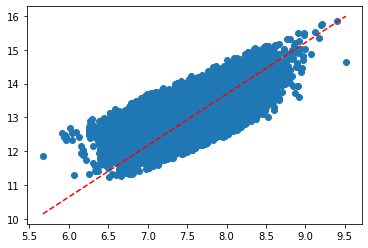

In [120]:
create_plot(size_log, price_log, slope_log, intercept_log)

In [31]:
# Multi-variate Linear Regression 
# Data 
price_log = np.log(np.array(housing.price, dtype=np.float32))
size_log = np.log(np.array(housing.sqft_living, dtype=np.float32))
bedrooms = np.array(housing.bedrooms, dtype= np.float32)

# Parameters : theta0 , theta1 , theta2
params = tf.Variable(initial_value=[0.1,0.05,0.02], dtype=np.float32)

# prediction 
def linear_regression(params, feature1, feature2):
    return params[0] + params[1]*feature1 + params[2]*feature2;
# loss function
def loss_function(params, feature1, feature2, targets):
    prediction = linear_regression(params, feature1, feature2)
    return tf.keras.losses.mae(targets, prediction)


In [32]:
opt = tf.keras.optimizers.Adam()

In [33]:
for i in range(10):
    opt.minimize(lambda: loss_function(params, size_log, bedrooms, price_log), var_list=[params])
    print('loss: {}, intercept: {}, slope_1: {}, slope_2: {}'.format(loss_function(params, size_log,\
                                                                                   bedrooms, price_log),\
                                                                    params[0],params[1],params[2]))

loss: 12.490962028503418, intercept: 0.10099999606609344, slope_1: 0.050999999046325684, slope_2: 0.020999997854232788
loss: 12.479040145874023, intercept: 0.10199999064207077, slope_1: 0.05199999362230301, slope_2: 0.021999994292855263
loss: 12.467120170593262, intercept: 0.10299999266862869, slope_1: 0.05299999564886093, slope_2: 0.022999996319413185
loss: 12.45519733428955, intercept: 0.10399998724460602, slope_1: 0.053999993950128555, slope_2: 0.02399999275803566
loss: 12.443277359008789, intercept: 0.10499998182058334, slope_1: 0.05499999225139618, slope_2: 0.024999989196658134
loss: 12.431354522705078, intercept: 0.10599998384714127, slope_1: 0.0559999942779541, slope_2: 0.025999991223216057
loss: 12.419435501098633, intercept: 0.10699997842311859, slope_1: 0.056999992579221725, slope_2: 0.02699998952448368
loss: 12.407513618469238, intercept: 0.10799998044967651, slope_1: 0.05799999088048935, slope_2: 0.027999987825751305
loss: 12.395589828491211, intercept: 0.10899997502565384,

In [34]:
# Batch Training: Taking the data in chunks
# 1 epoch: 1 iteration over complete data 
# Model Parameters are updated after processing each batch. 
# No memory constraints 

# Params 
c = tf.Variable(10.0, dtype=tf.float32)
m = tf.Variable(0.5, dtype = tf.float32)

# linear regression predictions 
def linear_regression(intercept, slope, features):
    return intercept + slope*features

# loss function 
def loss_function(intercept, slope, features, targets):
    predictions = linear_regression(intercept, slope, features)
    return tf.keras.losses.mse(targets, predictions)

In [35]:
opt = tf.keras.optimizers.Adam()

In [36]:
for batch in pd.read_csv("datasets/kc_house_data.csv", chunksize=100):
    size = np.array(batch['sqft_living'], np.float32)
    price = np.array(batch['price'], np.float32)
    
    opt.minimize(lambda: loss_function(c, m, size, price), var_list=[c,m])
    print('loss:{}, intercept:{}, slope:{}'.format(loss_function(c,m,size,price), c.numpy(), m.numpy()))

loss:360045445120.0, intercept:10.00100040435791, slope:0.5009999871253967
loss:337034051584.0, intercept:10.001999855041504, slope:0.5019983053207397
loss:433323737088.0, intercept:10.002999305725098, slope:0.5029993653297424
loss:466233425920.0, intercept:10.00400161743164, slope:0.504003643989563
loss:388905172992.0, intercept:10.0050048828125, slope:0.5050103664398193
loss:478294802432.0, intercept:10.006011009216309, slope:0.5060222148895264
loss:389578752000.0, intercept:10.007014274597168, slope:0.5070222020149231
loss:372677836800.0, intercept:10.008015632629395, slope:0.508018970489502
loss:340994621440.0, intercept:10.009014129638672, slope:0.509006917476654
loss:279574085632.0, intercept:10.01000690460205, slope:0.5099814534187317
loss:349411082240.0, intercept:10.01099967956543, slope:0.5109524726867676
loss:638055153664.0, intercept:10.011998176574707, slope:0.5119428038597107
loss:380784345088.0, intercept:10.012994766235352, slope:0.5129315257072449
loss:637355294720.0, 

loss:609053507584.0, intercept:10.112387657165527, slope:0.6106581091880798
loss:309646262272.0, intercept:10.113369941711426, slope:0.6116017699241638
loss:470237511680.0, intercept:10.114357948303223, slope:0.6125503778457642
loss:451178921984.0, intercept:10.115349769592285, slope:0.6135060787200928
loss:469848031232.0, intercept:10.116348266601562, slope:0.614473283290863
loss:402944491520.0, intercept:10.117344856262207, slope:0.615444004535675
loss:384205291520.0, intercept:10.118337631225586, slope:0.616418182849884
loss:554076733440.0, intercept:10.119345664978027, slope:0.6174233555793762
loss:331665506304.0, intercept:10.120348930358887, slope:0.6184133291244507
loss:362178805760.0, intercept:10.12134838104248, slope:0.6193922162055969
loss:443603255296.0, intercept:10.122353553771973, slope:0.6203816533088684
loss:521843212288.0, intercept:10.123360633850098, slope:0.6213825941085815
loss:311958863872.0, intercept:10.124360084533691, slope:0.622367262840271
loss:368214671360

In [37]:
print(c.numpy(), m.numpy())

10.217994 0.7161536


## Neural Networks 

1. Low-level approach 
    - We build all the layers of N.N by ourself,handle the weights & do the linear algebra manually(defining weights and layers of network, weighted sum and applying activation function
2. High-level approach 
    - `tf.keras.layers` provide high-level API's to construct the layers of N.N. These API's hide the underlying weights and linear algebra from us.
3. Types of Layers
    - Input Layer
    - Hidden Layer 
        - Dense Layer: 
            - Each node of layer is connected to all nodes of previous layer.
            - It applies weights to all the nodes in previous layer
    - Output Layer

In [38]:
# N.N

# Data: Features and Target
feature_data = tf.constant(housing[['bedrooms', 'sqft_living', 'floors']].values, dtype=tf.float32)
target_price = housing.price.values
feature_data

<tf.Tensor: shape=(21613, 3), dtype=float32, numpy=
array([[3.00e+00, 1.18e+03, 1.00e+00],
       [3.00e+00, 2.57e+03, 2.00e+00],
       [2.00e+00, 7.70e+02, 1.00e+00],
       ...,
       [2.00e+00, 1.02e+03, 2.00e+00],
       [3.00e+00, 1.60e+03, 2.00e+00],
       [2.00e+00, 1.02e+03, 2.00e+00]], dtype=float32)>

In [39]:
# Forward Pass of N.N

# Dense layer with 10 nodes 
dense1 = tf.keras.layers.Dense(units=10, activation='sigmoid')(feature_data)
# Dense Layer with 5 nodes
dense2 = tf.keras.layers.Dense(units=5, activation='sigmoid')(dense1)
# output layer 1 node -> dense layer
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)
print('dense1 ', dense1.shape)
print('dense2', dense2.shape)
output

dense1  (21613, 10)
dense2 (21613, 5)


<tf.Tensor: shape=(21613, 1), dtype=float32, numpy=
array([[0.7228201 ],
       [0.72204167],
       [0.72316813],
       ...,
       [0.7229186 ],
       [0.72249925],
       [0.7229186 ]], dtype=float32)>

## Activation Functions 
1. Each Hidden layer has 2 components
    1. Linear Operation: weighted sum 
    2. Non-linear: Introduce non-linearity -> Activation Function
2. There are some relationships which can't be captured by linear hypothesis or linear models, non-linearity is needed. Activation function introduces non-linearity. 

### Types
1. Sigmoid Activation
    - Mostly used in the output layer of Binary classification 
2. Relu(Rectified linear unit) Activation 
    - Used in the hidden layer, never used in output layer 
    - `relu = max(x,0)`
3. Softmax Activation
    - Used in the output layer of Classification problem(where target classes > 2)
    - `exp(z1)/summation(exp(zi))`
    - It gives the probability distribution over the classes. 
4. Code
    - `tf.keras.activations.relu(z)`
    - `tf.keras.layers.Dense(units=16, activation='softmax')

## Optimizers 
1. What they do ? Find the parameters which minimizes the loss 
2. SGD works better for simpler tasks. Need 10 times less iteration than other Optimizers

### Types 
1. SGD
2. RMS prop
3. ADAM 

**READ MORE ABOUT THEM**

In [4]:
## Local and Global Minima

import math
pi = 22.0/7.0
def custom_loss_function(x):
    return 4.0*math.cos(x-1)+tf.divide(math.cos(2.0*pi*x),x)

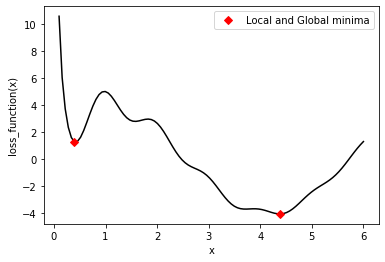

In [5]:
x = np.linspace(0.1, 6, 100)
y = [custom_loss_function(i) for i in x]
plt.figure()
plt.plot(x,y, 'k')
plt.xlabel('x')
plt.ylabel('loss_function(x)')
plt.plot([0.39, 4.39], [1.28, -4.05], 'rD', label='Local and Global minima')
plt.legend()
plt.show()

In [6]:
# local and global points
#  0.397979797979798 1.2813627147181323
# 4.390909090909091 -4.054220760554767

In [7]:
# Depending on initial value SGD can stuck in local minima
x1 = tf.Variable([5.0], tf.float32)
x2 = tf.Variable([0.3], tf.float32)

In [8]:
opt = tf.keras.optimizers.SGD(learning_rate=2.0)
# opt = tf.keras.optimizers.Adam()

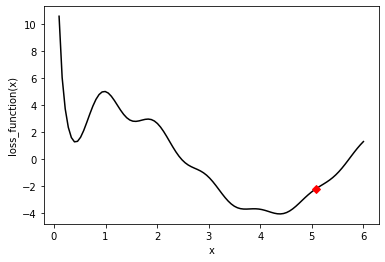

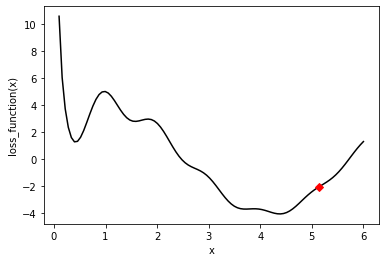

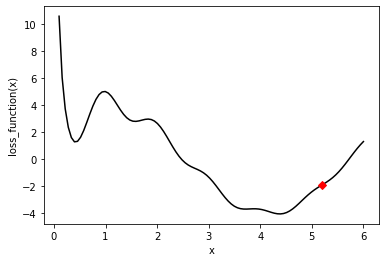

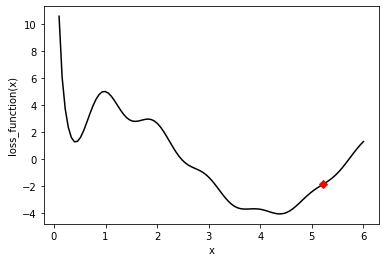

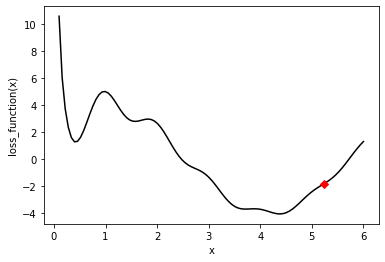

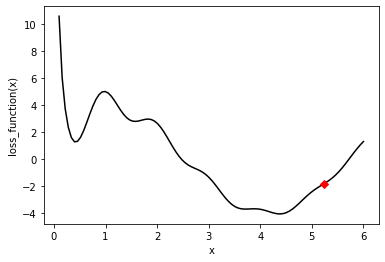

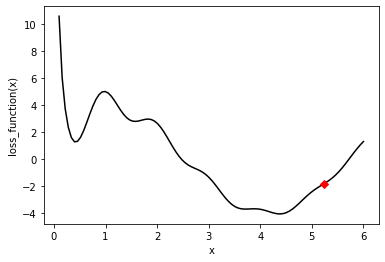

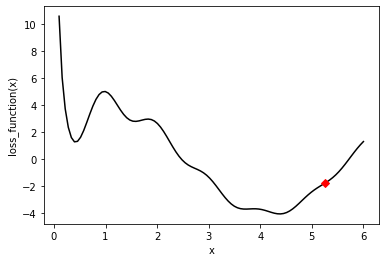

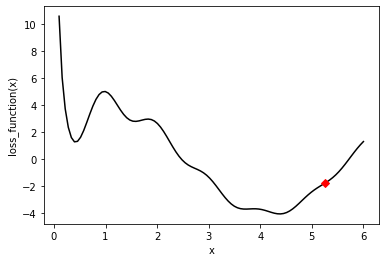

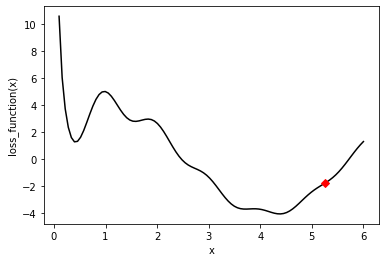

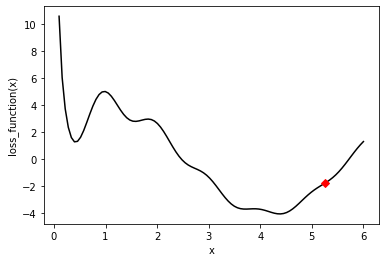

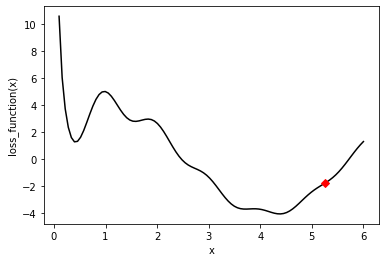

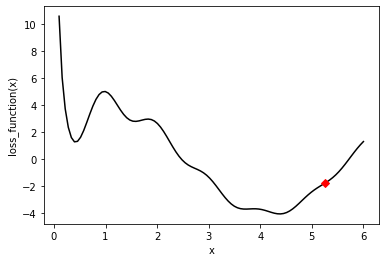

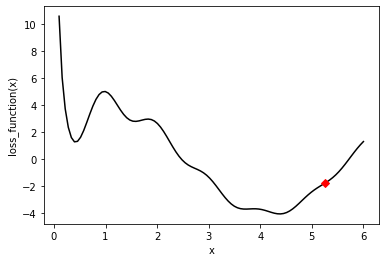

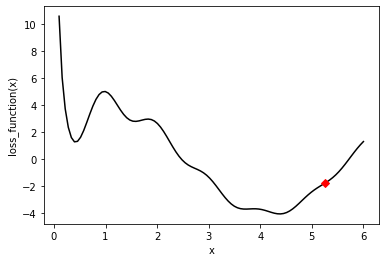

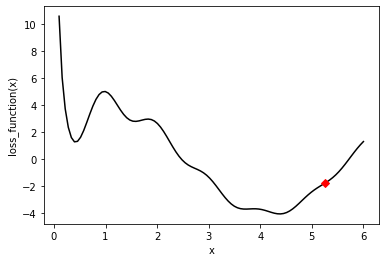

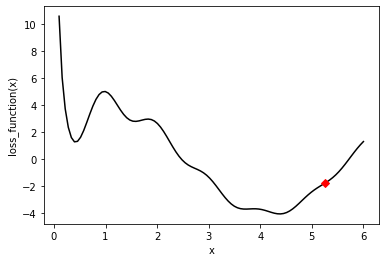

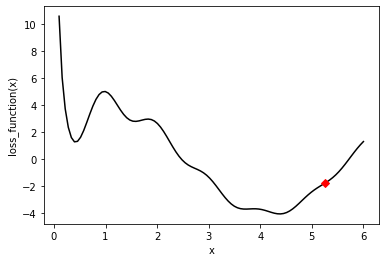

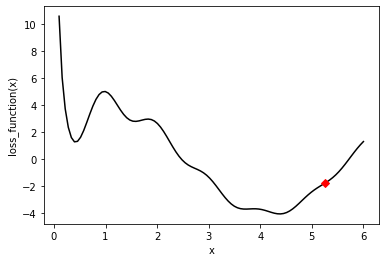

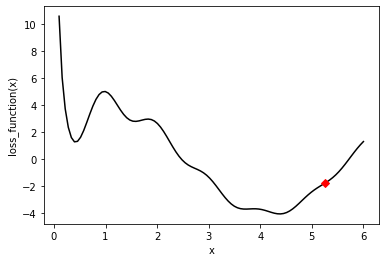

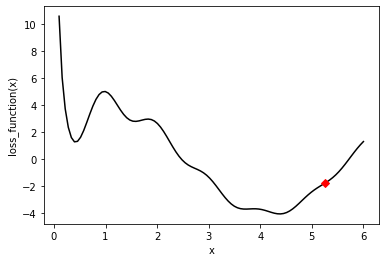

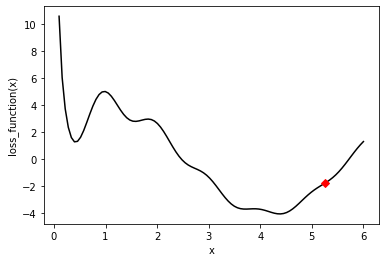

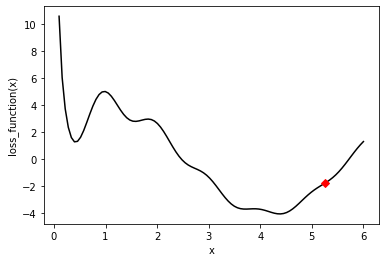

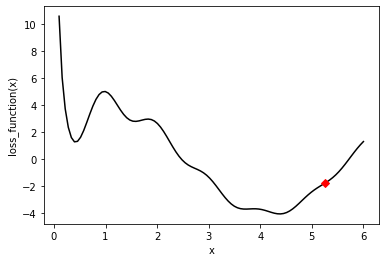

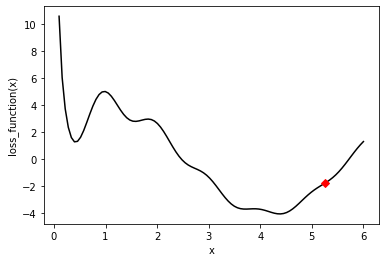

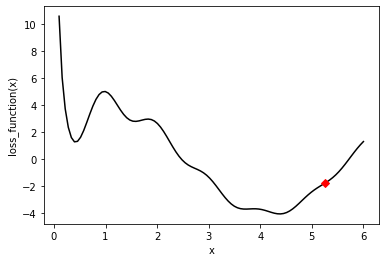

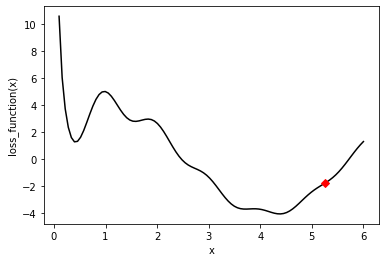

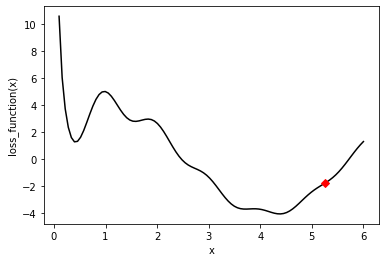

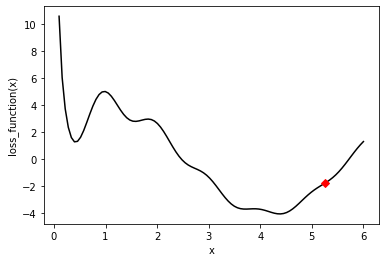

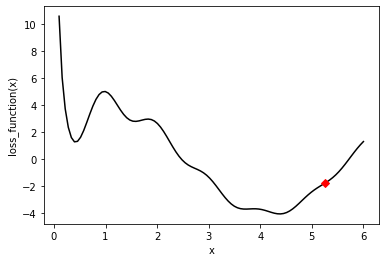

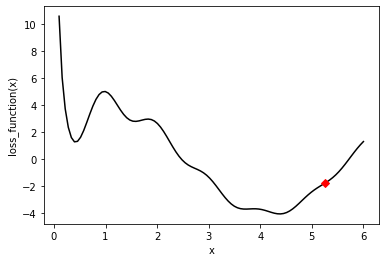

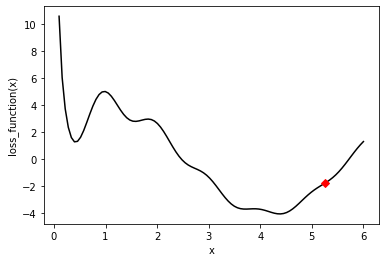

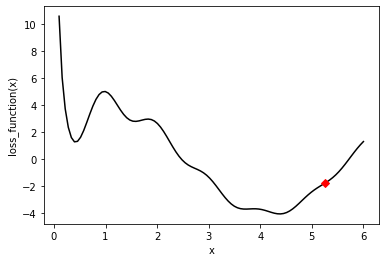

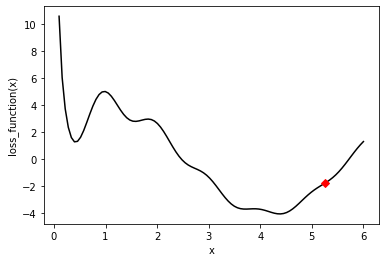

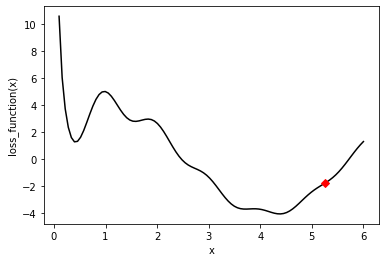

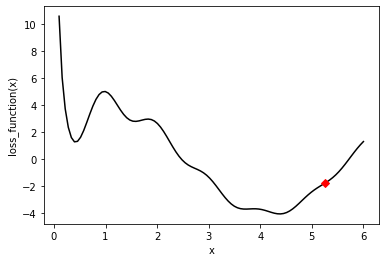

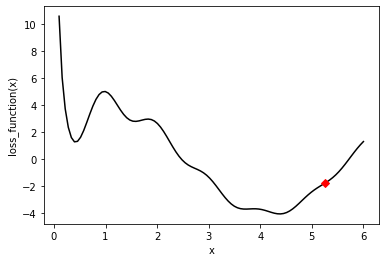

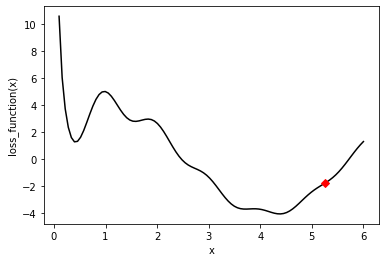

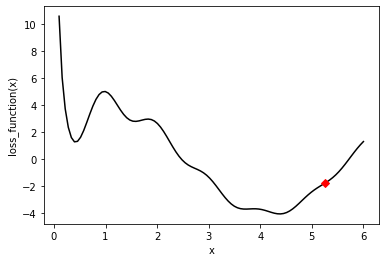

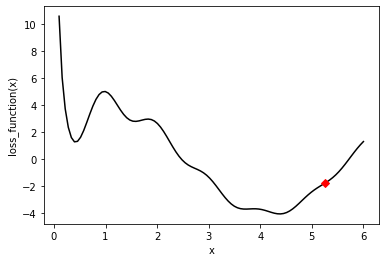

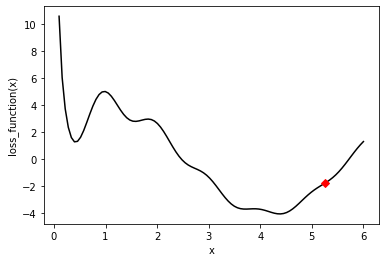

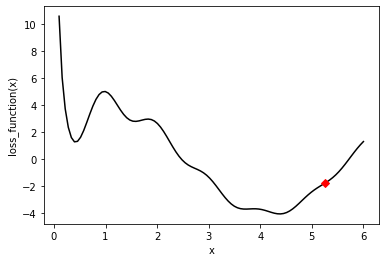

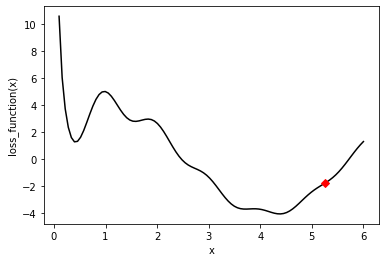

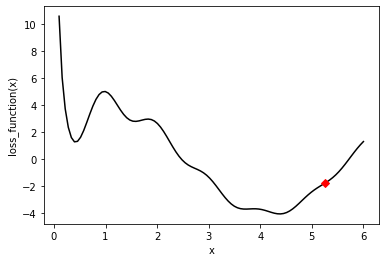

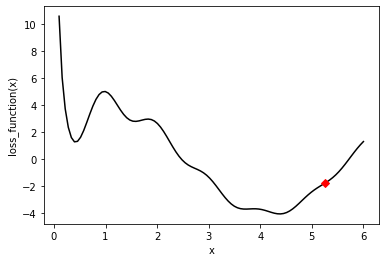

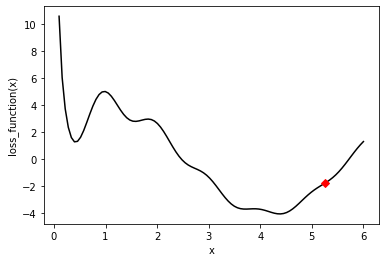

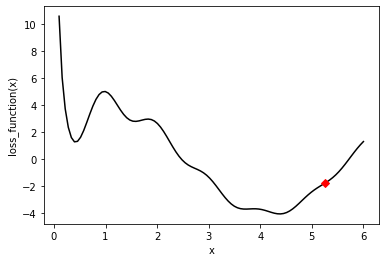

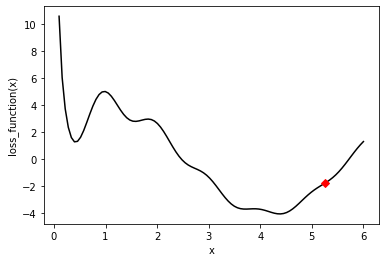

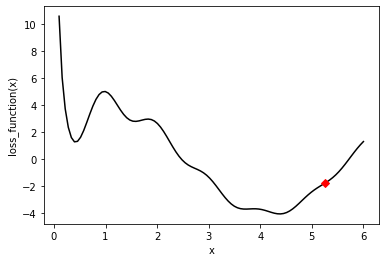

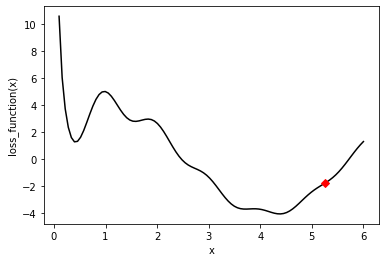

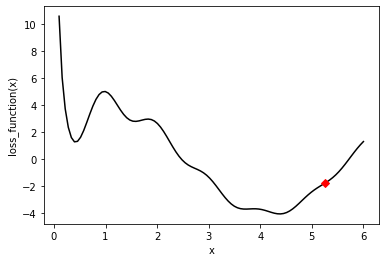

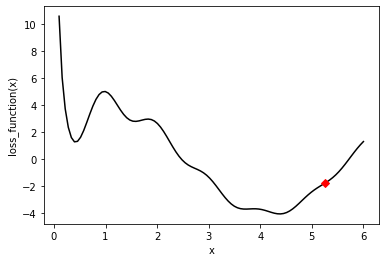

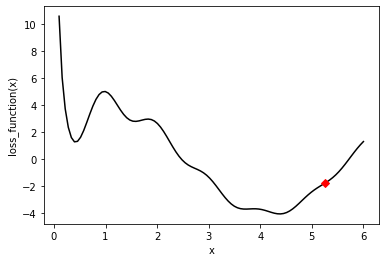

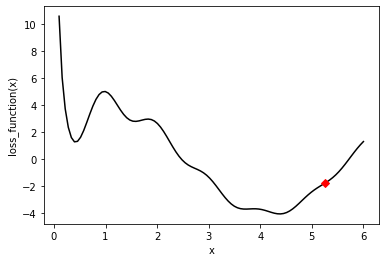

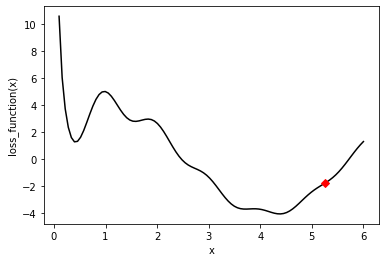

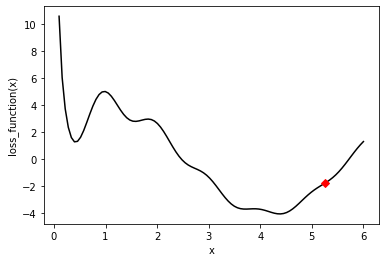

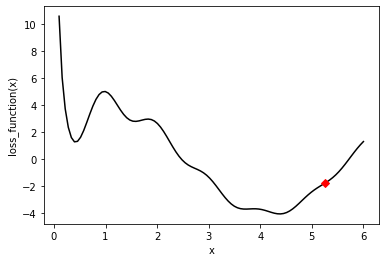

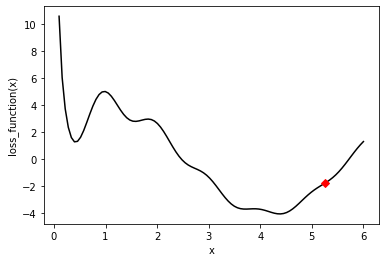

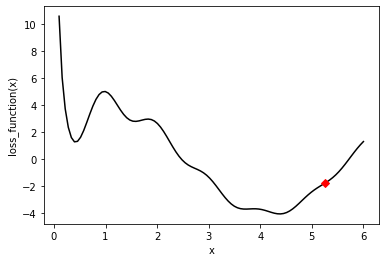

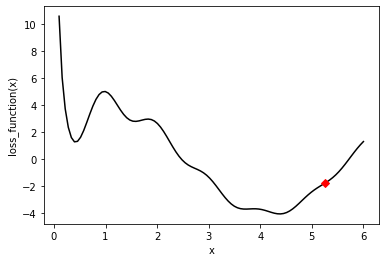

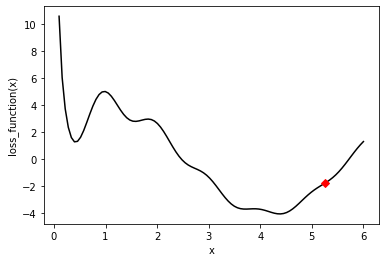

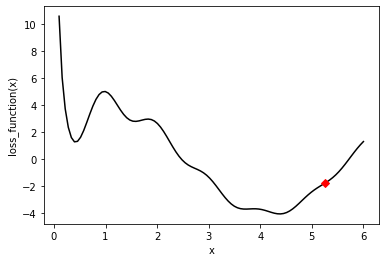

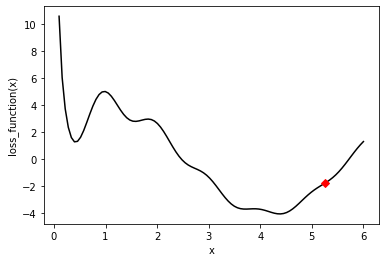

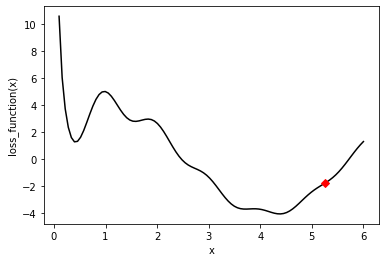

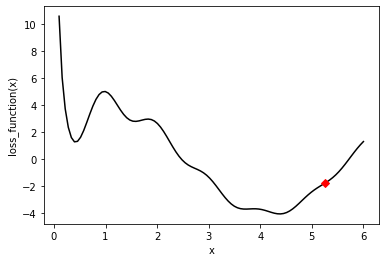

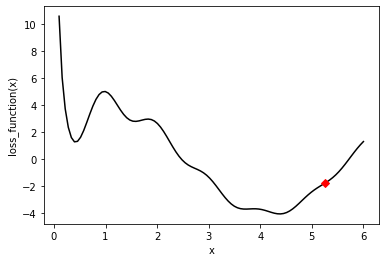

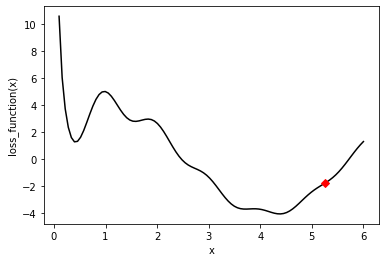

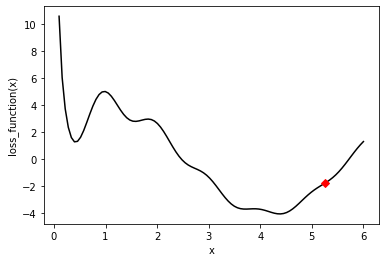

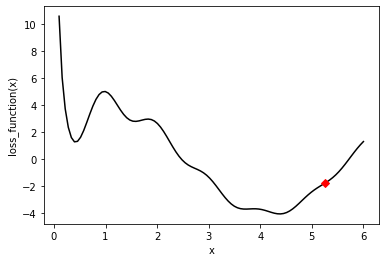

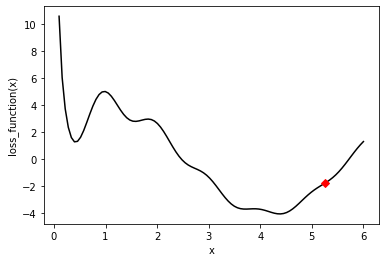

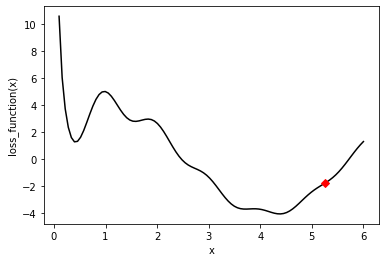

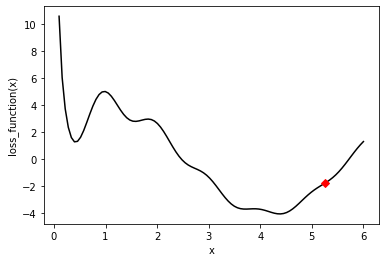

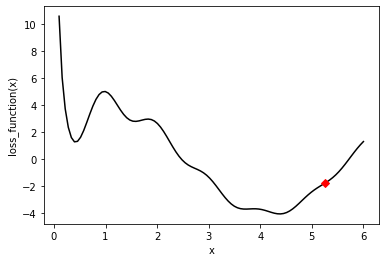

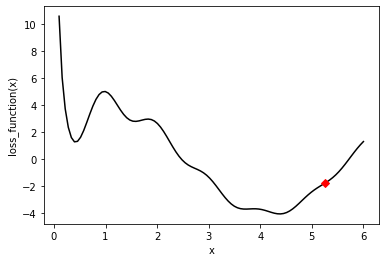

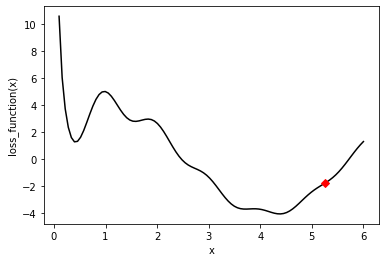

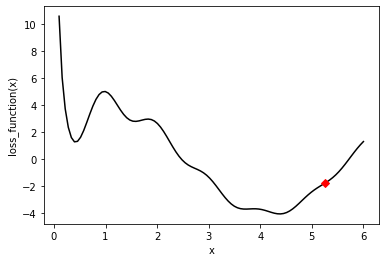

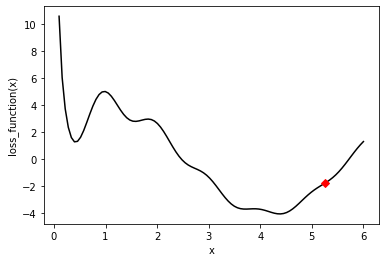

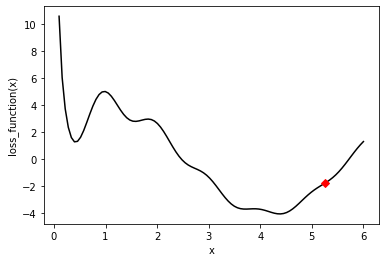

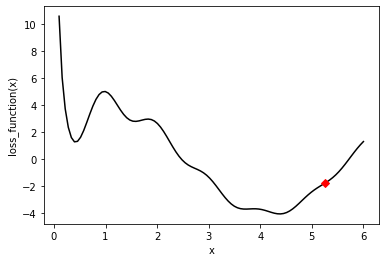

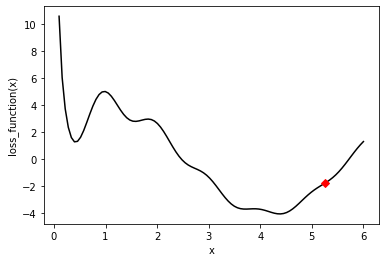

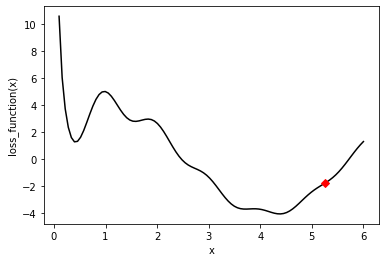

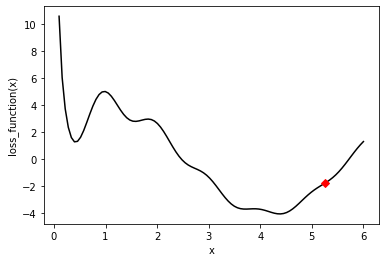

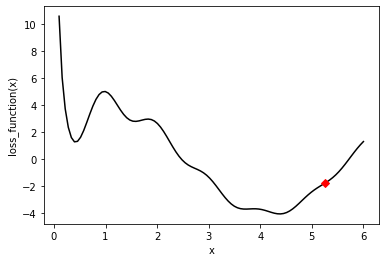

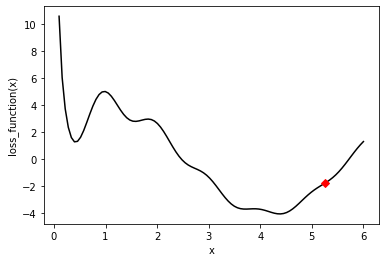

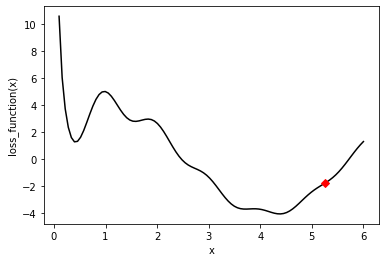

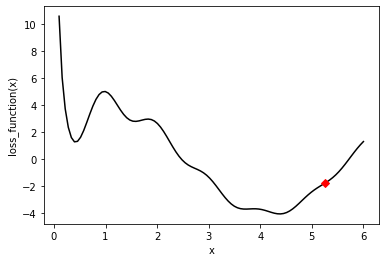

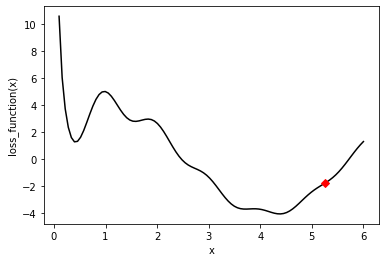

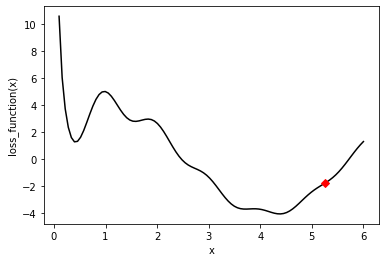

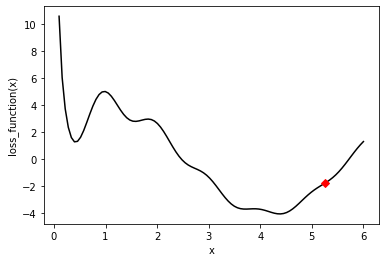

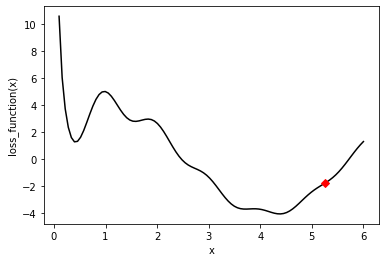

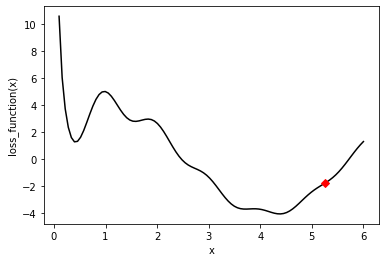

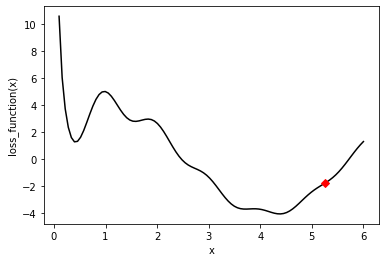

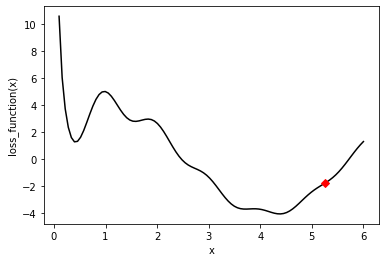

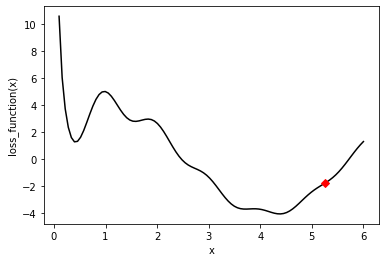

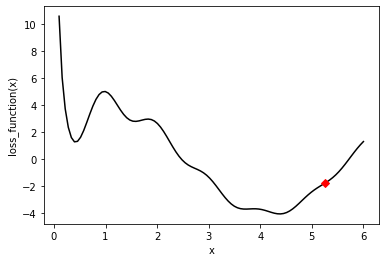

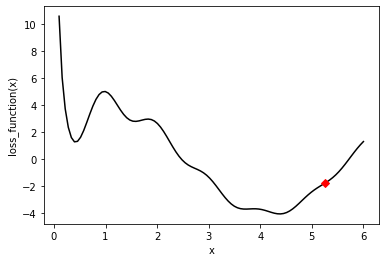

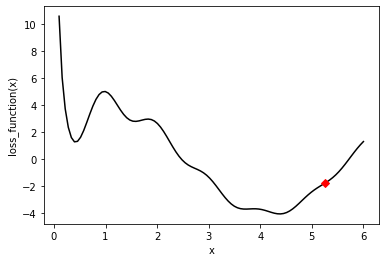

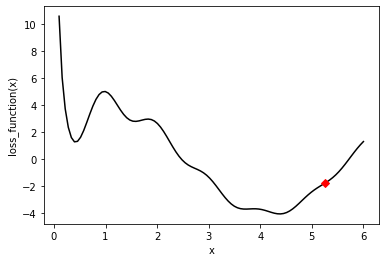

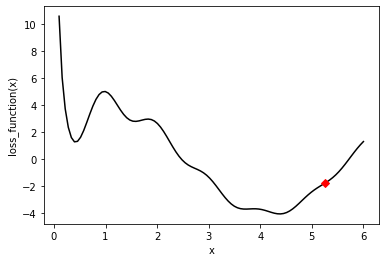

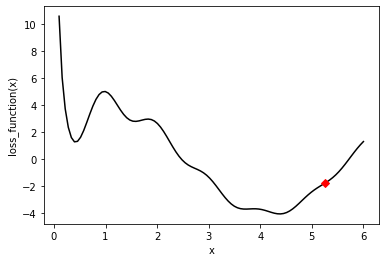

[5.2478876] [0.3]
tf.Tensor([-1.7919079], shape=(1,), dtype=float32) tf.Tensor([2.0269074], shape=(1,), dtype=float32)


In [9]:
for i in range(100):
    opt.minimize(lambda: custom_loss_function(x1), var_list=[x1])
#     opt.minimize(lambda: custom_loss_function(x2), var_list=[x2])
#     print('loss1: {}, x1: {} and loss2:{}, x2:{}'.format(custom_loss_function(x1).numpy(),x1.numpy(),\
#                                                         custom_loss_function(x2).numpy(),x2.numpy()))
    x = np.linspace(0.1, 6, 100)
    y = [custom_loss_function(i) for i in x]
    plt.figure()
    plt.plot(x,y, 'k')
    plt.xlabel('x')
    plt.ylabel('loss_function(x)')
    plt.plot([x1.numpy()], [custom_loss_function(x1).numpy()], 'rD')
    plt.show()
print(x1.numpy(), x2.numpy())
print(custom_loss_function(x1), custom_loss_function(x2))
# Why loss is not minimizing here ??

In [101]:
# Exercise: Use RMS optimizer with momentum to show how momentum helps to get out of local minima

## Initializers 

1. We have seen how model performance sometimes depend on the initial value of parameters. 
    - Bad choice can lead to model stuck in local minima
2. Initializing all parameters to 0 or 1 in not good choice
3. Better to randomly choose the parameters 

## Random Initializers 
Choose the parameters randomly from a probability distribution 
1. Normal Distribution
2. Uniform 
3. Glorot Initializers: Good for ML problems 
    - By default keras layers use this initializer to initialize the weights 
        - `tf.keras.layers.Dense(units=16, activation='sigmoid', kernel_initializer='glorot_uniform')`
    - We can change this initializer, say for e.g initialize all parameters to zero
        - `tf.keras.layers.Dense(units=16, activation='sigmoid', kernel_initializer='zeros')`
        
## Overfitting 
1. N.N has large no. of parameters so they are easily prone to overfitting 
2. Simplest way to tackle overfitting is `dropout`

## Droput 
1. It is operation in which some percentage of weights connecting 2 layers are randomly dropped 
2. Or operation in which output of some percentage of nodes is made to zero. Both things lead to same result.
3. `tf.keras.layers.Dropout(rate=0.25)(dense2)`: Drops the 25% of nodes' output to zero
4. By applying droput we get a more robust model. 
    - Model doesn't depend/rely on a particular node's output. Because sometimes that node's output will be =0.
    - Overfitting happens when model starts learning minute details or noise(anything very particular to a particular batch of data not a general pattern). or it happens when giving importance to a non-significant feature. But when we will make output of nodes =0 randomly, so network doesn't get chance to focus on any particular feature(any particular node).

In [102]:
# show the use of dropout layer 

In [14]:
# Binary Classification: Default or not 
# Build a N.N with 1 hidden having 7 nodes. Input Layer = 23 nodes/features, Ouput layer= 1 node 

# Data: credit card data 
credit_data = pd.read_csv("datasets/uci_credit_card.csv")
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
credit_data = credit_data.sample(n=4000)

In [16]:
credit_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,15159.210250,168136.920000,1.615750,1.856750,1.558250,35.408250,-0.043000,-0.158750,-0.190000,-0.240250,...,42826.514000,40267.558500,38650.473250,5688.476750,5.853882e+03,5038.588750,5065.780750,4847.955250,5323.738750,0.21925
std,8612.372101,129185.107023,0.486478,0.785101,0.522183,9.163464,1.090618,1.169996,1.178239,1.155579,...,64398.431673,60616.101451,59187.941214,15543.880526,3.043741e+04,16964.477068,17775.515494,14506.087335,19420.127081,0.41379
min,19.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-20254.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000
25%,7623.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2312.000000,1682.750000,1272.000000,957.500000,8.875000e+02,390.000000,311.500000,264.000000,115.250000,0.00000
50%,15174.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18608.500000,18004.000000,17007.500000,2032.000000,2.009000e+03,1826.500000,1500.000000,1511.000000,1500.000000,0.00000
75%,22729.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,51623.000000,49531.250000,48526.000000,5011.000000,5.000000e+03,4381.000000,4080.750000,4326.750000,4003.750000,0.00000
max,29996.000000,720000.000000,2.000000,6.000000,3.000000,73.000000,5.000000,5.000000,7.000000,7.000000,...,530672.000000,508213.000000,496801.000000,298887.000000,1.684259e+06,508229.000000,497000.000000,379267.000000,527143.000000,1.00000


In [17]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 8533 to 245
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          4000 non-null   int64  
 1   LIMIT_BAL                   4000 non-null   float64
 2   SEX                         4000 non-null   int64  
 3   EDUCATION                   4000 non-null   int64  
 4   MARRIAGE                    4000 non-null   int64  
 5   AGE                         4000 non-null   int64  
 6   PAY_0                       4000 non-null   int64  
 7   PAY_2                       4000 non-null   int64  
 8   PAY_3                       4000 non-null   int64  
 9   PAY_4                       4000 non-null   int64  
 10  PAY_5                       4000 non-null   int64  
 11  PAY_6                       4000 non-null   int64  
 12  BILL_AMT1                   4000 non-null   float64
 13  BILL_AMT2                   400

In [18]:
credit_df = credit_data.drop(columns='ID')
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
8533,80000.0,2,1,2,27,2,-1,-1,0,0,...,29398.0,15037.0,0.0,980.0,28798.0,1000.0,1000.0,0.0,0.0,0
24184,160000.0,1,1,2,28,0,0,0,0,0,...,151403.0,115731.0,113635.0,6000.0,25409.0,30000.0,5000.0,5000.0,4500.0,0
12250,340000.0,2,2,1,39,-2,-2,-2,-2,-2,...,5674.0,3344.0,3406.0,65758.0,359.0,5674.0,3692.0,3406.0,2622.0,0
26482,50000.0,2,2,1,54,0,0,0,0,0,...,49581.0,49550.0,48871.0,2102.0,2013.0,1747.0,2012.0,2000.0,5900.0,0
11629,110000.0,2,2,1,48,0,0,0,0,0,...,47152.0,48138.0,49171.0,8788.0,3152.0,1687.0,1745.0,1831.0,1732.0,0


In [19]:
credit_default = np.array(credit_df['default.payment.next.month'])

In [20]:
credit_df2 = credit_df.drop(columns='default.payment.next.month')
credit_df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8533,80000.0,2,1,2,27,2,-1,-1,0,0,...,28798.0,29398.0,15037.0,0.0,980.0,28798.0,1000.0,1000.0,0.0,0.0
24184,160000.0,1,1,2,28,0,0,0,0,0,...,154012.0,151403.0,115731.0,113635.0,6000.0,25409.0,30000.0,5000.0,5000.0,4500.0
12250,340000.0,2,2,1,39,-2,-2,-2,-2,-2,...,353.0,5674.0,3344.0,3406.0,65758.0,359.0,5674.0,3692.0,3406.0,2622.0
26482,50000.0,2,2,1,54,0,0,0,0,0,...,49661.0,49581.0,49550.0,48871.0,2102.0,2013.0,1747.0,2012.0,2000.0,5900.0
11629,110000.0,2,2,1,48,0,0,0,0,0,...,74340.0,47152.0,48138.0,49171.0,8788.0,3152.0,1687.0,1745.0,1831.0,1732.0


In [21]:
credit_features = credit_df2.values
credit_features.shape

(4000, 23)

In [22]:
# Features and target 
print(credit_features.shape, credit_default.shape)

(4000, 23) (4000,)


In [23]:
# splitting data into train and test 
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(credit_features, credit_default, test_size=0.25, \
                                                    stratify=credit_default)
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

X_train = tf.constant(X_train, tf.float32)
y_train = tf.constant(y_train, tf.float32)
X_test = tf.constant(X_test, tf.float32)
y_test = tf.constant(y_test, tf.float32)
X_train

Train:  (3000, 23) (3000,)
Test:  (1000, 23) (1000,)


<tf.Tensor: shape=(3000, 23), dtype=float32, numpy=
array([[3.6000e+05, 2.0000e+00, 2.0000e+00, ..., 7.7660e+03, 7.8030e+03,
        7.9710e+03],
       [1.0000e+05, 2.0000e+00, 1.0000e+00, ..., 5.7500e+04, 2.0000e+03,
        0.0000e+00],
       [2.0000e+05, 1.0000e+00, 2.0000e+00, ..., 4.1600e+02, 0.0000e+00,
        8.3200e+02],
       ...,
       [8.0000e+04, 2.0000e+00, 3.0000e+00, ..., 1.7560e+03, 1.7580e+03,
        1.7170e+03],
       [2.0000e+05, 2.0000e+00, 1.0000e+00, ..., 1.6400e+02, 3.3830e+03,
        4.3310e+03],
       [4.2000e+05, 1.0000e+00, 2.0000e+00, ..., 7.8300e+03, 7.2530e+03,
        1.1326e+04]], dtype=float32)>

In [25]:
# Build the N.N using Low level api 
# input layer = 23 nodes, hidden-layer-1 = 7 nodes, output-layer= 1 nodes 

# Input shape = (M, 23)
# Weights of Dense-layer-1 = (7,23) or (23,7) --> (23,7) is good choice
# Bias of Dense-layer-1 = (7,)
# Output of Dense-layer-1 = (M, 7)
# Weights of Dense-layer-2/Output layer = (1,7) or (7,1) --> (7,1) is good choice
# Bias of output layer = (1,)

# w1 = tf.Variable(tf.random.uniform(shape=[23,7]))
w1 = tf.Variable(tf.random.normal(shape=[23,7]))
# b1 = tf.Variable(tf.random.uniform(shape=(7,)))
b1 = tf.Variable(tf.ones(shape=(7,)))
# w2 = tf.Variable(tf.random.uniform(shape=(7,1)))
w2 = tf.Variable(tf.random.normal(shape=(7,1)))
# b2 = tf.Variable(tf.random.uniform(shape=(1,)))
b2 = tf.Variable(tf.zeros(shape=(1,)))

print(w1.shape, b1.shape, w2.shape, b2.shape)

def model_prediction(w1, b1, w2, b2, features):
    z1 = tf.matmul(features, w1) + b1 
    dense1 = tf.keras.activations.relu(z1)
    # apply the dropout layer 
    dense_drop1 = tf.keras.layers.Dropout(0.25)(dense1)
    z2 = tf.matmul(dense_drop1, w2) + b2
    output = tf.keras.activations.sigmoid(z2)
    return output

def credit_loss_fn(w1, b1, w2, b2, features, targets):
    predictions = model_prediction(w1,b1, w2, b2, features)
    return tf.keras.losses.binary_crossentropy(targets, predictions)


(23, 7) (7,) (7, 1) (1,)


In [26]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
# Training the model
for i in range(101):
    opt.minimize(lambda: credit_loss_fn(w1, b1, w2, b2, X_train, y_train), var_list=[w1,b1,w2,b2])
    if i%10 == 0:
        print('loss:', sum(credit_loss_fn(w1, b1, w2, b2, X_train, y_train).numpy()))

loss: 11514.940965414047
loss: 11514.940965414047
loss: 11514.940965414047
loss: 11514.940965414047
loss: 11514.940965414047
loss: 11514.940965414047
loss: 11514.940965414047
loss: 11514.940965414047
loss: 11514.940965414047
loss: 11514.940965414047
loss: 11514.940965414047


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
test_predictions = model_prediction(w1,b1,w2,b2, X_test)


In [29]:
confusion_matrix(y_test, test_predictions)

array([[740,  41],
       [206,  13]])

## Tensorflow API's for NN

### Sequential API
1. Layers: Input, Hidden , Ouput layer 
    - These layers are in the ordered sequence. 
    - Linear stack of layers, one after other
2. Only in first hidden layer, size of input is mentioned 

### Functional API 
1. There is no constraint that all layers should be in a linear sequence
2. Usage 
    - Can make & train sequential models 
    - If we want to train 2 models jointly to predict the same target. 
        - We will train 2 models separately and then merge them to predict the final target. 
        - See the use case below

### Training and Validation with keras 
1. Overview of training and evaluation process
    - Load and clean the data 
    - Define model (model architecture)
    - Train and validate the model (on train and validation set)
    - Evaluate the model (on test set)
    
2. How to train the model 
    - `model.fit(features, labels)` 
    - Optional Arguements 
        - batch_size : Parameters are updated after passing over 1 batch_size.
        - epochs : 1 epoch = 1 full pass over the training set
        - validation_split: To split the data in train and validation set, to see how model training is going on
            - Give us idea of overfitting if `train_accuracy >> validation_accuracy` 
            - Help in tuning the Hyper-parameters of model 
3. How to evaluate on test set 
    - `model.evaluate(test_features)
4. We can easily change the loss and evaluation metric in Keras 
    - `model.compile(optimizer='adam', loss='your-choice', metrics =['accuracy/your-choice'])`

In [30]:
## Building a Sequential Model 

seq_model = tf.keras.Sequential()
# size of input need to be mentioned in the first layer only
seq_model.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(28*28, ))) 
# This layer will take input of shape (M, 28*28) and give output = (M, 16) where M = Training Examples

seq_model.add(tf.keras.layers.Dense(units=8, activation='relu')) # No need to specify size of input now
seq_model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [31]:
# Till now Sequential Model is defined only, need to compile it in order to use it 
seq_model.compile(optimizer='adam', loss='categorical_crossentropy') 
# This loss is for classification problem with classes > 2

In [32]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
Total params: 12,732
Trainable params: 12,732
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Building 2 models jointly to predict the target 
# Input1: 28*28 images , Input2: 10 features of meta data 
# We want both Input1 and Input2 features to predict the target class but restrict how they interact in the model
# Ouput = One of 4 classes representing different signs (A, B, C,D)

In [34]:
# Model1 input shape
model1_input = tf.keras.Input(shape=(28*28,)) # It creates placeholder tensor, SEE the Documentation 
# Model2 input shape
model2_input = tf.keras.Input(shape=(10,))

In [35]:
# model1 layers
model1_layer1 = tf.keras.layers.Dense(units=12, activation='relu')(model1_input)

model1_layer2 = tf.keras.layers.Dense(units=4, activation='softmax')(model1_layer1)


In [36]:
# model2 layers 
model2_layer1 = tf.keras.layers.Dense(units=8, activation='relu')(model2_input)
model2_layer2 = tf.keras.layers.Dense(units=4, activation='softmax')(model2_layer1)

In [37]:
# Merge the two models 
merged = tf.keras.layers.add([model1_layer2, model2_layer2]) # node wise addition

In [38]:
# Define the functional model: SEE the DOCUMENTATION 
model = tf.keras.Model(inputs= [model1_input, model2_input], outputs = merged)

In [39]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy)

In [40]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 12)           9420        input_1[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 8)            88          input_2[0][0]                    
_______________________________________________________________________________________

In [41]:
# Training a sequential model on sign-language dataset 

# Data 
column_names = ['labels' if i==0 else 'feature-'+str(i) for i in range(785)]
sign_lang_data = pd.read_csv('datasets/slmnist.csv', names=column_names)
print(len(sign_lang_data))
sign_lang_data.head()

2000


,labels,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-775,feature-776,feature-777,feature-778,feature-779,feature-780,feature-781,feature-782,feature-783,feature-784
0,1,142,143,146,148,149,149,149,150,151,...,0,15,55,63,37,61,77,65,38,23
1,0,141,142,144,145,147,149,150,151,152,...,173,179,179,180,181,181,182,182,183,183
2,1,156,157,160,162,164,166,169,171,171,...,181,197,195,193,193,191,192,198,193,182
3,3,63,26,65,86,97,106,117,123,128,...,175,179,180,182,183,183,184,185,185,185
4,1,156,160,164,168,172,175,178,180,182,...,108,107,106,110,111,108,108,102,84,70


In [52]:
sign_lang_labels_orig = np.array(sign_lang_data.labels, dtype=np.float32)
sign_lang_data_2 = sign_lang_data.drop(columns='labels')
sign_lang_features_orig = np.array(sign_lang_data_2.values, np.float64)

print(sign_lang_features_orig.shape, sign_lang_labels_orig.shape)
print(sign_lang_features_orig.dtype, sign_lang_labels_orig.dtype)
sign_lang_features_orig

(2000, 784) (2000,)
float64 float32


array([[142., 143., 146., ...,  65.,  38.,  23.],
       [141., 142., 144., ..., 182., 183., 183.],
       [156., 157., 160., ..., 198., 193., 182.],
       ...,
       [177., 179., 180., ..., 239., 233., 240.],
       [121., 129., 138., ..., 197., 198., 211.],
       [178., 178., 178., ..., 195., 194., 192.]])

In [53]:
# Converting the discrete labels to binary matrices e.g 3 = [0, 0, 1, 0]
# categorical_crossentropy expects labels in this format 
from tensorflow.keras.utils import to_categorical
sign_lang_labels = to_categorical(sign_lang_labels_orig)
sign_lang_labels

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [54]:
# Normalize/standardize the features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
scaler.fit(sign_lang_features_orig)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [57]:
sign_lang_features = scaler.transform(sign_lang_features_orig)

In [58]:
sign_lang_features

array([[0.56573705, 0.56746032, 0.57936508, ..., 0.25490196, 0.14901961,
        0.09019608],
       [0.56175299, 0.56349206, 0.57142857, ..., 0.71372549, 0.71764706,
        0.71764706],
       [0.62151394, 0.62301587, 0.63492063, ..., 0.77647059, 0.75686275,
        0.71372549],
       ...,
       [0.70517928, 0.71031746, 0.71428571, ..., 0.9372549 , 0.91372549,
        0.94117647],
       [0.48207171, 0.51190476, 0.54761905, ..., 0.77254902, 0.77647059,
        0.82745098],
       [0.70916335, 0.70634921, 0.70634921, ..., 0.76470588, 0.76078431,
        0.75294118]])

In [59]:
# Define the model architecture 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [60]:
model.compile(optimizer='SGD', loss=tf.keras.losses.categorical_crossentropy)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 68        
Total params: 12,628
Trainable params: 12,628
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_9_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_9',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 16,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_10',
    'trainable': True,
    'dtype': 'float32',
    'units': 4,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    '

In [61]:
print(sign_lang_features.shape, sign_lang_labels.shape)

(2000, 784) (2000, 4)


In [65]:
# Split data in Train and test 
X_train, X_test, y_train, y_test = train_test_split(sign_lang_features, sign_lang_labels, test_size=0.2,\
                                                    stratify=sign_lang_labels)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1600, 784) (1600, 4)
(400, 784) (400, 4)


In [69]:
from collections import Counter

In [70]:
Counter(sign_lang_labels_orig)

Counter({1.0: 500, 0.0: 500, 3.0: 500, 2.0: 500})

In [62]:
# Training the model 
model.fit(sign_lang_features, sign_lang_labels, epochs=5)

Epoch 1/5
63/63 [==============================] - 0s 1ms/step - loss: 1.2088
Epoch 2/5
63/63 [==============================] - 0s 2ms/step - loss: 1.0038
Epoch 3/5
63/63 [==============================] - 0s 2ms/step - loss: 0.9001
Epoch 4/5
63/63 [==============================] - 0s 2ms/step - loss: 0.8304
Epoch 5/5
63/63 [==============================] - 0s 2ms/step - loss: 0.7553


In [76]:
sign_lang_labels

array([1., 0., 1., ..., 2., 3., 2.], dtype=float32)

In [74]:
# Using different metric 
model.compile(optimizer='RMSprop', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [75]:
# Training and validation over validation data
model.fit(sign_lang_features, sign_lang_labels, epochs=10, validation_split=0.1)

Epoch 1/10
57/57 [==============================] - 0s 5ms/step - loss: 0.6679 - accuracy: 0.7789 - val_loss: 0.8311 - val_accuracy: 0.6650
Epoch 2/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.8628 - val_loss: 0.6002 - val_accuracy: 0.6950
Epoch 3/10
57/57 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.9117 - val_loss: 0.3284 - val_accuracy: 0.9500
Epoch 4/10
57/57 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.9322 - val_loss: 0.4448 - val_accuracy: 0.7450
Epoch 5/10
57/57 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.9511 - val_loss: 0.3302 - val_accuracy: 0.8400
Epoch 6/10
57/57 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9522 - val_loss: 0.2701 - val_accuracy: 0.9100
Epoch 7/10
57/57 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9706 - val_loss: 0.3300 - val_accuracy: 0.8200
Epoch 8/10
57/57 [==

In [76]:
# Detecting the Overfitting. 
# To show overfitting, we will train model on small dataset
# A small sample, coupled with a heavily-parameterized model, will generally lead to overfitting.
# This means that your model will simply memorize the class of each example, rather than identifying 
# features that generalize to many examples.

# You will detect overfitting by checking whether the validation sample loss is substantially higher
# than the training sample loss and whether it increases with further training. With a small sample and
# a high learning rate, the model will struggle to converge on an optimum. You will set a low learning rate
# for the optimizer, which will make it easier to identify overfitting.

In [80]:
# Sample dataset 

small_sign_features, x, small_sign_labels, y = train_test_split(sign_lang_features,sign_lang_labels,\
                                                                test_size=0.987, stratify= sign_lang_labels)
print(small_sign_features.shape)

(26, 784)


In [82]:
# define the model 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1024, activation='relu', input_shape=(784,))) # Highly-parameterized
model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [83]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),\
              loss= tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 4100      
Total params: 807,940
Trainable params: 807,940
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(small_sign_features, small_sign_labels, epochs=50, validation_split=0.5)

Epoch 1/50
1/1 [==============================] - 0s 155ms/step - loss: 1.5079 - accuracy: 0.3077 - val_loss: 4.1784 - val_accuracy: 0.3846
Epoch 2/50
1/1 [==============================] - 0s 28ms/step - loss: 3.0258 - accuracy: 0.3846 - val_loss: 4.7822 - val_accuracy: 0.1538
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 2.6990 - accuracy: 0.3077 - val_loss: 2.1452 - val_accuracy: 0.3846
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 0.9001 - accuracy: 0.7692 - val_loss: 2.7072 - val_accuracy: 0.2308
Epoch 5/50
1/1 [==============================] - 0s 30ms/step - loss: 1.7008 - accuracy: 0.3077 - val_loss: 1.6856 - val_accuracy: 0.2308
Epoch 6/50
1/1 [==============================] - 0s 34ms/step - loss: 1.3724 - accuracy: 0.5385 - val_loss: 1.2178 - val_accuracy: 0.3077
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 1.2458 - accuracy: 0.3077 - val_loss: 1.0992 - val_accuracy: 0.6154
Epoch 8/50
1/1 [==========

In [91]:
print(X_train.shape, y_train.shape)
y_train[0,:]

(1600, 784) (1600, 4)


array([0., 0., 0., 1.], dtype=float32)

In [92]:
# Build a small model i.e model with less parameters for sign-lang classification 
small_model = tf.keras.Sequential()
small_model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(784,)))
small_model.add(tf.keras.layers.Dense(4, activation='softmax'))

small_model.compile(optimizer='SGD', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'] )
small_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 68        
Total params: 12,628
Trainable params: 12,628
Non-trainable params: 0
_________________________________________________________________


In [93]:
small_model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
45/45 [==============================] - 0s 5ms/step - loss: 1.3329 - accuracy: 0.4146 - val_loss: 1.2276 - val_accuracy: 0.4437
Epoch 2/10
45/45 [==============================] - 0s 3ms/step - loss: 1.1349 - accuracy: 0.6243 - val_loss: 1.0468 - val_accuracy: 0.7000
Epoch 3/10
45/45 [==============================] - 0s 3ms/step - loss: 0.9431 - accuracy: 0.7722 - val_loss: 0.8628 - val_accuracy: 0.8250
Epoch 4/10
45/45 [==============================] - 0s 2ms/step - loss: 0.7510 - accuracy: 0.8340 - val_loss: 0.7094 - val_accuracy: 0.8875
Epoch 5/10
45/45 [==============================] - 0s 1ms/step - loss: 0.6167 - accuracy: 0.8778 - val_loss: 0.6100 - val_accuracy: 0.8750
Epoch 6/10
45/45 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.9160 - val_loss: 0.4891 - val_accuracy: 0.9187
Epoch 7/10
45/45 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.9312 - val_loss: 0.4639 - val_accuracy: 0.9000
Epoch 8/10
45/45 [==

In [96]:
# Build a small model i.e model with less parameters for sign-lang classification 
large_model = tf.keras.Sequential()
large_model.add(tf.keras.layers.Dense(1024, activation='relu', input_shape=(784,)))
large_model.add(tf.keras.layers.Dense(4, activation='softmax'))

large_model.compile(optimizer='SGD', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'] )
large_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 4100      
Total params: 807,940
Trainable params: 807,940
Non-trainable params: 0
_________________________________________________________________


In [100]:
large_model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
45/45 [==============================] - 0s 9ms/step - loss: 1.0861 - accuracy: 0.5903 - val_loss: 0.8902 - val_accuracy: 0.7125
Epoch 2/10
45/45 [==============================] - 0s 7ms/step - loss: 0.7375 - accuracy: 0.8292 - val_loss: 0.6909 - val_accuracy: 0.8687
Epoch 3/10
45/45 [==============================] - 0s 7ms/step - loss: 0.5650 - accuracy: 0.8806 - val_loss: 0.5393 - val_accuracy: 0.9500
Epoch 4/10
45/45 [==============================] - 0s 7ms/step - loss: 0.4529 - accuracy: 0.9139 - val_loss: 0.4456 - val_accuracy: 0.9500
Epoch 5/10
45/45 [==============================] - 0s 7ms/step - loss: 0.3847 - accuracy: 0.9333 - val_loss: 0.4020 - val_accuracy: 0.9375
Epoch 6/10
45/45 [==============================] - 0s 7ms/step - loss: 0.3178 - accuracy: 0.9688 - val_loss: 0.3164 - val_accuracy: 0.9750
Epoch 7/10
45/45 [==============================] - 0s 7ms/step - loss: 0.2742 - accuracy: 0.9701 - val_loss: 0.3189 - val_accuracy: 0.9375
Epoch 8/10
45/45 [==

In [105]:
# Evaluating models on test data 
print('Train accuracy: ', small_model.evaluate(X_train, y_train))
print('Test accuracy:',small_model.evaluate(X_test, y_test))

50/50 [==============================] - 0s 1ms/step - loss: 0.2876 - accuracy: 0.9800
Train accuracy:  [0.28755858540534973, 0.9800000190734863]
13/13 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.9725
Test accuracy: [0.31492283940315247, 0.9725000262260437]


In [106]:
print('Train accuracy: ', large_model.evaluate(X_train, y_train))
print('Test accuracy:',large_model.evaluate(X_test, y_test))

50/50 [==============================] - 0s 4ms/step - loss: 0.1828 - accuracy: 0.9912
Train accuracy:  [0.182821124792099, 0.9912499785423279]
13/13 [==============================] - 0s 4ms/step - loss: 0.2042 - accuracy: 0.9825
Test accuracy: [0.20417293906211853, 0.9825000166893005]


## Estimators API 

1. High Level API of Tensorflow=2.0
2. It has Pre-trained models. It enforces best practices(best methods to follow are already built in it)
3. It is less flexible than the API's we studied above. 
4. It can be used for Faster Deployment.
5. This is the API where many things are already built we just have to use them and very less coding is required.

## How to work in this API
1. Define the feature columns (that are used in the training)
2. Load and transform the data 
    - Define a function, which loads the data, do pre-processing on it and return features and labels
    - Features must be in a form of Dictionary, features = {'feature-1': [values], 'feature-2': [values]}
3. Define the Estimators 
4. Apply train operation



In [120]:
# Using housing data set 

# Define the feature columns for 'bedrooms' and 'bathrooms'
bedrooms = tf.feature_column.numeric_column('bedrooms')
bathrooms = tf.feature_column.numeric_column('bathrooms')

# features list 
features_list = [bedrooms, bathrooms]

# define the function: load data, transform data, put features in dictionary, return features-dic, labels
def input_function():
    # we can do preprocessing steps in it 
    labels = np.array(housing['price'])
    features_dict = {'bedrooms': np.array(housing['bedrooms']), 'bathrooms': np.array(housing['bathrooms'])}
    return features_dict, labels


In [121]:
# define the estimator, here regressor for this price prediction 
estimator = tf.estimator.LinearRegressor(feature_columns=features_list)
# estimator = tf.estimator.DNNRegressor(hidden_units=[2,2], feature_columns=features_list)
estimator

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpl9l9qoxe', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [122]:
# train the model 
estimator.train(input_fn= input_function, steps=1)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpl9l9qoxe/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners aft

In [123]:
estimator.evaluate(input_fn= input_function)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-23T18:33:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpl9l9qoxe/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


KeyboardInterrupt: 

## More things to explore 
1. Tensorflow hub 
2. Tensorflow Probability